In [59]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [60]:
import os
from importlib import reload
import numpy as np

In [61]:
from classifier.__init__ import *
from drift_detection.__init__ import *
from streams.generators.__init__ import *

In [62]:
from run_experiments import create_datastreams, run_trials

# Bernoulli Hard

In [5]:
streams = [BERNOULLI_HARD, BERNOULLI_TYPICAL]
PX1_list = np.linspace(0, 1, 20)

all_drift_locs = []
for PX1 in PX1_list:
    for mode in ['real', 'virtual']:

        drift_locs = create_datastreams(
            f'./bernoulli_data/{mode}/{PX1:.3f}', 
            streams, 
            n_trials=2, 
            stream_kwargs={
                'concept_length': 1000 if mode=='real' else 2000,
                'mode': mode,
                'PX1': PX1
            }
        )

        all_drift_locs.append(drift_locs)

You are going to generate a BERNOULLI_HARD data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./bernoulli_data/real/0.000/BERNOULLI_HARD/BERNOULLI_HARD_0.arff!
You are going to generate a BERNOULLI_HARD data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./bernoulli_data/real/0.000/BERNOULLI_HARD/BERNOULLI_HARD_1.arff!
You are going to generate a BERNOULLI_TYPICAL data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./bernoulli_data/real/0.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0.arff!
You are going to generate a BERNOULLI_TYPICAL data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./bernoulli_data/real/0.000/BERNOULLI_TYPICAL/BERNOULL

In [6]:
all_drift_locs

[{'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 'BERNOULLI_TYPICAL': [1000]},
 {'BERNOULLI_HARD': [], 'BERNOULLI_TYPICAL': []},
 {'BERNOULLI_HARD': [1000], 

In [8]:
# Tornado doesn't like empty lists of drift points
all_drift_locs = [ {dataset: [np.inf] if dpoints==[] else dpoints for (dataset, dpoints) in drift_dict.items() } for drift_dict in all_drift_locs ]

In [9]:
pairs = [
     [model, thingy, detector] for detector in 
     [
#         CDDM(), BWAF(), BDDM(), 
        FHDDM(),
        FHDDMS(),
        CUSUM(),
        PH(),
        DDM(),
        EDDM(),
        ADWINChangeDetector(),
        SeqDrift2ChangeDetector(),
        HDDM_A_test(),
        HDDM_W_test()
     ]
     for (model, thingy) in [
              [NaiveBayes, 'nominal'], 
              [Perceptron, 'numeric'], 
              [HoeffdingTree, 'nominal']
     ] if not (detector.DETECTOR_NAME.startswith("CDDM") and model in [Perceptron, NaiveBayes])
]

i = 0
for PX1 in PX1_list:
    for mode in ['real', 'virtual']:
        run_trials(f'bernoulli_data/{mode}/{PX1:.3f}', 
                   f'bernoulli_results/old_detectors/{mode}/{PX1:.3f}', 
                   all_drift_locs[i], 
                   pairs)
        i += 1

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/old_detectors/real/0.000/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_175841/" is created.
NB + FHDDM [0.001, 10.072, 28.094683964564382] [250, [0, 0], 0, 1, 1.72, 5.221566000056299]
PR + FHDDM [0.006, 7.152, 31.26822510138183] [250, [0, 0], 0, 1, 1.72, 3.7576820000779776]
HT + FHDDM [0.001, 17.432, 34.04819240432033] [250, [0, 0], 0, 1, 1.72, 3.579078000047531]
NB + FHDDMS [0.001, 10.072, 24.726763024769838] [250, [0, 0], 0, 1, 1.896, 21.79267900002202]
PR + FHDDMS [0.006, 7.152, 30.366046487699805] [250, [0, 0], 0, 1, 1.896, 14.597263000002414]
HT + FHDDMS [0.001, 17.432, 33.37027702295714] [250, [0, 0], 0, 1, 1.896, 13.791651999852661]
NB + CUSUM [0.001, 10.072, 23.043491598539134] [250, [0, 0], 0, 1, 0.88, 5.559259000023076]
PR + CUSUM [0.0065, 7.152, 29.01918111219004] [250, [0, 0], 0, 1, 0.88, 4.19668400001072]
HT + CUSUM [0.001, 17.432, 30.685564494866924] [250, [0, 0], 0, 1, 0.88, 3.905006

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:159: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NB + FHDDM [0.001, 10.072, 26.573142673441907] [250, [0, 0], 0, 1, 1.72, 4.951390999934802]
PR + FHDDM [0.002, 7.152, 29.530923542445464] [250, [0, 0], 0, 1, 1.72, 3.6537049999338933]
HT + FHDDM [0.001, 17.84, 32.58847862536385] [250, [0, 0], 0, 1, 1.72, 3.4484240002186084]
NB + FHDDMS [0.001, 10.072, 23.841017008379595] [250, [0, 0], 0, 1, 1.896, 17.099436999899353]
PR + FHDDMS [0.002, 7.152, 27.996231838457675] [250, [0, 0], 0, 1, 1.896, 13.662609000093084]
HT + FHDDMS [0.001, 17.84, 30.637679274249763] [250, [0, 0], 0, 1, 1.896, 13.010258000022645]
NB + CUSUM [0.001, 10.072, 21.788198654746793] [250, [0, 0], 0, 1, 0.88, 5.299253999993425]
PR + CUSUM [0.002, 7.152, 27.806075852417678] [250, [0, 0], 0, 1, 0.88, 4.018964999993102]
HT + CUSUM [0.001, 17.84, 29.616949134478432] [250, [0, 0], 0, 1, 0.88, 3.8138720000446824]
NB + PageHinkley [0.001, 10.072, 22.709936957724608] [250, [0, 0], 0, 1, 0.96, 3.858464999872524]
PR + PageHinkley [0.002, 7.152, 28.08848951988807] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.26892908407876] [0, [0, 0], 0, 0, 1.72, 9.835304999910477]
PR + FHDDM [0.0025, 7.152, 61.87815609355596] [0, [0, 0], 0, 0, 1.72, 7.236699000571889]
HT + FHDDM [0.0005, 17.84, 63.16384700419064] [0, [0, 0], 0, 0, 1.72, 6.962550000338297]
NB + FHDDMS [0.0005, 10.072, 46.97373351115175] [0, [0, 0], 0, 0, 1.896, 34.837863000120706]
PR + FHDDMS [0.0022, 7.152, 57.39854068211514] [0, [0, 0], 0, 0, 1.896, 27.563182000548636]
HT + FHDDMS [0.0005, 17.84, 60.51353482467903] [0, [0, 0], 0, 0, 1.896, 26.348629999887407]
NB + CUSUM [0.0005, 10.072, 43.71019695568634] [0, [0, 0], 0, 0, 0.88, 10.55551899972329]
PR + CUSUM [0.0028, 7.152, 57.66412694265455] [0, [0, 0], 0, 0, 0.88, 8.012902999823268]
HT + CUSUM [0.0005, 17.84, 285.334201547613] [0, [0, 0], 0, 0, 0.88, 7.6727200005137774]
NB + PageHinkley [0.0005, 10.072, 45.035134129491894] [0, [0, 0], 0, 0, 0.96, 7.683371000496209]
PR + PageHinkley [0.0028, 7.152, 58.37445447252776] [0, [0, 0], 0, 0, 0.96, 6.612634000035

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.99265228326533] [0, [0, 0], 0, 0, 1.72, 9.781979999488044]
PR + FHDDM [0.0022, 7.152, 60.171691088314105] [0, [0, 0], 0, 0, 1.72, 7.182596999157909]
HT + FHDDM [0.0005, 17.84, 62.503085735770014] [0, [0, 0], 0, 0, 1.72, 6.847364999359229]
NB + FHDDMS [0.0005, 10.072, 46.243796226235645] [0, [0, 0], 0, 0, 1.896, 34.521632000661384]
PR + FHDDMS [0.0022, 7.152, 56.19350988452254] [0, [0, 0], 0, 0, 1.896, 27.474616999569434]
HT + FHDDMS [0.0005, 17.84, 61.04386220680169] [0, [0, 0], 0, 0, 1.896, 26.057157999829883]
NB + CUSUM [0.0005, 10.072, 44.50920324258334] [0, [0, 0], 0, 0, 0.88, 10.55728300048031]
PR + CUSUM [0.002, 7.152, 321.7151236537177] [0, [0, 0], 0, 0, 0.88, 8.078352000069344]
HT + CUSUM [0.0005, 17.84, 58.82700130955243] [0, [0, 0], 0, 0, 0.88, 7.781860000122265]
NB + PageHinkley [0.0005, 10.072, 44.75028352125321] [0, [0, 0], 0, 0, 0.96, 7.701821999773983]
PR + PageHinkley [0.0022, 7.152, 56.177333576471256] [0, [0, 0], 0, 0, 0.96, 6.6304430000

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 53.099176409958204] [0, [0, 0], 0, 0, 1.72, 9.894384999554973]
PR + FHDDM [0.0028, 7.152, 58.656200953450366] [0, [0, 0], 0, 0, 1.72, 7.141339999492402]
HT + FHDDM [0.0005, 17.84, 62.360221904185664] [0, [0, 0], 0, 0, 1.72, 6.894728000077066]
NB + FHDDMS [0.0005, 10.072, 46.61562763590155] [0, [0, 0], 0, 0, 1.896, 34.38653599941688]
PR + FHDDMS [0.0028, 7.152, 56.44942804759978] [0, [0, 0], 0, 0, 1.896, 27.568683999959376]
HT + FHDDMS [0.0005, 17.84, 63.589867197023864] [0, [0, 0], 0, 0, 1.896, 26.176258999996094]
NB + CUSUM [0.0005, 10.072, 44.62798297771542] [0, [0, 0], 0, 0, 0.88, 10.664115999887258]
PR + CUSUM [0.0028, 7.152, 55.34562586021252] [0, [0, 0], 0, 0, 0.88, 8.096670999805156]
HT + CUSUM [0.0005, 17.84, 58.5067651101383] [0, [0, 0], 0, 0, 0.88, 7.712426999617605]
NB + PageHinkley [0.0005, 10.072, 44.19716001923746] [0, [0, 0], 0, 0, 0.96, 7.671415000629622]
PR + PageHinkley [0.0028, 7.152, 55.61800452177579] [0, [0, 0], 0, 0, 0.96, 6.5898670004

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.705548032008664] [0, [0, 0], 0, 0, 1.72, 9.934501000415707]
PR + FHDDM [0.001, 7.152, 59.96013269933087] [0, [0, 0], 0, 0, 1.72, 7.371473000162609]
HT + FHDDM [0.0005, 17.84, 62.791532692330065] [0, [0, 0], 0, 0, 1.72, 6.950919000246358]
NB + FHDDMS [0.0005, 10.072, 45.07724081990716] [0, [0, 0], 0, 0, 1.896, 34.15889800002958]
PR + FHDDMS [0.001, 7.152, 55.896226005444305] [0, [0, 0], 0, 0, 1.896, 27.345950999375646]
HT + FHDDMS [0.0005, 17.84, 62.76593900118144] [0, [0, 0], 0, 0, 1.896, 26.08304100030523]
NB + CUSUM [0.0005, 10.072, 43.66419221190654] [0, [0, 0], 0, 0, 0.88, 10.494451999960575]
PR + CUSUM [0.001, 7.152, 379.58970169204065] [0, [0, 0], 0, 0, 0.88, 8.046510000340845]
HT + CUSUM [0.0005, 17.84, 59.1788517379257] [0, [0, 0], 0, 0, 0.88, 7.7708229997170974]
NB + PageHinkley [0.0005, 10.072, 45.231983103036555] [0, [0, 0], 0, 0, 0.96, 7.7111380003742624]
PR + PageHinkley [0.001, 7.152, 56.09096919417311] [0, [0, 0], 0, 0, 0.96, 6.606619999828

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.784786333659326] [250, [0, 0], 0, 1, 1.72, 4.936477999763156]
PR + FHDDM [0.0035, 7.152, 29.382178541368376] [250, [0, 0], 0, 1, 1.72, 3.6551190000437828]
HT + FHDDM [0.001, 17.84, 31.814290638820353] [250, [0, 0], 0, 1, 1.72, 3.418657000011649]
NB + FHDDMS [0.001, 10.072, 24.115451092370677] [250, [0, 0], 0, 1, 1.896, 17.17282700023759]
PR + FHDDMS [0.0035, 7.152, 28.703236967686507] [250, [0, 0], 0, 1, 1.896, 13.70423300038226]
HT + FHDDMS [0.001, 17.84, 31.514847056769213] [250, [0, 0], 0, 1, 1.896, 13.155158000202505]
NB + CUSUM [0.001, 10.072, 21.841446555754374] [250, [0, 0], 0, 1, 0.88, 5.236517000398067]
PR + CUSUM [0.0035, 7.152, 93.2689573347858] [250, [0, 0], 0, 1, 0.88, 4.058817999805342]
HT + CUSUM [0.001, 17.84, 29.64764952768917] [250, [0, 0], 0, 1, 0.88, 3.864916000011931]
NB + PageHinkley [0.001, 10.072, 21.775943942600406] [250, [0, 0], 0, 1, 0.96, 3.7935009997482894]
PR + PageHinkley [0.0035, 7.152, 27.582058778250484] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 28.481800440971483] [250, [0, 0], 0, 1, 1.72, 5.226778999940507]
PR + FHDDM [0.002, 7.152, 30.99195354445783] [250, [0, 0], 0, 1, 1.72, 3.7417690005270288]
HT + FHDDM [0.0005, 17.84, 33.71066390374722] [250, [0, 0], 0, 1, 1.72, 3.548725999905855]
NB + FHDDMS [0.0005, 10.04, 23.315658112807114] [250, [0, 0], 0, 1, 1.896, 18.00936799989472]
PR + FHDDMS [0.0025, 7.152, 29.610056526507833] [250, [0, 0], 0, 1, 1.896, 14.23631300056627]
HT + FHDDMS [0.0005, 17.84, 32.0728796893377] [250, [0, 0], 0, 1, 1.896, 13.733870999487863]
NB + CUSUM [0.0005, 10.04, 23.445404300730388] [250, [0, 0], 0, 1, 0.88, 5.5709420001335275]
PR + CUSUM [0.002, 7.152, 29.76191872852496] [250, [0, 0], 0, 1, 0.88, 4.181693999584013]
HT + CUSUM [0.0005, 17.84, 32.008891648473536] [250, [0, 0], 0, 1, 0.88, 3.971440000725579]
NB + PageHinkley [0.0005, 10.04, 22.933117537547787] [250, [0, 0], 0, 1, 0.96, 3.9609090000851666]
PR + PageHinkley [0.0025, 7.152, 29.137175533946902] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.60464384106831] [250, [0, 0], 0, 1, 1.72, 4.977411999561809]
PR + FHDDM [0.002, 7.152, 29.907467458770043] [250, [0, 0], 0, 1, 1.72, 3.6373660000208474]
HT + FHDDM [0.0005, 17.84, 33.290163403279394] [250, [0, 0], 0, 1, 1.72, 3.5000710002464075]
NB + FHDDMS [0.0005, 10.04, 24.510325772553188] [250, [0, 0], 0, 1, 1.896, 17.49591400030681]
PR + FHDDMS [0.002, 7.152, 28.311834571354666] [250, [0, 0], 0, 1, 1.896, 13.874765999531746]
HT + FHDDMS [0.0005, 17.84, 31.95108081951048] [250, [0, 0], 0, 1, 1.896, 13.079250999822989]
NB + CUSUM [0.0005, 10.04, 22.651548371356967] [250, [0, 0], 0, 1, 0.88, 5.379874999306367]
PR + CUSUM [0.002, 7.152, 30.621921541921893] [250, [0, 0], 0, 1, 0.88, 4.075891999377745]
HT + CUSUM [0.0005, 17.84, 29.99402343502311] [250, [0, 0], 0, 1, 0.88, 3.8286629994672694]
NB + PageHinkley [0.0005, 10.04, 23.83532160422419] [250, [0, 0], 0, 1, 0.96, 3.876296000498769]
PR + PageHinkley [0.002, 7.152, 27.621286097058828] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.066104249281352] [250, [0, 0], 0, 1, 1.72, 5.015202000748786]
PR + FHDDM [0.004, 7.152, 29.438191302432415] [250, [0, 0], 0, 1, 1.72, 3.6662279991617197]
HT + FHDDM [0.0005, 17.84, 31.91142925319923] [250, [0, 0], 0, 1, 1.72, 3.4600960002251213]
NB + FHDDMS [0.0005, 10.04, 23.575332107924396] [250, [0, 0], 0, 1, 1.896, 17.206004000200892]
PR + FHDDMS [0.0035, 7.152, 28.3353055709199] [250, [0, 0], 0, 1, 1.896, 13.640532999744437]
HT + FHDDMS [0.0005, 17.84, 34.377596241995434] [250, [0, 0], 0, 1, 1.896, 13.100033999194238]
NB + CUSUM [0.0005, 10.04, 22.62179524936414] [250, [0, 0], 0, 1, 0.88, 5.20481999939193]
PR + CUSUM [0.004, 7.152, 27.867863813781923] [250, [0, 0], 0, 1, 0.88, 4.039293000175803]
HT + CUSUM [0.0005, 17.84, 31.026831797248633] [250, [0, 0], 0, 1, 0.88, 3.8454599992689964]
NB + PageHinkley [0.0005, 10.04, 21.808843808287293] [250, [0, 0], 0, 1, 0.96, 3.8393849985709494]
PR + PageHinkley [0.004, 7.152, 28.592963782983816] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.16565476513324] [0, [0, 0], 0, 0, 1.72, 10.020363000023735]
PR + FHDDM [0.0025, 7.152, 59.73896391441258] [0, [0, 0], 0, 0, 1.72, 7.170774999138985]
HT + FHDDM [0.0002, 17.84, 64.48203855140378] [0, [0, 0], 0, 0, 1.72, 7.056883000927883]
NB + FHDDMS [0.0002, 10.04, 45.3648177805519] [0, [0, 0], 0, 0, 1.896, 34.64765800035252]
PR + FHDDMS [0.0025, 7.152, 56.85426844962649] [0, [0, 0], 0, 0, 1.896, 27.63881999987916]
HT + FHDDMS [0.0002, 17.84, 62.090666133826744] [0, [0, 0], 0, 0, 1.896, 26.187581001266835]
NB + CUSUM [0.0002, 10.04, 43.66802065035813] [0, [0, 0], 0, 0, 0.88, 10.595463000385053]
PR + CUSUM [0.0025, 7.152, 56.578308159089374] [0, [0, 0], 0, 0, 0.88, 8.030349000819115]
HT + CUSUM [0.0002, 17.84, 60.28148046362958] [0, [0, 0], 0, 0, 0.88, 7.7169700006436415]
NB + PageHinkley [0.0002, 10.04, 46.214976265019914] [0, [0, 0], 0, 0, 0.96, 7.723515999884967]
PR + PageHinkley [0.0028, 7.152, 57.238601606286466] [0, [0, 0], 0, 0, 0.96, 6.6684980007494

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 54.36925296751838] [0, [0, 0], 0, 0, 1.72, 10.074556999683182]
PR + FHDDM [0.001, 7.152, 62.49281313199617] [0, [0, 0], 0, 0, 1.72, 7.3727169999529]
HT + FHDDM [0.0005, 17.84, 64.81906730888909] [0, [0, 0], 0, 0, 1.72, 7.062735999369352]
NB + FHDDMS [0.0005, 10.072, 47.15643095525479] [0, [0, 0], 0, 0, 1.896, 35.35992900111751]
PR + FHDDMS [0.001, 7.152, 57.64826918579047] [0, [0, 0], 0, 0, 1.896, 27.899796000099286]
HT + FHDDMS [0.0005, 17.84, 618.621966812924] [0, [0, 0], 0, 0, 1.896, 26.658825998879365]
NB + CUSUM [0.0005, 10.072, 44.68233382110043] [0, [0, 0], 0, 0, 0.88, 10.841656999275529]
PR + CUSUM [0.001, 7.152, 59.18678149959078] [0, [0, 0], 0, 0, 0.88, 8.068501999446198]
HT + CUSUM [0.0005, 17.84, 60.69977109015667] [0, [0, 0], 0, 0, 0.88, 7.75818399975492]
NB + PageHinkley [0.0005, 10.072, 44.39382707352024] [0, [0, 0], 0, 0, 0.96, 7.889257000243788]
PR + PageHinkley [0.001, 7.152, 59.18959097104448] [0, [0, 0], 0, 0, 0.96, 6.6662469997709195]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 56.47547364338834] [0, [0, 0], 0, 0, 1.72, 10.03696300080037]
PR + FHDDM [0.0022, 7.152, 60.272709810249125] [0, [0, 0], 0, 0, 1.72, 7.290796000148703]
HT + FHDDM [0.0005, 17.84, 64.22050997070983] [0, [0, 0], 0, 0, 1.72, 7.029773999221334]
NB + FHDDMS [0.0005, 10.072, 655.6335297478313] [0, [0, 0], 0, 0, 1.896, 34.91394799942782]
PR + FHDDMS [0.0022, 7.152, 56.489030609753854] [0, [0, 0], 0, 0, 1.896, 27.84465099895783]
HT + FHDDMS [0.0005, 17.84, 63.51204825384116] [0, [0, 0], 0, 0, 1.896, 26.53301200007263]
NB + CUSUM [0.0005, 10.072, 44.19166318717771] [0, [0, 0], 0, 0, 0.88, 10.765591000506447]
PR + CUSUM [0.0022, 7.152, 56.6266170655183] [0, [0, 0], 0, 0, 0.88, 8.137541000451165]
HT + CUSUM [0.0005, 17.84, 60.66826941327008] [0, [0, 0], 0, 0, 0.88, 7.772530999602623]
NB + PageHinkley [0.0005, 10.072, 45.18885659516059] [0, [0, 0], 0, 0, 0.96, 7.787465999683718]
PR + PageHinkley [0.0022, 7.152, 58.35503272399478] [0, [0, 0], 0, 0, 0.96, 6.70703000119488

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 53.77588625006524] [0, [0, 0], 0, 0, 1.72, 10.317449999917017]
PR + FHDDM [0.0012, 7.152, 62.521862634781655] [0, [0, 0], 0, 0, 1.72, 7.354467999732606]
HT + FHDDM [0.0002, 17.84, 65.71749266115035] [0, [0, 0], 0, 0, 1.72, 7.142886000281123]
NB + FHDDMS [0.0002, 10.04, 50.51777925268652] [0, [0, 0], 0, 0, 1.896, 35.539720998372104]
PR + FHDDMS [0.0012, 7.152, 57.85207813977422] [0, [0, 0], 0, 0, 1.896, 28.18296000009468]
HT + FHDDMS [0.0002, 17.84, 63.17987036899808] [0, [0, 0], 0, 0, 1.896, 26.7006619999961]
NB + CUSUM [0.0002, 10.04, 45.36404972748187] [0, [0, 0], 0, 0, 0.88, 10.825992999315304]
PR + CUSUM [0.0012, 7.152, 59.44192630687439] [0, [0, 0], 0, 0, 0.88, 8.303155999982437]
HT + CUSUM [0.0002, 17.84, 60.07407545263277] [0, [0, 0], 0, 0, 0.88, 7.83805999938636]
NB + PageHinkley [0.0002, 10.04, 45.50134801300487] [0, [0, 0], 0, 0, 0.96, 7.9395020001982175]
PR + PageHinkley [0.0012, 7.152, 710.9605257540466] [0, [0, 0], 0, 0, 0.96, 6.669135000180404]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 28.686764977749135] [250, [0, 0], 0, 1, 1.72, 5.14899599974683]
PR + FHDDM [0.005, 7.152, 31.62305970343482] [250, [0, 0], 0, 1, 1.72, 3.735984000428516]
HT + FHDDM [0.0005, 17.84, 33.54307057614392] [250, [0, 0], 0, 1, 1.72, 3.5227960007091497]
NB + FHDDMS [0.0005, 10.04, 94.33762466335338] [250, [0, 0], 0, 1, 1.896, 17.67773600047917]
PR + FHDDMS [0.0045, 7.152, 30.02395927612156] [250, [0, 0], 0, 1, 1.896, 14.129521999734607]
HT + FHDDMS [0.0005, 17.84, 31.79063933706061] [250, [0, 0], 0, 1, 1.896, 13.533626999816306]
NB + CUSUM [0.0005, 10.04, 22.561729343550496] [250, [0, 0], 0, 1, 0.88, 5.486604000338957]
PR + CUSUM [0.0045, 7.152, 30.25705469738682] [250, [0, 0], 0, 1, 0.88, 4.149343999927169]
HT + CUSUM [0.0005, 17.84, 30.65266587941551] [250, [0, 0], 0, 1, 0.88, 3.92288699964638]
NB + PageHinkley [0.0005, 10.04, 22.664671009181347] [250, [0, 0], 0, 1, 0.96, 3.994593000072655]
PR + PageHinkley [0.005, 7.152, 30.32601414150804] [250, [0, 0], 0, 1, 0.96

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.329780915493984] [250, [0, 0], 0, 1, 1.72, 5.130569000101559]
PR + FHDDM [0.0025, 7.152, 30.6346856889661] [250, [0, 0], 0, 1, 1.72, 3.6993879995748102]
HT + FHDDM [0.001, 17.84, 33.830719589474256] [250, [0, 0], 0, 1, 1.72, 3.5474780000868122]
NB + FHDDMS [0.001, 10.072, 23.440044563386664] [250, [0, 0], 0, 1, 1.896, 17.899511999786455]
PR + FHDDMS [0.0025, 7.152, 29.557020625844643] [250, [0, 0], 0, 1, 1.896, 14.262585999688326]
HT + FHDDMS [0.001, 17.84, 32.697957279452794] [250, [0, 0], 0, 1, 1.896, 13.528750999199701]
NB + CUSUM [0.001, 10.072, 23.641636047756265] [250, [0, 0], 0, 1, 0.88, 5.475985000032324]
PR + CUSUM [0.0025, 7.152, 29.379344914389094] [250, [0, 0], 0, 1, 0.88, 4.209983000151851]
HT + CUSUM [0.001, 17.84, 31.138517779112362] [250, [0, 0], 0, 1, 0.88, 3.9407220000953203]
NB + PageHinkley [0.001, 10.072, 26.71476718543886] [250, [0, 0], 0, 1, 0.96, 3.928605000908192]
PR + PageHinkley [0.002, 7.152, 29.348029641141693] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.93716443826588] [250, [0, 0], 0, 1, 1.72, 4.972984999909613]
PR + FHDDM [0.0025, 7.152, 30.461355321932615] [250, [0, 0], 0, 1, 1.72, 3.6307539994595572]
HT + FHDDM [0.0005, 17.84, 32.80030708469894] [250, [0, 0], 0, 1, 1.72, 3.5027059998071763]
NB + FHDDMS [0.0005, 10.04, 23.356949304400132] [250, [0, 0], 0, 1, 1.896, 17.73229900061324]
PR + FHDDMS [0.0015, 7.152, 28.725344887817528] [250, [0, 0], 0, 1, 1.896, 13.905486999505001]
HT + FHDDMS [0.0005, 17.84, 31.62634824886368] [250, [0, 0], 0, 1, 1.896, 13.336866000173586]
NB + CUSUM [0.0005, 10.04, 22.37269632351513] [250, [0, 0], 0, 1, 0.88, 5.3672990008237775]
PR + CUSUM [0.003, 7.152, 29.460999764694407] [250, [0, 0], 0, 1, 0.88, 4.018953999434416]
HT + CUSUM [0.0005, 17.84, 29.95986234222414] [250, [0, 0], 0, 1, 0.88, 3.835422998605509]
NB + PageHinkley [0.0005, 10.04, 23.160924804074057] [250, [0, 0], 0, 1, 0.96, 3.8452750001454206]
PR + PageHinkley [0.003, 7.152, 29.147477644642095] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.418333801643712] [250, [0, 0], 0, 1, 1.72, 4.984885001022121]
PR + FHDDM [0.003, 7.152, 30.343439341834255] [250, [0, 0], 0, 1, 1.72, 3.661019999015025]
HT + FHDDM [0.0005, 17.84, 33.30748155480023] [250, [0, 0], 0, 1, 1.72, 3.459654000153023]
NB + FHDDMS [0.0005, 10.04, 24.10242059573875] [250, [0, 0], 0, 1, 1.896, 17.548691998626964]
PR + FHDDMS [0.003, 7.152, 28.235445501820777] [250, [0, 0], 0, 1, 1.896, 13.663398000574034]
HT + FHDDMS [0.0005, 17.84, 31.58409996098044] [250, [0, 0], 0, 1, 1.896, 13.000172999397819]
NB + CUSUM [0.0005, 10.04, 21.803437967321315] [250, [0, 0], 0, 1, 0.88, 5.31018100127767]
PR + CUSUM [0.003, 7.152, 28.72804980501087] [250, [0, 0], 0, 1, 0.88, 4.024259002051167]
HT + CUSUM [0.0005, 17.84, 29.920640211003047] [250, [0, 0], 0, 1, 0.88, 3.830768999932843]
NB + PageHinkley [0.0005, 10.04, 21.842351175052954] [250, [0, 0], 0, 1, 0.96, 3.8696969973557316]
PR + PageHinkley [0.003, 7.152, 28.593912824590006] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.863148252266456] [0, [0, 0], 0, 0, 1.72, 9.755104997964281]
PR + FHDDM [0.002, 7.152, 60.74492817270993] [0, [0, 0], 0, 0, 1.72, 7.400997999525316]
HT + FHDDM [0.0002, 17.84, 62.81170774383327] [0, [0, 0], 0, 0, 1.72, 6.956305998301104]
NB + FHDDMS [0.0002, 10.04, 45.550307293865444] [0, [0, 0], 0, 0, 1.896, 34.33404200052337]
PR + FHDDMS [0.002, 7.152, 55.87381060314556] [0, [0, 0], 0, 0, 1.896, 27.50623199852953]
HT + FHDDMS [0.0002, 17.84, 61.294361310444856] [0, [0, 0], 0, 0, 1.896, 26.161315999729595]
NB + CUSUM [0.0002, 10.04, 44.12268954791898] [0, [0, 0], 0, 0, 0.88, 10.465997999403953]
PR + CUSUM [0.002, 7.152, 56.26995901837972] [0, [0, 0], 0, 0, 0.88, 8.01016300158608]
HT + CUSUM [0.0002, 17.84, 59.01238727369673] [0, [0, 0], 0, 0, 0.88, 7.6549229981424105]
NB + PageHinkley [0.0002, 10.04, 45.81435304550041] [0, [0, 0], 0, 0, 0.96, 7.671176003782421]
PR + PageHinkley [0.002, 7.152, 56.376954191136974] [0, [0, 0], 0, 0, 0.96, 6.632520000380282]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.86344610232163] [0, [0, 0], 0, 0, 1.72, 9.938895999255237]
PR + FHDDM [0.0018, 7.184, 59.90084534573725] [0, [0, 0], 0, 0, 1.72, 7.2739319979291395]
HT + FHDDM [0.0002, 17.84, 63.88898660748055] [0, [0, 0], 0, 0, 1.72, 7.014402002425868]
NB + FHDDMS [0.0002, 10.04, 47.68966811008113] [0, [0, 0], 0, 0, 1.896, 34.52330900228162]
PR + FHDDMS [0.0015, 7.152, 57.118311315093706] [0, [0, 0], 0, 0, 1.896, 27.522429999578435]
HT + FHDDMS [0.0002, 17.84, 61.99341706241057] [0, [0, 0], 0, 0, 1.896, 26.494992000607454]
NB + CUSUM [0.0002, 10.04, 45.132457841532414] [0, [0, 0], 0, 0, 0.88, 10.606224996365654]
PR + CUSUM [0.0015, 7.152, 57.147129962459076] [0, [0, 0], 0, 0, 0.88, 8.15970099910146]
HT + CUSUM [0.0002, 17.84, 58.29557394775975] [0, [0, 0], 0, 0, 0.88, 7.661597999344849]
NB + PageHinkley [0.0002, 10.04, 46.87855077418135] [0, [0, 0], 0, 0, 0.96, 7.718580998982816]
PR + PageHinkley [0.0018, 7.184, 57.097788353416945] [0, [0, 0], 0, 0, 0.96, 6.5774459974932

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 51.249740715661574] [0, [0, 0], 0, 0, 1.72, 9.710329999563783]
PR + FHDDM [0.002, 7.152, 59.13765848106323] [0, [0, 0], 0, 0, 1.72, 7.2321669984489745]
HT + FHDDM [0.0005, 17.84, 63.45674350495756] [0, [0, 0], 0, 0, 1.72, 6.899120998639319]
NB + FHDDMS [0.0005, 10.04, 47.41305686462738] [0, [0, 0], 0, 0, 1.896, 34.137526000279195]
PR + FHDDMS [0.0018, 7.152, 55.97786748916178] [0, [0, 0], 0, 0, 1.896, 27.492913000912722]
HT + FHDDMS [0.0005, 17.84, 61.63719137884982] [0, [0, 0], 0, 0, 1.896, 26.180890999341955]
NB + CUSUM [0.0005, 10.04, 43.8742653866484] [0, [0, 0], 0, 0, 0.88, 10.507650998647478]
PR + CUSUM [0.002, 7.152, 57.51703834567934] [0, [0, 0], 0, 0, 0.88, 8.01024199921585]
HT + CUSUM [0.0005, 17.84, 57.94611582905418] [0, [0, 0], 0, 0, 0.88, 7.654318000163585]
NB + PageHinkley [0.0005, 10.04, 43.73120338203762] [0, [0, 0], 0, 0, 0.96, 7.644643999753953]
PR + PageHinkley [0.0018, 7.152, 56.26107319244511] [0, [0, 0], 0, 0, 0.96, 6.536816997368078]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.43985171650911] [0, [0, 0], 0, 0, 1.72, 9.674363999749858]
PR + FHDDM [0.002, 7.152, 59.0623004494546] [0, [0, 0], 0, 0, 1.72, 7.204672001307699]
HT + FHDDM [0.0002, 17.84, 62.583584465187414] [0, [0, 0], 0, 0, 1.72, 6.903830999590355]
NB + FHDDMS [0.0002, 10.04, 46.11164079847185] [0, [0, 0], 0, 0, 1.896, 34.152479999761454]
PR + FHDDMS [0.0015, 7.152, 56.22830034104709] [0, [0, 0], 0, 0, 1.896, 27.28635099811072]
HT + FHDDMS [0.0002, 17.84, 62.71037854077122] [0, [0, 0], 0, 0, 1.896, 26.252544000783473]
NB + CUSUM [0.0002, 10.04, 43.28291286668673] [0, [0, 0], 0, 0, 0.88, 10.522416999663164]
PR + CUSUM [0.002, 7.152, 55.5953141222858] [0, [0, 0], 0, 0, 0.88, 7.98806800020202]
HT + CUSUM [0.0002, 17.84, 59.061848215947066] [0, [0, 0], 0, 0, 0.88, 7.648004001168829]
NB + PageHinkley [0.0002, 10.04, 43.120763654542316] [0, [0, 0], 0, 0, 0.96, 7.668250997085124]
PR + PageHinkley [0.0015, 7.152, 57.34458632542783] [0, [0, 0], 0, 0, 0.96, 6.561829001952901]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.814765493862524] [250, [0, 0], 0, 1, 1.72, 4.848435000440077]
PR + FHDDM [0.0015, 7.12, 29.45404117565431] [250, [0, 0], 0, 1, 1.72, 3.606484001181798]
HT + FHDDM [0.0005, 17.84, 32.92650373293782] [250, [0, 0], 0, 1, 1.72, 3.4441649995642365]
NB + FHDDMS [0.0005, 10.04, 22.351678792801977] [250, [0, 0], 0, 1, 1.896, 16.955766998535182]
PR + FHDDMS [0.0015, 7.152, 28.76151879098643] [250, [0, 0], 0, 1, 1.896, 13.74706999973796]
HT + FHDDMS [0.0005, 17.84, 982.9550556766549] [250, [0, 0], 0, 1, 1.896, 13.152984000612378]
NB + CUSUM [0.0005, 10.04, 22.092136657533956] [250, [0, 0], 0, 1, 0.88, 5.271557000469329]
PR + CUSUM [0.0015, 7.12, 27.680099958899973] [250, [0, 0], 0, 1, 0.88, 4.0046689990731466]
HT + CUSUM [0.0005, 17.84, 30.288733960503578] [250, [0, 0], 0, 1, 0.88, 3.8449040001182766]
NB + PageHinkley [0.0005, 10.04, 22.71996353289296] [250, [0, 0], 0, 1, 0.96, 3.849888000388546]
PR + PageHinkley [0.0005, 7.12, 98.22396815206957] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.562625885105717] [250, [0, 0], 0, 1, 1.72, 4.982642000697979]
PR + FHDDM [0.0025, 7.152, 31.365426645152183] [250, [0, 0], 0, 1, 1.72, 3.6810310004966595]
HT + FHDDM [0.0005, 17.84, 31.680585641709058] [250, [0, 0], 0, 1, 1.72, 3.4787149996304834]
NB + FHDDMS [0.0005, 10.04, 22.57487061478969] [250, [0, 0], 0, 1, 1.896, 17.44642299968291]
PR + FHDDMS [0.0025, 7.152, 28.592371535751226] [250, [0, 0], 0, 1, 1.896, 13.852634999807378]
HT + FHDDMS [0.0005, 17.84, 31.259693383503873] [250, [0, 0], 0, 1, 1.896, 13.11334599932934]
NB + CUSUM [0.0005, 10.04, 21.9356211205195] [250, [0, 0], 0, 1, 0.88, 5.256852997945316]
PR + CUSUM [0.0025, 7.152, 28.330328746392297] [250, [0, 0], 0, 1, 0.88, 4.012332001423147]
HT + CUSUM [0.0005, 17.84, 29.84932203094104] [250, [0, 0], 0, 1, 0.88, 3.8482779980881787]
NB + PageHinkley [0.0005, 10.04, 22.14482142107954] [250, [0, 0], 0, 1, 0.96, 3.8193320010577736]
PR + PageHinkley [0.0025, 7.152, 28.39699567448406] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.970830230287902] [250, [0, 0], 0, 1, 1.72, 5.2237410005204765]
PR + FHDDM [0.004, 7.152, 31.431955388882216] [250, [0, 0], 0, 1, 1.72, 3.737487001558293]
HT + FHDDM [0.001, 17.84, 33.88140241042947] [250, [0, 0], 0, 1, 1.72, 3.5571900030504366]
NB + FHDDMS [0.001, 10.072, 25.998523871351154] [250, [0, 0], 0, 1, 1.896, 18.429605999301657]
PR + FHDDMS [0.004, 7.152, 31.18255662974434] [250, [0, 0], 0, 1, 1.896, 14.383664000092722]
HT + FHDDMS [0.001, 17.84, 33.68031979692887] [250, [0, 0], 0, 1, 1.896, 13.677303999543255]
NB + CUSUM [0.001, 10.072, 23.462326817536905] [250, [0, 0], 0, 1, 0.88, 5.593829998588262]
PR + CUSUM [0.0045, 7.152, 29.699560780159118] [250, [0, 0], 0, 1, 0.88, 4.1615769989675755]
HT + CUSUM [0.001, 17.84, 31.120908381069512] [250, [0, 0], 0, 1, 0.88, 3.927565998310456]
NB + PageHinkley [0.001, 10.072, 23.002977693749926] [250, [0, 0], 0, 1, 0.96, 3.964561001907896]
PR + PageHinkley [0.0045, 7.152, 30.753162124881328] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.64323330333218] [250, [0, 0], 0, 1, 1.72, 5.07726299991873]
PR + FHDDM [0.0025, 7.152, 30.27650007408056] [250, [0, 0], 0, 1, 1.72, 3.7205070012191754]
HT + FHDDM [0.0005, 17.84, 32.78487682609921] [250, [0, 0], 0, 1, 1.72, 3.531449000547582]
NB + FHDDMS [0.0005, 10.04, 24.98504831851278] [250, [0, 0], 0, 1, 1.896, 17.387561000020924]
PR + FHDDMS [0.0035, 7.152, 28.498016574872054] [250, [0, 0], 0, 1, 1.896, 13.952165000489458]
HT + FHDDMS [0.0005, 17.84, 31.009273267613935] [250, [0, 0], 0, 1, 1.896, 13.367490000234739]
NB + CUSUM [0.0005, 10.04, 21.85040025329954] [250, [0, 0], 0, 1, 0.88, 5.371377998471871]
PR + CUSUM [0.0025, 7.152, 30.071555024278496] [250, [0, 0], 0, 1, 0.88, 4.057278000914266]
HT + CUSUM [0.0005, 17.84, 29.87810434876792] [250, [0, 0], 0, 1, 0.88, 3.8243209988877425]
NB + PageHinkley [0.0005, 10.04, 22.02378656181736] [250, [0, 0], 0, 1, 0.96, 3.872598999919319]
PR + PageHinkley [0.0025, 7.152, 27.758332324765433] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 53.01852104997806] [0, [0, 0], 0, 0, 1.72, 9.837556000320546]
PR + FHDDM [0.001, 7.152, 59.137388062765694] [0, [0, 0], 0, 0, 1.72, 7.384349999199458]
HT + FHDDM [0.0002, 17.84, 63.539813632701225] [0, [0, 0], 0, 0, 1.72, 6.870426999910251]
NB + FHDDMS [0.0002, 10.04, 47.332579961334886] [0, [0, 0], 0, 0, 1.896, 34.64283699918269]
PR + FHDDMS [0.0018, 7.184, 56.23697874500522] [0, [0, 0], 0, 0, 1.896, 27.551493999681043]
HT + FHDDMS [0.0002, 17.84, 61.593510592842904] [0, [0, 0], 0, 0, 1.896, 26.298635998614373]
NB + CUSUM [0.0002, 10.04, 44.11846409863074] [0, [0, 0], 0, 0, 0.88, 10.628393999638774]
PR + CUSUM [0.0012, 7.152, 56.332402327768705] [0, [0, 0], 0, 0, 0.88, 8.024241001351129]
HT + CUSUM [0.0002, 17.84, 60.45569294650477] [0, [0, 0], 0, 0, 0.88, 7.6424480013770335]
NB + PageHinkley [0.0002, 10.04, 44.82912490874469] [0, [0, 0], 0, 0, 0.96, 7.667232999324369]
PR + PageHinkley [0.0018, 7.184, 58.063318648692075] [0, [0, 0], 0, 0, 0.96, 6.62106400108

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 60.76286165637157] [0, [0, 0], 0, 0, 1.72, 11.13580799886904]
PR + FHDDM [0.002, 7.184, 1462.580849402059] [0, [0, 0], 0, 0, 1.72, 8.042379002574762]
HT + FHDDM [0.0002, 17.84, 72.45744658558806] [0, [0, 0], 0, 0, 1.72, 7.755328002531314]
NB + FHDDMS [0.0002, 10.04, 52.01026591004165] [0, [0, 0], 0, 0, 1.896, 38.87728699959325]
PR + FHDDMS [0.0018, 7.184, 62.68192802298245] [0, [0, 0], 0, 0, 1.896, 30.520007998006804]
HT + FHDDMS [0.0002, 17.84, 67.637160502386] [0, [0, 0], 0, 0, 1.896, 28.934620001336953]
NB + CUSUM [0.0002, 10.04, 48.709309526600464] [0, [0, 0], 0, 0, 0.88, 11.934936000500329]
PR + CUSUM [0.0012, 7.152, 64.33655520874026] [0, [0, 0], 0, 0, 0.88, 8.79100099803054]
HT + CUSUM [0.0002, 17.84, 65.9551747551177] [0, [0, 0], 0, 0, 0.88, 8.419364999156187]
NB + PageHinkley [0.0002, 10.04, 48.65270643205122] [0, [0, 0], 0, 0, 0.96, 8.402912999997625]
PR + PageHinkley [0.001, 7.152, 62.437093677317534] [0, [0, 0], 0, 0, 0.96, 7.19147100102191]
HT + 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 57.92842305180557] [0, [0, 0], 0, 0, 1.72, 10.758677999831434]
PR + FHDDM [0.0025, 7.152, 63.670296872771814] [0, [0, 0], 0, 0, 1.72, 7.483618997241592]
HT + FHDDM [0.0005, 17.84, 68.81775599879347] [0, [0, 0], 0, 0, 1.72, 7.306154001241794]
NB + FHDDMS [0.0005, 10.072, 49.58692055009806] [0, [0, 0], 0, 0, 1.896, 36.86012199830202]
PR + FHDDMS [0.0022, 7.152, 59.17602183603776] [0, [0, 0], 0, 0, 1.896, 29.19894800061229]
HT + FHDDMS [0.0005, 17.84, 66.26610734747373] [0, [0, 0], 0, 0, 1.896, 27.15459500183215]
NB + CUSUM [0.0005, 10.072, 47.74832269504259] [0, [0, 0], 0, 0, 0.88, 11.290267999754633]
PR + CUSUM [0.002, 7.152, 59.99182036708817] [0, [0, 0], 0, 0, 0.88, 8.49487200088106]
HT + CUSUM [0.0005, 17.84, 65.70165348153978] [0, [0, 0], 0, 0, 0.88, 8.096481999245952]
NB + PageHinkley [0.0005, 10.072, 47.202999738715334] [0, [0, 0], 0, 0, 0.96, 8.150893999584241]
PR + PageHinkley [0.0028, 7.152, 58.133938416006] [0, [0, 0], 0, 0, 0.96, 6.869874999438252]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 55.62990596382633] [0, [0, 0], 0, 0, 1.72, 10.463801000469175]
PR + FHDDM [0.001, 7.152, 64.14540983291772] [0, [0, 0], 0, 0, 1.72, 7.407057999444078]
HT + FHDDM [0.0002, 17.84, 66.24576256763248] [0, [0, 0], 0, 0, 1.72, 7.060969997553457]
NB + FHDDMS [0.0002, 10.04, 48.86629436316525] [0, [0, 0], 0, 0, 1.896, 36.40501199748769]
PR + FHDDMS [0.001, 7.152, 58.87974496891957] [0, [0, 0], 0, 0, 1.896, 28.285367997227695]
HT + FHDDMS [0.0002, 17.84, 67.55477034113255] [0, [0, 0], 0, 0, 1.896, 27.091900997902485]
NB + CUSUM [0.0002, 10.04, 45.4825206335272] [0, [0, 0], 0, 0, 0.88, 11.00646800063032]
PR + CUSUM [0.0008, 7.152, 61.84024908424135] [0, [0, 0], 0, 0, 0.88, 8.267576998491677]
HT + CUSUM [0.0002, 17.84, 63.34382812804051] [0, [0, 0], 0, 0, 0.88, 7.9466910021892545]
NB + PageHinkley [0.0002, 10.04, 46.27342234476828] [0, [0, 0], 0, 0, 0.96, 7.986746999620209]
PR + PageHinkley [0.001, 7.152, 58.48933234210563] [0, [0, 0], 0, 0, 0.96, 6.9236829978081005]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.087653913326903] [250, [0, 0], 0, 1, 1.72, 5.116902000963819]
PR + FHDDM [0.001, 7.12, 30.830350654696304] [250, [0, 0], 0, 1, 1.72, 3.7273150009582423]
HT + FHDDM [0.001, 17.84, 33.163314319097026] [250, [0, 0], 0, 1, 1.72, 3.5414249985592505]
NB + FHDDMS [0.001, 10.072, 24.38532379676417] [250, [0, 0], 0, 1, 1.896, 17.873465999684868]
PR + FHDDMS [0.001, 7.12, 29.0901945695623] [250, [0, 0], 0, 1, 1.896, 14.103888997851755]
HT + FHDDMS [0.001, 17.84, 31.587036630298826] [250, [0, 0], 0, 1, 1.896, 13.298845002339021]
NB + CUSUM [0.001, 10.072, 23.46635402341235] [250, [0, 0], 0, 1, 0.88, 5.504353001299478]
PR + CUSUM [0.001, 7.12, 29.930730912894887] [250, [0, 0], 0, 1, 0.88, 4.11138700127367]
HT + CUSUM [0.001, 17.84, 31.182396129622703] [250, [0, 0], 0, 1, 0.88, 3.895919000797221]
NB + PageHinkley [0.001, 10.072, 22.49479437637092] [250, [0, 0], 0, 1, 0.96, 3.9255279995131787]
PR + PageHinkley [0.001, 7.12, 30.058879797934424] [250, [0, 0], 0, 1, 0.96, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 27.008268610302366] [250, [0, 0], 0, 1, 1.72, 5.169805000662109]
PR + FHDDM [0.003, 7.152, 31.463948698728927] [250, [0, 0], 0, 1, 1.72, 3.695262000974253]
HT + FHDDM [0.0005, 17.84, 33.81060584649731] [250, [0, 0], 0, 1, 1.72, 3.4685050003417928]
NB + FHDDMS [0.0005, 10.04, 23.602434971792263] [250, [0, 0], 0, 1, 1.896, 17.884930000207078]
PR + FHDDMS [0.003, 7.152, 29.534421304390435] [250, [0, 0], 0, 1, 1.896, 13.961927001503227]
HT + FHDDMS [0.0005, 17.84, 32.61155749970612] [250, [0, 0], 0, 1, 1.896, 13.279138998541384]
NB + CUSUM [0.0005, 10.04, 22.072335530594955] [250, [0, 0], 0, 1, 0.88, 5.3665390013861725]
PR + CUSUM [0.003, 7.152, 28.866867666863527] [250, [0, 0], 0, 1, 0.88, 4.1376659995080445]
HT + CUSUM [0.0005, 17.84, 30.638113344764406] [250, [0, 0], 0, 1, 0.88, 3.8636310010815578]
NB + PageHinkley [0.0005, 10.04, 22.785089113256163] [250, [0, 0], 0, 1, 0.96, 3.928416000519519]
PR + PageHinkley [0.003, 7.152, 29.26000310390009] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 27.270316284045748] [250, [0, 0], 0, 1, 1.72, 4.93189300073027]
PR + FHDDM [0.003, 7.152, 30.164678835376435] [250, [0, 0], 0, 1, 1.72, 3.6239949995433562]
HT + FHDDM [0.0005, 17.84, 32.743289977588574] [250, [0, 0], 0, 1, 1.72, 3.4830509990229075]
NB + FHDDMS [0.0005, 10.04, 23.81175903718713] [250, [0, 0], 0, 1, 1.896, 17.36186900160419]
PR + FHDDMS [0.0035, 7.184, 28.46497641530732] [250, [0, 0], 0, 1, 1.896, 13.845732999527627]
HT + FHDDMS [0.0005, 17.84, 31.389207692484433] [250, [0, 0], 0, 1, 1.896, 12.965164001116136]
NB + CUSUM [0.0005, 10.04, 22.019166046561622] [250, [0, 0], 0, 1, 0.88, 5.298117998790985]
PR + CUSUM [0.0035, 7.184, 29.834603449216957] [250, [0, 0], 0, 1, 0.88, 4.030919999820526]
HT + CUSUM [0.0005, 17.84, 29.857031316225857] [250, [0, 0], 0, 1, 0.88, 3.8189000002830653]
NB + PageHinkley [0.0005, 10.04, 21.929260110823634] [250, [0, 0], 0, 1, 0.96, 3.8346849999584265]
PR + PageHinkley [0.003, 7.152, 28.197217836464006] [250, [0, 0], 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.41545135134038] [250, [0, 0], 0, 1, 1.72, 4.7752120000268405]
PR + FHDDM [0.0035, 7.184, 29.700642300724667] [250, [0, 0], 0, 1, 1.72, 3.602061003334711]
HT + FHDDM [0.0005, 17.84, 32.53024521069392] [250, [0, 0], 0, 1, 1.72, 3.4687120000285177]
NB + FHDDMS [0.0005, 10.04, 23.102570327125704] [250, [0, 0], 0, 1, 1.896, 16.946298999755527]
PR + FHDDMS [0.0035, 7.184, 28.551291698306613] [250, [0, 0], 0, 1, 1.896, 13.523011000472707]
HT + FHDDMS [0.0005, 17.84, 32.14972867971255] [250, [0, 0], 0, 1, 1.896, 13.021596999408303]
NB + CUSUM [0.0005, 10.04, 21.51040045987429] [250, [0, 0], 0, 1, 0.88, 5.24129000098128]
PR + CUSUM [0.003, 7.152, 28.33020485951465] [250, [0, 0], 0, 1, 0.88, 3.98192300019673]
HT + CUSUM [0.0005, 17.84, 31.881959905831536] [250, [0, 0], 0, 1, 0.88, 3.8552240007447836]
NB + PageHinkley [0.0005, 10.04, 21.395424546653885] [250, [0, 0], 0, 1, 0.96, 3.801912999904289]
PR + PageHinkley [0.0035, 7.184, 28.60841270972969] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 52.42935575205365] [0, [0, 0], 0, 0, 1.72, 9.79303999736203]
PR + FHDDM [0.001, 7.152, 61.14287445035416] [0, [0, 0], 0, 0, 1.72, 7.231321999881857]
HT + FHDDM [0.0005, 17.84, 62.79042966224324] [0, [0, 0], 0, 0, 1.72, 6.861642001354085]
NB + FHDDMS [0.0005, 10.04, 46.3595873692384] [0, [0, 0], 0, 0, 1.896, 35.03420800075219]
PR + FHDDMS [0.0012, 7.152, 56.71328486471339] [0, [0, 0], 0, 0, 1.896, 27.678195999158106]
HT + FHDDMS [0.0005, 17.84, 59.94394060860486] [0, [0, 0], 0, 0, 1.896, 26.43156799973667]
NB + CUSUM [0.0005, 10.04, 44.70484813839448] [0, [0, 0], 0, 0, 0.88, 10.734607997903822]
PR + CUSUM [0.0012, 7.152, 58.5559580787276] [0, [0, 0], 0, 0, 0.88, 8.042809001267415]
HT + CUSUM [0.0005, 17.84, 59.920456848544745] [0, [0, 0], 0, 0, 0.88, 7.666602000028888]
NB + PageHinkley [0.0005, 10.04, 43.76876717748246] [0, [0, 0], 0, 0, 0.96, 7.664864997877885]
PR + PageHinkley [0.001, 7.152, 56.84770485271429] [0, [0, 0], 0, 0, 0.96, 6.697416001543388]
HT + 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 50.96204813770555] [0, [0, 0], 0, 0, 1.72, 9.65552799851821]
PR + FHDDM [0.0008, 7.12, 61.361667238884365] [0, [0, 0], 0, 0, 1.72, 7.362955998985399]
HT + FHDDM [0.0005, 17.84, 62.47799436749801] [0, [0, 0], 0, 0, 1.72, 6.904818998236806]
NB + FHDDMS [0.0005, 10.04, 44.872426920960606] [0, [0, 0], 0, 0, 1.896, 33.83647600162476]
PR + FHDDMS [0.001, 7.12, 56.07462328487145] [0, [0, 0], 0, 0, 1.896, 27.256538003427977]
HT + FHDDMS [0.0005, 17.84, 59.65415654367234] [0, [0, 0], 0, 0, 1.896, 26.17039799685017]
NB + CUSUM [0.0005, 10.04, 43.88120580620125] [0, [0, 0], 0, 0, 0.88, 10.389197998051714]
PR + CUSUM [0.001, 7.12, 55.670445086605014] [0, [0, 0], 0, 0, 0.88, 7.972668999059351]
HT + CUSUM [0.0005, 17.84, 57.88219383515525] [0, [0, 0], 0, 0, 0.88, 7.663647001265872]
NB + PageHinkley [0.0005, 10.04, 44.61341368795502] [0, [0, 0], 0, 0, 0.96, 7.607094996842534]
PR + PageHinkley [0.001, 7.152, 58.047358999147036] [0, [0, 0], 0, 0, 0.96, 6.557791000147972]
HT +

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 56.12996966220862] [0, [0, 0], 0, 0, 1.72, 10.408802999108957]
PR + FHDDM [0.0035, 7.152, 63.143557965020136] [0, [0, 0], 0, 0, 1.72, 7.400140999834548]
HT + FHDDM [0.0005, 17.84, 66.93394990708157] [0, [0, 0], 0, 0, 1.72, 7.044586002734832]
NB + FHDDMS [0.0005, 10.072, 48.94975153024461] [0, [0, 0], 0, 0, 1.896, 36.55402799938656]
PR + FHDDMS [0.0032, 7.152, 59.59929573708678] [0, [0, 0], 0, 0, 1.896, 28.814325999519497]
HT + FHDDMS [0.0005, 17.84, 65.16199749171392] [0, [0, 0], 0, 0, 1.896, 27.98411800068834]
NB + CUSUM [0.0005, 10.072, 46.25622390994977] [0, [0, 0], 0, 0, 0.88, 11.245030997372396]
PR + CUSUM [0.0032, 7.152, 61.03461168038393] [0, [0, 0], 0, 0, 0.88, 8.434012001544033]
HT + CUSUM [0.0005, 17.84, 62.97581494652604] [0, [0, 0], 0, 0, 0.88, 8.057307000740366]
NB + PageHinkley [0.0005, 10.072, 46.76672240867674] [0, [0, 0], 0, 0, 0.96, 8.029625000290253]
PR + PageHinkley [0.0035, 7.152, 60.819138576789555] [0, [0, 0], 0, 0, 0.96, 6.76554000062

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.88409328875332] [0, [0, 0], 0, 0, 1.72, 9.740222998630088]
PR + FHDDM [0.0015, 7.152, 60.4626240383368] [0, [0, 0], 0, 0, 1.72, 7.172595001463833]
HT + FHDDM [0.0002, 17.84, 61.79392814760831] [0, [0, 0], 0, 0, 1.72, 6.913152999004524]
NB + FHDDMS [0.0002, 10.04, 46.2036220995401] [0, [0, 0], 0, 0, 1.896, 34.76297800125394]
PR + FHDDMS [0.0012, 7.152, 56.6301219960792] [0, [0, 0], 0, 0, 1.896, 27.38028800314396]
HT + FHDDMS [0.0002, 17.84, 62.4695843970926] [0, [0, 0], 0, 0, 1.896, 26.097088000710755]
NB + CUSUM [0.0002, 10.04, 44.04120267037115] [0, [0, 0], 0, 0, 0.88, 10.483538997902997]
PR + CUSUM [0.0012, 7.152, 56.32630381234094] [0, [0, 0], 0, 0, 0.88, 7.995558996526597]
HT + CUSUM [0.0002, 17.84, 58.25527074546244] [0, [0, 0], 0, 0, 0.88, 7.631014996889007]
NB + PageHinkley [0.0002, 10.04, 44.0030143318495] [0, [0, 0], 0, 0, 0.96, 7.660281000198665]
PR + PageHinkley [0.0012, 7.152, 58.5220834749407] [0, [0, 0], 0, 0, 0.96, 6.586252000943205]
HT + Pa

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.040357830628636] [250, [0, 0], 0, 1, 1.72, 4.976786996508054]
PR + FHDDM [0.003, 7.152, 30.01490440544785] [250, [0, 0], 0, 1, 1.72, 3.7278199970387504]
HT + FHDDM [0.001, 17.84, 32.074097425834225] [250, [0, 0], 0, 1, 1.72, 3.4959029975425437]
NB + FHDDMS [0.001, 10.072, 24.320212563907262] [250, [0, 0], 0, 1, 1.896, 17.334198001435652]
PR + FHDDMS [0.003, 7.152, 28.278674455918917] [250, [0, 0], 0, 1, 1.896, 13.704649002306724]
HT + FHDDMS [0.001, 17.84, 30.942619747406752] [250, [0, 0], 0, 1, 1.896, 13.152315001548232]
NB + CUSUM [0.001, 10.072, 21.83208272765569] [250, [0, 0], 0, 1, 0.88, 5.274370999245548]
PR + CUSUM [0.003, 7.152, 28.03345756649378] [250, [0, 0], 0, 1, 0.88, 4.047484002512647]
HT + CUSUM [0.001, 17.84, 30.76517325587247] [250, [0, 0], 0, 1, 0.88, 3.861683997797627]
NB + PageHinkley [0.001, 10.072, 23.49254606406248] [250, [0, 0], 0, 1, 0.96, 3.897614998095378]
PR + PageHinkley [0.003, 7.152, 28.78809528203874] [250, [0, 0], 0, 1, 0.9

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.190114586825075] [250, [0, 0], 0, 1, 1.72, 4.971295996256231]
PR + FHDDM [0.002, 7.152, 29.56490816063706] [250, [0, 0], 0, 1, 1.72, 3.6365709991059703]
HT + FHDDM [0.0005, 17.84, 31.721102429742132] [250, [0, 0], 0, 1, 1.72, 3.4891649978590067]
NB + FHDDMS [0.0005, 10.04, 22.63123074772011] [250, [0, 0], 0, 1, 1.896, 17.042623999032003]
PR + FHDDMS [0.002, 7.152, 28.059713243692386] [250, [0, 0], 0, 1, 1.896, 13.577161998568954]
HT + FHDDMS [0.0005, 17.84, 30.471523775418063] [250, [0, 0], 0, 1, 1.896, 13.312677995713784]
NB + CUSUM [0.0005, 10.04, 21.756989254754444] [250, [0, 0], 0, 1, 0.88, 5.235726000819341]
PR + CUSUM [0.0015, 7.12, 28.935479737356218] [250, [0, 0], 0, 1, 0.88, 4.030744003216569]
HT + CUSUM [0.0005, 17.84, 30.25578460108136] [250, [0, 0], 0, 1, 0.88, 3.8142770000604287]
NB + PageHinkley [0.0005, 10.04, 22.61910051140603] [250, [0, 0], 0, 1, 0.96, 3.859858000055283]
PR + PageHinkley [0.002, 7.152, 29.128736655252396] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.787225050180496] [250, [0, 0], 0, 1, 1.72, 5.006782998066228]
PR + FHDDM [0.007, 7.152, 29.64531435304707] [250, [0, 0], 0, 1, 1.72, 3.6741210038826466]
HT + FHDDM [0.001, 17.84, 31.535850483237482] [250, [0, 0], 0, 1, 1.72, 3.4609469973929663]
NB + FHDDMS [0.001, 10.072, 22.679087892470307] [250, [0, 0], 0, 1, 1.896, 16.97887099851414]
PR + FHDDMS [0.007, 7.152, 28.5916115535656] [250, [0, 0], 0, 1, 1.896, 13.587344000029589]
HT + FHDDMS [0.001, 17.84, 30.83004787038135] [250, [0, 0], 0, 1, 1.896, 13.080540001283225]
NB + CUSUM [0.001, 10.072, 21.82239821809162] [250, [0, 0], 0, 1, 0.88, 5.228690997796548]
PR + CUSUM [0.007, 7.152, 27.908701190312968] [250, [0, 0], 0, 1, 0.88, 4.054545999792936]
HT + CUSUM [0.001, 17.84, 30.18842628512175] [250, [0, 0], 0, 1, 0.88, 3.8608979980381264]
NB + PageHinkley [0.001, 10.072, 21.708284265400835] [250, [0, 0], 0, 1, 0.96, 3.8208450004049155]
PR + PageHinkley [0.007, 7.152, 27.714897343571465] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.45845515507972] [250, [0, 0], 0, 1, 1.72, 4.993675997070568]
PR + FHDDM [0.0055, 7.152, 30.358876524246625] [250, [0, 0], 0, 1, 1.72, 3.6906610019968866]
HT + FHDDM [0.001, 17.84, 32.57163964406118] [250, [0, 0], 0, 1, 1.72, 3.508284001782158]
NB + FHDDMS [0.001, 10.072, 23.201791800602223] [250, [0, 0], 0, 1, 1.896, 17.29966100049296]
PR + FHDDMS [0.0055, 7.152, 30.805098529071984] [250, [0, 0], 0, 1, 1.896, 13.977340998167165]
HT + FHDDMS [0.001, 17.84, 31.979299290583185] [250, [0, 0], 0, 1, 1.896, 13.17204899828539]
NB + CUSUM [0.001, 10.072, 22.026705215580478] [250, [0, 0], 0, 1, 0.88, 5.247825999617817]
PR + CUSUM [0.0055, 7.152, 28.850382186533352] [250, [0, 0], 0, 1, 0.88, 4.039551999539981]
HT + CUSUM [0.001, 17.84, 30.744206512736127] [250, [0, 0], 0, 1, 0.88, 3.872130997592649]
NB + PageHinkley [0.001, 10.072, 21.90624909246708] [250, [0, 0], 0, 1, 0.96, 3.8372889977154045]
PR + PageHinkley [0.0055, 7.152, 28.574339953138406] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.89700998571334] [0, [0, 0], 0, 0, 1.72, 9.71828200363234]
PR + FHDDM [0.0008, 7.12, 62.784886349390945] [0, [0, 0], 0, 0, 1.72, 7.229221002489794]
HT + FHDDM [0.0002, 17.84, 63.240020020089105] [0, [0, 0], 0, 0, 1.72, 6.937609997635263]
NB + FHDDMS [0.0002, 10.04, 46.44443065649284] [0, [0, 0], 0, 0, 1.896, 34.84467600299013]
PR + FHDDMS [0.0005, 7.12, 56.916059448553824] [0, [0, 0], 0, 0, 1.896, 27.405242995769186]
HT + FHDDMS [0.0002, 17.84, 61.11718871954963] [0, [0, 0], 0, 0, 1.896, 26.012813997340345]
NB + CUSUM [0.0002, 10.04, 44.567057422909784] [0, [0, 0], 0, 0, 0.88, 10.504141002343204]
PR + CUSUM [0.0005, 7.12, 57.68715873796282] [0, [0, 0], 0, 0, 0.88, 8.000117998562928]
HT + CUSUM [0.0002, 17.84, 58.84846700109847] [0, [0, 0], 0, 0, 0.88, 7.684219998395747]
NB + PageHinkley [0.0002, 10.04, 46.179147611496774] [0, [0, 0], 0, 0, 0.96, 7.684074998110191]
PR + PageHinkley [0.0012, 7.152, 56.758337806172676] [0, [0, 0], 0, 0, 0.96, 6.612660999394393

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.11250732704775] [0, [0, 0], 0, 0, 1.72, 9.762285002466342]
PR + FHDDM [0.0012, 7.152, 59.575431505095366] [0, [0, 0], 0, 0, 1.72, 7.280262992594544]
HT + FHDDM [0.0002, 17.84, 65.16375905255245] [0, [0, 0], 0, 0, 1.72, 6.915140997989511]
NB + FHDDMS [0.0002, 10.04, 45.497755997871536] [0, [0, 0], 0, 0, 1.896, 34.38261799794873]
PR + FHDDMS [0.001, 7.152, 56.20066313247207] [0, [0, 0], 0, 0, 1.896, 27.589297998702023]
HT + FHDDMS [0.0002, 17.84, 61.58622024418037] [0, [0, 0], 0, 0, 1.896, 26.153030002205924]
NB + CUSUM [0.0002, 10.04, 43.59108077096607] [0, [0, 0], 0, 0, 0.88, 10.583830002474315]
PR + CUSUM [0.0012, 7.152, 55.51850024619398] [0, [0, 0], 0, 0, 0.88, 8.026850999726776]
HT + CUSUM [0.0002, 17.84, 58.83506268344263] [0, [0, 0], 0, 0, 0.88, 7.679468002038448]
NB + PageHinkley [0.0002, 10.04, 44.44377892468765] [0, [0, 0], 0, 0, 0.96, 7.6746310021462705]
PR + PageHinkley [0.001, 7.152, 57.00981104700986] [0, [0, 0], 0, 0, 0.96, 6.619188994363867]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.87175705964364] [0, [0, 0], 0, 0, 1.72, 9.738984998989508]
PR + FHDDM [0.0022, 7.184, 59.68409709282696] [0, [0, 0], 0, 0, 1.72, 7.377439001743369]
HT + FHDDM [0.0002, 17.84, 63.00422920241999] [0, [0, 0], 0, 0, 1.72, 6.917283001598662]
NB + FHDDMS [0.0002, 10.04, 46.309054741414] [0, [0, 0], 0, 0, 1.896, 33.997031997159866]
PR + FHDDMS [0.0022, 7.152, 55.47520414825158] [0, [0, 0], 0, 0, 1.896, 27.35767700096403]
HT + FHDDMS [0.0002, 17.84, 62.24753927369875] [0, [0, 0], 0, 0, 1.896, 26.07901899659737]
NB + CUSUM [0.0002, 10.04, 44.96987611742043] [0, [0, 0], 0, 0, 0.88, 10.531933000834215]
PR + CUSUM [0.0022, 7.184, 55.71536834872859] [0, [0, 0], 0, 0, 0.88, 8.031399998117195]
HT + CUSUM [0.0002, 17.84, 59.58268601216332] [0, [0, 0], 0, 0, 0.88, 7.716911000898108]
NB + PageHinkley [0.0002, 10.04, 44.83118737221048] [0, [0, 0], 0, 0, 0.96, 7.675577002032696]
PR + PageHinkley [0.0022, 7.184, 58.6367176612157] [0, [0, 0], 0, 0, 0.96, 6.675593003819813]
HT +

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.55583478119752] [0, [0, 0], 0, 0, 1.72, 9.773198996754218]
PR + FHDDM [0.0035, 7.184, 59.41300009635597] [0, [0, 0], 0, 0, 1.72, 7.227520000810728]
HT + FHDDM [0.0002, 17.84, 62.4247070520596] [0, [0, 0], 0, 0, 1.72, 6.9670319993520025]
NB + FHDDMS [0.0002, 10.04, 45.67631088013968] [0, [0, 0], 0, 0, 1.896, 34.00845499970728]
PR + FHDDMS [0.003, 7.152, 55.66571645692875] [0, [0, 0], 0, 0, 1.896, 27.467691996889698]
HT + FHDDMS [0.0002, 17.84, 62.775263235835155] [0, [0, 0], 0, 0, 1.896, 26.001997005323574]
NB + CUSUM [0.0002, 10.04, 43.574821535457886] [0, [0, 0], 0, 0, 0.88, 10.485418001849212]
PR + CUSUM [0.0035, 7.184, 56.46317542561974] [0, [0, 0], 0, 0, 0.88, 7.998420003787032]
HT + CUSUM [0.0002, 17.84, 58.488057888325784] [0, [0, 0], 0, 0, 0.88, 7.952930001238201]
NB + PageHinkley [0.0002, 10.04, 44.06938430690843] [0, [0, 0], 0, 0, 0.96, 7.688126997777545]
PR + PageHinkley [0.0025, 7.152, 55.879827658941394] [0, [0, 0], 0, 0, 0.96, 6.53550399579216

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.80477397350478] [250, [0, 0], 0, 1, 1.72, 4.882930001144814]
PR + FHDDM [0.003, 7.152, 30.404480739662176] [250, [0, 0], 0, 1, 1.72, 3.6171690009041413]
HT + FHDDM [0.0005, 17.84, 31.283244739483962] [250, [0, 0], 0, 1, 1.72, 3.4812360033811274]
NB + FHDDMS [0.0005, 10.04, 24.079336555473674] [250, [0, 0], 0, 1, 1.896, 17.338445998461793]
PR + FHDDMS [0.0025, 7.152, 28.551217650601757] [250, [0, 0], 0, 1, 1.896, 13.701983999681033]
HT + FHDDMS [0.0005, 17.84, 30.705009001280814] [250, [0, 0], 0, 1, 1.896, 13.142865001896098]
NB + CUSUM [0.0005, 10.04, 22.433665783751167] [250, [0, 0], 0, 1, 0.88, 5.233605000739772]
PR + CUSUM [0.0035, 7.152, 29.00845458702861] [250, [0, 0], 0, 1, 0.88, 3.9960250004469344]
HT + CUSUM [0.0005, 17.84, 29.398847948755247] [250, [0, 0], 0, 1, 0.88, 3.8212570015048186]
NB + PageHinkley [0.0005, 10.04, 21.869695676059564] [250, [0, 0], 0, 1, 0.96, 3.826905004643777]
PR + PageHinkley [0.003, 7.152, 29.247277353647405] [250, [0, 0]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.820967096137792] [250, [0, 0], 0, 1, 1.72, 4.828295999686816]
PR + FHDDM [0.001, 7.12, 29.864804359363006] [250, [0, 0], 0, 1, 1.72, 3.6586920015224678]
HT + FHDDM [0.001, 17.84, 31.85742580558326] [250, [0, 0], 0, 1, 1.72, 3.4320880016593946]
NB + FHDDMS [0.001, 10.072, 22.46890612241259] [250, [0, 0], 0, 1, 1.896, 17.114210998670387]
PR + FHDDMS [0.001, 7.12, 28.146960563503853] [250, [0, 0], 0, 1, 1.896, 13.670085999024195]
HT + FHDDMS [0.001, 17.84, 30.650572494550943] [250, [0, 0], 0, 1, 1.896, 13.15221100094277]
NB + CUSUM [0.001, 10.072, 21.593807917838603] [250, [0, 0], 0, 1, 0.88, 5.205485998317272]
PR + CUSUM [0.0015, 7.152, 29.658471398533948] [250, [0, 0], 0, 1, 0.88, 4.024498004923771]
HT + CUSUM [0.001, 17.84, 29.493865748918324] [250, [0, 0], 0, 1, 0.88, 3.825099000437149]
NB + PageHinkley [0.001, 10.072, 21.512042188305713] [250, [0, 0], 0, 1, 0.96, 3.832715002886289]
PR + PageHinkley [0.001, 7.12, 28.164680106328888] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.544690092123346] [250, [0, 0], 0, 1, 1.72, 4.848538005717273]
PR + FHDDM [0.0065, 7.152, 29.73851231001845] [250, [0, 0], 0, 1, 1.72, 3.6855229967613923]
HT + FHDDM [0.0005, 17.84, 31.510626954741383] [250, [0, 0], 0, 1, 1.72, 3.423660998350897]
NB + FHDDMS [0.0005, 10.04, 25.20835700659063] [250, [0, 0], 0, 1, 1.896, 17.116470998757904]
PR + FHDDMS [0.0065, 7.152, 27.8451290924977] [250, [0, 0], 0, 1, 1.896, 13.674608003270805]
HT + FHDDMS [0.0005, 17.84, 30.543810087124257] [250, [0, 0], 0, 1, 1.896, 13.124953001920403]
NB + CUSUM [0.0005, 10.04, 21.504656525848986] [250, [0, 0], 0, 1, 0.88, 5.237718003854752]
PR + CUSUM [0.0065, 7.152, 29.623609111126825] [250, [0, 0], 0, 1, 0.88, 4.0427090015100475]
HT + CUSUM [0.0005, 17.84, 30.117636680756732] [250, [0, 0], 0, 1, 0.88, 3.823205999538004]
NB + PageHinkley [0.0005, 10.04, 22.086995369818396] [250, [0, 0], 0, 1, 0.96, 3.802378996738298]
PR + PageHinkley [0.0065, 7.152, 29.598768585969992] [250, [0, 0], 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.623813361221437] [250, [0, 0], 0, 1, 1.72, 4.812618001210467]
PR + FHDDM [0.006, 7.152, 30.666892486692632] [250, [0, 0], 0, 1, 1.72, 3.57483699963268]
HT + FHDDM [0.001, 17.84, 31.16903609327437] [250, [0, 0], 0, 1, 1.72, 3.4720750039696213]
NB + FHDDMS [0.001, 10.072, 24.66455206797491] [250, [0, 0], 0, 1, 1.896, 17.027216999622397]
PR + FHDDMS [0.006, 7.152, 29.20006893214122] [250, [0, 0], 0, 1, 1.896, 13.652734998572669]
HT + FHDDMS [0.001, 17.84, 31.7762981190981] [250, [0, 0], 0, 1, 1.896, 13.033030000883628]
NB + CUSUM [0.001, 10.072, 21.69929074443644] [250, [0, 0], 0, 1, 0.88, 5.214285000420205]
PR + CUSUM [0.0065, 7.152, 28.44070862715853] [250, [0, 0], 0, 1, 0.88, 3.997771999820543]
HT + CUSUM [0.001, 17.84, 29.31062137133722] [250, [0, 0], 0, 1, 0.88, 3.8531749994490383]
NB + PageHinkley [0.001, 10.072, 21.50772119159683] [250, [0, 0], 0, 1, 0.96, 3.780238996682783]
PR + PageHinkley [0.006, 7.152, 28.52714666448719] [250, [0, 0], 0, 1, 0.96, 3

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.95891676394149] [0, [0, 0], 0, 0, 1.72, 9.937688003219591]
PR + FHDDM [0.002, 7.152, 61.10142346369685] [0, [0, 0], 0, 0, 1.72, 7.288229998266615]
HT + FHDDM [0.0002, 17.84, 64.6409132041299] [0, [0, 0], 0, 0, 1.72, 6.99293400168699]
NB + FHDDMS [0.0002, 10.04, 46.17744950348879] [0, [0, 0], 0, 0, 1.896, 35.10772499748782]
PR + FHDDMS [0.002, 7.152, 57.158535719281645] [0, [0, 0], 0, 0, 1.896, 28.042172003324595]
HT + FHDDMS [0.0002, 17.84, 61.475487980374055] [0, [0, 0], 0, 0, 1.896, 26.582559996086275]
NB + CUSUM [0.0002, 10.04, 43.97943100673274] [0, [0, 0], 0, 0, 0.88, 10.53617900026893]
PR + CUSUM [0.002, 7.152, 59.02407667690568] [0, [0, 0], 0, 0, 0.88, 8.040789996130115]
HT + CUSUM [0.0002, 17.84, 58.64081306151547] [0, [0, 0], 0, 0, 0.88, 7.683219999080393]
NB + PageHinkley [0.0002, 10.04, 43.67090317509792] [0, [0, 0], 0, 0, 0.96, 7.810122997398139]
PR + PageHinkley [0.002, 7.152, 58.34230774507887] [0, [0, 0], 0, 0, 0.96, 6.605009000622886]
HT + 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.4087897509844] [0, [0, 0], 0, 0, 1.72, 9.859532999826115]
PR + FHDDM [0.0015, 7.152, 60.538928737059905] [0, [0, 0], 0, 0, 1.72, 7.348393997517633]
HT + FHDDM [0.0002, 17.84, 63.40203000797828] [0, [0, 0], 0, 0, 1.72, 6.964477003634784]
NB + FHDDMS [0.0002, 10.04, 48.543229056349446] [0, [0, 0], 0, 0, 1.896, 34.62550500103134]
PR + FHDDMS [0.0018, 7.152, 57.38686098914059] [0, [0, 0], 0, 0, 1.896, 27.743944005692356]
HT + FHDDMS [0.0002, 17.84, 61.7753738963529] [0, [0, 0], 0, 0, 1.896, 26.17237199547162]
NB + CUSUM [0.0002, 10.04, 44.39916546232325] [0, [0, 0], 0, 0, 0.88, 10.537184999748206]
PR + CUSUM [0.002, 7.152, 57.896590165796624] [0, [0, 0], 0, 0, 0.88, 7.970254998781456]
HT + CUSUM [0.0002, 17.84, 59.19488843449017] [0, [0, 0], 0, 0, 0.88, 7.6447489993825]
NB + PageHinkley [0.0002, 10.04, 45.78633201288085] [0, [0, 0], 0, 0, 0.96, 7.681945001650092]
PR + PageHinkley [0.0018, 7.152, 58.05565340540397] [0, [0, 0], 0, 0, 0.96, 6.5578289927543665]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.37273153877686] [0, [0, 0], 0, 0, 1.72, 9.769628998355984]
PR + FHDDM [0.0015, 7.152, 59.4949833841838] [0, [0, 0], 0, 0, 1.72, 7.355198999448476]
HT + FHDDM [0.0005, 17.84, 62.007749154531666] [0, [0, 0], 0, 0, 1.72, 6.8974980017628695]
NB + FHDDMS [0.0005, 10.072, 46.24581245934678] [0, [0, 0], 0, 0, 1.896, 34.12280899920006]
PR + FHDDMS [0.0018, 7.152, 55.86366080092375] [0, [0, 0], 0, 0, 1.896, 27.285406001510637]
HT + FHDDMS [0.0005, 17.84, 61.2640033008347] [0, [0, 0], 0, 0, 1.896, 26.09325599848944]
NB + CUSUM [0.0005, 10.072, 45.348056984266805] [0, [0, 0], 0, 0, 0.88, 10.390995999841834]
PR + CUSUM [0.0015, 7.152, 56.96333936930387] [0, [0, 0], 0, 0, 0.88, 7.9619519987090825]
HT + CUSUM [0.0005, 17.84, 58.21376017559032] [0, [0, 0], 0, 0, 0.88, 7.65546099819403]
NB + PageHinkley [0.0005, 10.072, 43.46065831703072] [0, [0, 0], 0, 0, 0.96, 7.631094999965171]
PR + PageHinkley [0.0015, 7.152, 56.528581539851075] [0, [0, 0], 0, 0, 0.96, 6.570879995592

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 54.06520003805326] [0, [0, 0], 0, 0, 1.72, 9.801167995078686]
PR + FHDDM [0.0028, 7.152, 58.913451500188785] [0, [0, 0], 0, 0, 1.72, 7.407865006371139]
HT + FHDDM [0.0005, 17.84, 64.2587964989616] [0, [0, 0], 0, 0, 1.72, 6.862983002633882]
NB + FHDDMS [0.0005, 10.072, 44.758297367593514] [0, [0, 0], 0, 0, 1.896, 34.19904399299867]
PR + FHDDMS [0.0028, 7.152, 55.77515389290966] [0, [0, 0], 0, 0, 1.896, 27.365317998487626]
HT + FHDDMS [0.0005, 17.84, 61.040706767698794] [0, [0, 0], 0, 0, 1.896, 26.21135899937599]
NB + CUSUM [0.0005, 10.072, 44.70362410108919] [0, [0, 0], 0, 0, 0.88, 10.433494002086263]
PR + CUSUM [0.0028, 7.152, 56.045036118007374] [0, [0, 0], 0, 0, 0.88, 7.921084997519756]
HT + CUSUM [0.0005, 17.84, 59.614541792257114] [0, [0, 0], 0, 0, 0.88, 7.605108997381649]
NB + PageHinkley [0.0005, 10.072, 44.157278615216455] [0, [0, 0], 0, 0, 0.96, 7.689291997508008]
PR + PageHinkley [0.0028, 7.152, 57.836404793420115] [0, [0, 0], 0, 0, 0.96, 6.65669999

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.594858551244215] [250, [0, 0], 0, 1, 1.72, 4.916327998898851]
PR + FHDDM [0.0025, 7.152, 30.060375485049917] [250, [0, 0], 0, 1, 1.72, 3.6677590005638194]
HT + FHDDM [0.0005, 17.84, 32.262140575994636] [250, [0, 0], 0, 1, 1.72, 3.470766000759795]
NB + FHDDMS [0.0005, 10.04, 23.33074335240326] [250, [0, 0], 0, 1, 1.896, 17.059937002045444]
PR + FHDDMS [0.0035, 7.152, 28.509563031320795] [250, [0, 0], 0, 1, 1.896, 13.758873003894223]
HT + FHDDMS [0.0005, 17.84, 31.119102028242196] [250, [0, 0], 0, 1, 1.896, 13.144238000108999]
NB + CUSUM [0.0005, 10.04, 21.64910865656111] [250, [0, 0], 0, 1, 0.88, 5.275493999647551]
PR + CUSUM [0.0025, 7.152, 27.556692603411648] [250, [0, 0], 0, 1, 0.88, 4.059322997363779]
HT + CUSUM [0.0005, 17.84, 31.03924117351653] [250, [0, 0], 0, 1, 0.88, 3.8307210018047044]
NB + PageHinkley [0.0005, 10.04, 21.456304896673828] [250, [0, 0], 0, 1, 0.96, 3.81222299631645]
PR + PageHinkley [0.0025, 7.152, 28.16818275641708] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.53834352031481] [250, [0, 0], 0, 1, 1.72, 4.9234539999361004]
PR + FHDDM [0.0015, 7.12, 30.69239727301465] [250, [0, 0], 0, 1, 1.72, 3.6417459976973987]
HT + FHDDM [0.001, 17.84, 33.22508652968281] [250, [0, 0], 0, 1, 1.72, 3.486321004857018]
NB + FHDDMS [0.001, 10.072, 22.529524347646657] [250, [0, 0], 0, 1, 1.896, 17.275801998039242]
PR + FHDDMS [0.0015, 7.12, 28.235927750984047] [250, [0, 0], 0, 1, 1.896, 13.742814000011094]
HT + FHDDMS [0.001, 17.84, 31.569877028346127] [250, [0, 0], 0, 1, 1.896, 13.08412500020495]
NB + CUSUM [0.001, 10.072, 22.301536173358727] [250, [0, 0], 0, 1, 0.88, 5.200209999088656]
PR + CUSUM [0.0015, 7.12, 29.08690543472403] [250, [0, 0], 0, 1, 0.88, 3.9900929992882084]
HT + CUSUM [0.001, 17.84, 29.566825511778916] [250, [0, 0], 0, 1, 0.88, 3.84719100111397]
NB + PageHinkley [0.001, 10.072, 22.78100531339078] [250, [0, 0], 0, 1, 0.96, 3.8122029969827054]
PR + PageHinkley [0.0015, 7.12, 28.584468368762828] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.43403274580669] [250, [0, 0], 0, 1, 1.72, 4.875639998317638]
PR + FHDDM [0.0085, 7.152, 29.459050492391725] [250, [0, 0], 0, 1, 1.72, 3.587250002738074]
HT + FHDDM [0.001, 17.84, 32.81435530550425] [250, [0, 0], 0, 1, 1.72, 3.428536999422249]
NB + FHDDMS [0.001, 10.072, 24.604107896493588] [250, [0, 0], 0, 1, 1.896, 17.02125099791374]
PR + FHDDMS [0.008, 7.152, 27.913804034369605] [250, [0, 0], 0, 1, 1.896, 13.674734999653992]
HT + FHDDMS [0.001, 17.84, 30.420146263168135] [250, [0, 0], 0, 1, 1.896, 13.154906000977462]
NB + CUSUM [0.001, 10.072, 21.44223678203616] [250, [0, 0], 0, 1, 0.88, 5.255460995954309]
PR + CUSUM [0.0085, 7.152, 28.774626939480186] [250, [0, 0], 0, 1, 0.88, 4.0567330011072045]
HT + CUSUM [0.001, 17.84, 61.792352653924354] [250, [0, 0], 0, 1, 0.88, 3.831194000099458]
NB + PageHinkley [0.001, 10.072, 21.559746404477664] [250, [0, 0], 0, 1, 0.96, 3.7765480011557884]
PR + PageHinkley [0.0085, 7.152, 30.747770247899098] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.19750530550391] [250, [0, 0], 0, 1, 1.72, 4.968934000203262]
PR + FHDDM [0.003, 7.152, 30.60765889074446] [250, [0, 0], 0, 1, 1.72, 3.6772820018313723]
HT + FHDDM [0.0005, 17.84, 31.77450841803875] [250, [0, 0], 0, 1, 1.72, 3.4719719996019194]
NB + FHDDMS [0.0005, 10.04, 23.917475616144657] [250, [0, 0], 0, 1, 1.896, 17.372663999708493]
PR + FHDDMS [0.0025, 7.152, 29.01524031790359] [250, [0, 0], 0, 1, 1.896, 13.754209998523947]
HT + FHDDMS [0.0005, 17.84, 31.259529845897305] [250, [0, 0], 0, 1, 1.896, 13.068895999253982]
NB + CUSUM [0.0005, 10.04, 21.93317682883844] [250, [0, 0], 0, 1, 0.88, 5.290049999530311]
PR + CUSUM [0.0035, 7.152, 29.03442122249089] [250, [0, 0], 0, 1, 0.88, 4.006440996704441]
HT + CUSUM [0.0005, 17.84, 30.38265988504918] [250, [0, 0], 0, 1, 0.88, 3.8792149998698733]
NB + PageHinkley [0.0005, 10.04, 22.2977959600712] [250, [0, 0], 0, 1, 0.96, 3.8658290008015683]
PR + PageHinkley [0.003, 7.152, 28.993173219760138] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.45477768564888] [0, [0, 0], 0, 0, 1.72, 9.828533998756939]
PR + FHDDM [0.0022, 7.152, 58.96361123939187] [0, [0, 0], 0, 0, 1.72, 7.315132000030644]
HT + FHDDM [0.0002, 17.84, 62.43022018747979] [0, [0, 0], 0, 0, 1.72, 7.102978997863829]
NB + FHDDMS [0.0002, 10.04, 46.19766300311312] [0, [0, 0], 0, 0, 1.896, 34.52350000327442]
PR + FHDDMS [0.0022, 7.152, 55.914596381626325] [0, [0, 0], 0, 0, 1.896, 27.412044997049634]
HT + FHDDMS [0.0002, 17.84, 61.03198321500258] [0, [0, 0], 0, 0, 1.896, 26.151413999855322]
NB + CUSUM [0.0002, 10.04, 43.69591752231372] [0, [0, 0], 0, 0, 0.88, 10.42381400350223]
PR + CUSUM [0.0022, 7.152, 58.88249252529931] [0, [0, 0], 0, 0, 0.88, 7.966719001956335]
HT + CUSUM [0.0002, 17.84, 59.178602952783876] [0, [0, 0], 0, 0, 0.88, 7.632924001427455]
NB + PageHinkley [0.0002, 10.04, 44.27465845947154] [0, [0, 0], 0, 0, 0.96, 7.6067570016675745]
PR + PageHinkley [0.0022, 7.152, 56.482318939288234] [0, [0, 0], 0, 0, 0.96, 6.56991300434128

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.580892375795884] [0, [0, 0], 0, 0, 1.72, 9.720199999492252]
PR + FHDDM [0.002, 7.152, 60.14381135435087] [0, [0, 0], 0, 0, 1.72, 7.268880003039158]
HT + FHDDM [0.0002, 17.84, 63.08395379915055] [0, [0, 0], 0, 0, 1.72, 6.922001997509142]
NB + FHDDMS [0.0002, 10.04, 44.90431476313006] [0, [0, 0], 0, 0, 1.896, 34.115074998453565]
PR + FHDDMS [0.0018, 7.152, 56.07760657926519] [0, [0, 0], 0, 0, 1.896, 27.185628996335254]
HT + FHDDMS [0.0002, 17.84, 60.842536396762625] [0, [0, 0], 0, 0, 1.896, 26.05953799877625]
NB + CUSUM [0.0002, 10.04, 43.60784675338891] [0, [0, 0], 0, 0, 0.88, 10.411113000031946]
PR + CUSUM [0.002, 7.152, 56.073008504199606] [0, [0, 0], 0, 0, 0.88, 7.9353219996392]
HT + CUSUM [0.0002, 17.84, 57.914643101071306] [0, [0, 0], 0, 0, 0.88, 7.565674999341354]
NB + PageHinkley [0.0002, 10.04, 44.748377272753714] [0, [0, 0], 0, 0, 0.96, 7.6824079962989344]
PR + PageHinkley [0.002, 7.152, 56.751470708263696] [0, [0, 0], 0, 0, 0.96, 6.597762999376755

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 53.047366920282] [0, [0, 0], 0, 0, 1.72, 9.922007996578941]
PR + FHDDM [0.0008, 7.12, 61.963434853282706] [0, [0, 0], 0, 0, 1.72, 7.284711995680482]
HT + FHDDM [0.0002, 17.84, 62.881642882985034] [0, [0, 0], 0, 0, 1.72, 6.903526997348308]
NB + FHDDMS [0.0002, 10.04, 46.66648346290003] [0, [0, 0], 0, 0, 1.896, 35.04188999966118]
PR + FHDDMS [0.0008, 7.12, 57.941621341797145] [0, [0, 0], 0, 0, 1.896, 27.628573003539714]
HT + FHDDMS [0.0002, 17.84, 62.520477636439864] [0, [0, 0], 0, 0, 1.896, 26.311227003020576]
NB + CUSUM [0.0002, 10.04, 43.88126397350334] [0, [0, 0], 0, 0, 0.88, 10.598161995403643]
PR + CUSUM [0.0008, 7.12, 58.42500530286543] [0, [0, 0], 0, 0, 0.88, 8.057741001721297]
HT + CUSUM [0.0002, 17.84, 58.61039932847234] [0, [0, 0], 0, 0, 0.88, 7.716341003515481]
NB + PageHinkley [0.0002, 10.04, 45.49524673655014] [0, [0, 0], 0, 0, 0.96, 7.8041429978839005]
PR + PageHinkley [0.0008, 7.12, 58.24271219671573] [0, [0, 0], 0, 0, 0.96, 6.789726005422381]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 52.19937802473851] [0, [0, 0], 0, 0, 1.72, 9.756377000030625]
PR + FHDDM [0.0015, 7.152, 59.3499087933651] [0, [0, 0], 0, 0, 1.72, 7.317245999047373]
HT + FHDDM [0.0005, 17.84, 62.03138530986507] [0, [0, 0], 0, 0, 1.72, 6.940218002227994]
NB + FHDDMS [0.0005, 10.04, 46.277165905280526] [0, [0, 0], 0, 0, 1.896, 34.38860899927931]
PR + FHDDMS [0.0015, 7.152, 56.22081319586414] [0, [0, 0], 0, 0, 1.896, 27.336907000176325]
HT + FHDDMS [0.0005, 17.84, 60.445328518653696] [0, [0, 0], 0, 0, 1.896, 26.041525998152792]
NB + CUSUM [0.0005, 10.04, 44.42743887580036] [0, [0, 0], 0, 0, 0.88, 10.432029994944969]
PR + CUSUM [0.0015, 7.152, 55.947621764403266] [0, [0, 0], 0, 0, 0.88, 7.9618329983759395]
HT + CUSUM [0.0005, 17.84, 58.98514874866123] [0, [0, 0], 0, 0, 0.88, 7.6214530030256356]
NB + PageHinkley [0.0005, 10.04, 43.64347391413048] [0, [0, 0], 0, 0, 0.96, 7.632116003151168]
PR + PageHinkley [0.0015, 7.152, 57.23852850076128] [0, [0, 0], 0, 0, 0.96, 6.5678340018848

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.201486583318] [250, [0, 0], 0, 1, 1.72, 4.869029998303631]
PR + FHDDM [0.0025, 7.152, 29.565465606879116] [250, [0, 0], 0, 1, 1.72, 3.589379997947617]
HT + FHDDM [0.001, 17.84, 31.957078942127737] [250, [0, 0], 0, 1, 1.72, 3.4566879978683573]
NB + FHDDMS [0.001, 10.072, 22.623665165610873] [250, [0, 0], 0, 1, 1.896, 16.99232400051187]
PR + FHDDMS [0.0015, 7.12, 27.972739364599875] [250, [0, 0], 0, 1, 1.896, 13.666366996403667]
HT + FHDDMS [0.001, 17.84, 31.08782821254863] [250, [0, 0], 0, 1, 1.896, 13.011008000262336]
NB + CUSUM [0.001, 10.072, 21.64610972624814] [250, [0, 0], 0, 1, 0.88, 5.159710002772044]
PR + CUSUM [0.002, 7.12, 28.6391597542206] [250, [0, 0], 0, 1, 0.88, 3.981235999276578]
HT + CUSUM [0.001, 17.84, 29.571766666776966] [250, [0, 0], 0, 1, 0.88, 3.8606240013905335]
NB + PageHinkley [0.001, 10.072, 23.389071749193135] [250, [0, 0], 0, 1, 0.96, 3.7857709986610644]
PR + PageHinkley [0.0025, 7.152, 28.161442079863264] [250, [0, 0], 0, 1, 0.9

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.949955580585993] [250, [0, 0], 0, 1, 1.72, 4.914171997370431]
PR + FHDDM [0.0015, 7.12, 30.742528848008988] [250, [0, 0], 0, 1, 1.72, 3.6454299996648842]
HT + FHDDM [0.001, 17.84, 31.679160522458005] [250, [0, 0], 0, 1, 1.72, 3.482409995740454]
NB + FHDDMS [0.001, 10.072, 23.23732738727813] [250, [0, 0], 0, 1, 1.896, 17.51735900325002]
PR + FHDDMS [0.0015, 7.12, 28.940991354488688] [250, [0, 0], 0, 1, 1.896, 13.731703997905242]
HT + FHDDMS [0.001, 17.84, 31.246069862504555] [250, [0, 0], 0, 1, 1.896, 13.021907000393185]
NB + CUSUM [0.001, 10.072, 21.942685517728933] [250, [0, 0], 0, 1, 0.88, 5.2346090019455005]
PR + CUSUM [0.002, 7.152, 29.645901301250888] [250, [0, 0], 0, 1, 0.88, 4.010962996176204]
HT + CUSUM [0.001, 17.84, 30.30074677292305] [250, [0, 0], 0, 1, 0.88, 3.8047000012966237]
NB + PageHinkley [0.001, 10.072, 22.129020964939627] [250, [0, 0], 0, 1, 0.96, 3.830668997579778]
PR + PageHinkley [0.002, 7.152, 28.929537946964956] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.363088460129802] [250, [0, 0], 0, 1, 1.72, 4.889793999495851]
PR + FHDDM [0.003, 7.152, 29.958713711607743] [250, [0, 0], 0, 1, 1.72, 3.65153999962331]
HT + FHDDM [0.001, 17.84, 31.772008169923538] [250, [0, 0], 0, 1, 1.72, 3.5253650027016192]
NB + FHDDMS [0.001, 10.072, 23.056413347262605] [250, [0, 0], 0, 1, 1.896, 17.227090997948835]
PR + FHDDMS [0.0035, 7.152, 28.473774129452067] [250, [0, 0], 0, 1, 1.896, 13.649053999074567]
HT + FHDDMS [0.001, 17.84, 30.555042282685463] [250, [0, 0], 0, 1, 1.896, 13.071517000071253]
NB + CUSUM [0.001, 10.072, 21.705764641069436] [250, [0, 0], 0, 1, 0.88, 5.249134999644411]
PR + CUSUM [0.003, 7.152, 28.809985171847075] [250, [0, 0], 0, 1, 0.88, 3.9768910025941295]
HT + CUSUM [0.001, 17.84, 29.599557068536342] [250, [0, 0], 0, 1, 0.88, 3.833835000364161]
NB + PageHinkley [0.001, 10.072, 21.567565948430456] [250, [0, 0], 0, 1, 0.96, 3.8294609968261284]
PR + PageHinkley [0.0035, 7.152, 29.37068149640254] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.08196937762841] [250, [0, 0], 0, 1, 1.72, 4.92382099707811]
PR + FHDDM [0.003, 7.152, 29.978226182265644] [250, [0, 0], 0, 1, 1.72, 3.607075998502296]
HT + FHDDM [0.0005, 17.84, 31.91185376294925] [250, [0, 0], 0, 1, 1.72, 3.443928997739931]
NB + FHDDMS [0.0005, 10.04, 22.879083248994903] [250, [0, 0], 0, 1, 1.896, 17.448032000402236]
PR + FHDDMS [0.004, 7.184, 29.0161736564869] [250, [0, 0], 0, 1, 1.896, 13.75536100147201]
HT + FHDDMS [0.0005, 17.84, 31.203674178414076] [250, [0, 0], 0, 1, 1.896, 13.106770003219026]
NB + CUSUM [0.0005, 10.04, 21.71502595842867] [250, [0, 0], 0, 1, 0.88, 5.261213998778658]
PR + CUSUM [0.0035, 7.152, 28.22216477454731] [250, [0, 0], 0, 1, 0.88, 4.058634003740735]
HT + CUSUM [0.0005, 17.84, 30.00717337511105] [250, [0, 0], 0, 1, 0.88, 3.8416839967112537]
NB + PageHinkley [0.0005, 10.04, 22.22701051596232] [250, [0, 0], 0, 1, 0.96, 3.845035998210733]
PR + PageHinkley [0.004, 7.184, 28.26737344639696] [250, [0, 0], 0, 1, 0.96,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.768018000165284] [0, [0, 0], 0, 0, 1.72, 9.856383993223972]
PR + FHDDM [0.0005, 7.12, 61.49959528170257] [0, [0, 0], 0, 0, 1.72, 7.329270003879174]
HT + FHDDM [0.0002, 17.84, 63.395027476417454] [0, [0, 0], 0, 0, 1.72, 6.966843000100198]
NB + FHDDMS [0.0002, 10.04, 46.759163594856545] [0, [0, 0], 0, 0, 1.896, 35.650112998951045]
PR + FHDDMS [0.0012, 7.152, 57.42379566413547] [0, [0, 0], 0, 0, 1.896, 27.8317370006107]
HT + FHDDMS [0.0002, 17.84, 62.014967746108596] [0, [0, 0], 0, 0, 1.896, 26.787623000814165]
NB + CUSUM [0.0002, 10.04, 44.85050186713124] [0, [0, 0], 0, 0, 0.88, 10.496044004185023]
PR + CUSUM [0.0012, 7.152, 57.60336989021653] [0, [0, 0], 0, 0, 0.88, 7.954537003797668]
HT + CUSUM [0.0002, 17.84, 59.0035628804344] [0, [0, 0], 0, 0, 0.88, 7.644545996186025]
NB + PageHinkley [0.0002, 10.04, 43.79728002857064] [0, [0, 0], 0, 0, 0.96, 7.668669000167938]
PR + PageHinkley [0.0008, 7.12, 58.23904469627905] [0, [0, 0], 0, 0, 0.96, 6.602142003430345]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.986114346618706] [0, [0, 0], 0, 0, 1.72, 9.730136000939638]
PR + FHDDM [0.001, 7.152, 59.75445117849176] [0, [0, 0], 0, 0, 1.72, 7.220515011340467]
HT + FHDDM [0.0002, 17.84, 64.0944809136954] [0, [0, 0], 0, 0, 1.72, 7.066984002221943]
NB + FHDDMS [0.0002, 10.04, 48.283976111065385] [0, [0, 0], 0, 0, 1.896, 34.25423900353053]
PR + FHDDMS [0.001, 7.152, 55.65129183355566] [0, [0, 0], 0, 0, 1.896, 27.305334999027764]
HT + FHDDMS [0.0002, 17.84, 61.918126351542924] [0, [0, 0], 0, 0, 1.896, 25.98518500337832]
NB + CUSUM [0.0002, 10.04, 43.46428737869701] [0, [0, 0], 0, 0, 0.88, 10.34212099477827]
PR + CUSUM [0.001, 7.152, 57.932793567374574] [0, [0, 0], 0, 0, 0.88, 7.97670599695266]
HT + CUSUM [0.0002, 17.84, 58.81671030374491] [0, [0, 0], 0, 0, 0.88, 7.768471001668331]
NB + PageHinkley [0.0002, 10.04, 43.79198890740099] [0, [0, 0], 0, 0, 0.96, 7.715095997923527]
PR + PageHinkley [0.0012, 7.152, 55.81092881584482] [0, [0, 0], 0, 0, 0.96, 6.660555999246753]
HT 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.288122844402096] [0, [0, 0], 0, 0, 1.72, 9.763805997408781]
PR + FHDDM [0.001, 7.152, 60.00122936768548] [0, [0, 0], 0, 0, 1.72, 7.163253997873653]
HT + FHDDM [0.0002, 17.84, 62.25751988745287] [0, [0, 0], 0, 0, 1.72, 7.0408920013278475]
NB + FHDDMS [0.0002, 10.04, 45.995142424430924] [0, [0, 0], 0, 0, 1.896, 34.24715099890818]
PR + FHDDMS [0.001, 7.152, 56.13833107997834] [0, [0, 0], 0, 0, 1.896, 27.327803994012356]
HT + FHDDMS [0.0002, 17.84, 62.45429375087497] [0, [0, 0], 0, 0, 1.896, 26.09971599679284]
NB + CUSUM [0.0002, 10.04, 43.694320603208325] [0, [0, 0], 0, 0, 0.88, 10.512569001662087]
PR + CUSUM [0.001, 7.152, 56.09685934552999] [0, [0, 0], 0, 0, 0.88, 8.074289000660428]
HT + CUSUM [0.0002, 17.84, 59.318693819705004] [0, [0, 0], 0, 0, 0.88, 7.631190001688992]
NB + PageHinkley [0.0002, 10.04, 44.088160233286544] [0, [0, 0], 0, 0, 0.96, 7.704004003244336]
PR + PageHinkley [0.001, 7.152, 57.55683523773314] [0, [0, 0], 0, 0, 0.96, 7.2273729996368274

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.4268072519144] [0, [0, 0], 0, 0, 1.72, 9.801578001429334]
PR + FHDDM [0.002, 7.152, 59.377849495604096] [0, [0, 0], 0, 0, 1.72, 7.295323002040277]
HT + FHDDM [0.0005, 17.84, 63.524619890699796] [0, [0, 0], 0, 0, 1.72, 6.842128000357661]
NB + FHDDMS [0.0005, 10.072, 46.74348399896644] [0, [0, 0], 0, 0, 1.896, 34.277072000463704]
PR + FHDDMS [0.002, 7.152, 56.16503210683277] [0, [0, 0], 0, 0, 1.896, 27.4479150039042]
HT + FHDDMS [0.0005, 17.84, 62.36828078056078] [0, [0, 0], 0, 0, 1.896, 26.039517998583506]
NB + CUSUM [0.0005, 10.072, 43.55103622572187] [0, [0, 0], 0, 0, 0.88, 10.506465004027632]
PR + CUSUM [0.002, 7.152, 57.40768987095635] [0, [0, 0], 0, 0, 0.88, 8.036399001412065]
HT + CUSUM [0.0005, 17.84, 59.21779162429175] [0, [0, 0], 0, 0, 0.88, 7.6498500035313555]
NB + PageHinkley [0.0005, 10.072, 44.912891809531175] [0, [0, 0], 0, 0, 0.96, 7.64872799902605]
PR + PageHinkley [0.002, 7.152, 55.56121218421595] [0, [0, 0], 0, 0, 0.96, 6.63064500145083]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.071958692341468] [250, [0, 0], 0, 1, 1.72, 4.893880000963691]
PR + FHDDM [0.002, 7.152, 29.782582812117653] [250, [0, 0], 0, 1, 1.72, 3.6625130046559207]
HT + FHDDM [0.0005, 17.84, 33.68133000049056] [250, [0, 0], 0, 1, 1.72, 3.5555980020944844]
NB + FHDDMS [0.0005, 10.04, 22.580300562708544] [250, [0, 0], 0, 1, 1.896, 17.054277998568068]
PR + FHDDMS [0.0025, 7.152, 27.918955853124316] [250, [0, 0], 0, 1, 1.896, 13.627009001766055]
HT + FHDDMS [0.0005, 17.84, 30.84484395481013] [250, [0, 0], 0, 1, 1.896, 13.10735900040072]
NB + CUSUM [0.0005, 10.04, 22.02424770905509] [250, [0, 0], 0, 1, 0.88, 5.213755000681886]
PR + CUSUM [0.0015, 7.152, 28.04658994239162] [250, [0, 0], 0, 1, 0.88, 4.00299999910203]
HT + CUSUM [0.0005, 17.84, 30.44474129092123] [250, [0, 0], 0, 1, 0.88, 3.898212999501993]
NB + PageHinkley [0.0005, 10.04, 22.40493880537997] [250, [0, 0], 0, 1, 0.96, 3.8107579972574968]
PR + PageHinkley [0.002, 7.152, 27.898571758328217] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.6934451127554] [250, [0, 0], 0, 1, 1.72, 5.139091001296947]
PR + FHDDM [0.0045, 7.152, 30.722633062964633] [250, [0, 0], 0, 1, 1.72, 3.659235997133692]
HT + FHDDM [0.0005, 17.84, 32.40509987040241] [250, [0, 0], 0, 1, 1.72, 3.5345059994824624]
NB + FHDDMS [0.0005, 10.04, 22.67148666896901] [250, [0, 0], 0, 1, 1.896, 17.77326899889431]
PR + FHDDMS [0.005, 7.152, 28.099775382202097] [250, [0, 0], 0, 1, 1.896, 13.92418000023099]
HT + FHDDMS [0.0005, 17.84, 31.492054953105253] [250, [0, 0], 0, 1, 1.896, 13.529825001228346]
NB + CUSUM [0.0005, 10.04, 22.084409232661528] [250, [0, 0], 0, 1, 0.88, 5.336411001621855]
PR + CUSUM [0.0055, 7.152, 29.55461982912766] [250, [0, 0], 0, 1, 0.88, 4.067981998105097]
HT + CUSUM [0.0005, 17.84, 30.104156773518298] [250, [0, 0], 0, 1, 0.88, 3.9078239993841635]
NB + PageHinkley [0.0005, 10.04, 22.101416659779716] [250, [0, 0], 0, 1, 0.96, 3.857018000417156]
PR + PageHinkley [0.006, 7.152, 27.950956922268233] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.65313027605498] [250, [0, 0], 0, 1, 1.72, 4.846327000109341]
PR + FHDDM [0.004, 7.152, 29.989849538765156] [250, [0, 0], 0, 1, 1.72, 3.622865004558662]
HT + FHDDM [0.001, 17.84, 31.6724422605148] [250, [0, 0], 0, 1, 1.72, 3.446577999625333]
NB + FHDDMS [0.001, 10.072, 24.47171570622686] [250, [0, 0], 0, 1, 1.896, 17.125869999290444]
PR + FHDDMS [0.004, 7.152, 27.835979357973883] [250, [0, 0], 0, 1, 1.896, 13.70050400043965]
HT + FHDDMS [0.001, 17.84, 30.799439680663454] [250, [0, 0], 0, 1, 1.896, 13.12847399731254]
NB + CUSUM [0.001, 10.072, 22.409576932773234] [250, [0, 0], 0, 1, 0.88, 5.2097149970222745]
PR + CUSUM [0.004, 7.152, 28.55062370667838] [250, [0, 0], 0, 1, 0.88, 4.077781000660252]
HT + CUSUM [0.001, 17.84, 29.680094728291806] [250, [0, 0], 0, 1, 0.88, 3.8434990020732585]
NB + PageHinkley [0.001, 10.072, 21.449024426033247] [250, [0, 0], 0, 1, 0.96, 3.8193539968460755]
PR + PageHinkley [0.004, 7.152, 29.03801891773128] [250, [0, 0], 0, 1, 0.96

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.73578115741293] [250, [0, 0], 0, 1, 1.72, 4.922475998000664]
PR + FHDDM [0.002, 7.152, 29.59865975401499] [250, [0, 0], 0, 1, 1.72, 3.633973000660262]
HT + FHDDM [0.0005, 17.84, 32.03234112947939] [250, [0, 0], 0, 1, 1.72, 3.4829830003673123]
NB + FHDDMS [0.0005, 10.04, 23.729343304921713] [250, [0, 0], 0, 1, 1.896, 17.125178998981028]
PR + FHDDMS [0.002, 7.12, 28.371620683969923] [250, [0, 0], 0, 1, 1.896, 13.717075998442851]
HT + FHDDMS [0.0005, 17.84, 33.85739558143541] [250, [0, 0], 0, 1, 1.896, 13.200688005781558]
NB + CUSUM [0.0005, 10.04, 21.943572345435314] [250, [0, 0], 0, 1, 0.88, 5.242980999355495]
PR + CUSUM [0.0025, 7.152, 29.23089011983393] [250, [0, 0], 0, 1, 0.88, 4.061093000132132]
HT + CUSUM [0.0005, 17.84, 29.883453132470095] [250, [0, 0], 0, 1, 0.88, 3.8677399990092454]
NB + PageHinkley [0.0005, 10.04, 23.33367469748282] [250, [0, 0], 0, 1, 0.96, 3.834510998217411]
PR + PageHinkley [0.002, 7.152, 28.613879751674176] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.43942795652856] [0, [0, 0], 0, 0, 1.72, 9.799548998557839]
PR + FHDDM [0.0015, 7.152, 60.49545877249329] [0, [0, 0], 0, 0, 1.72, 7.207585996638954]
HT + FHDDM [0.0002, 17.84, 63.109490769875265] [0, [0, 0], 0, 0, 1.72, 6.8472450033141286]
NB + FHDDMS [0.0002, 10.04, 46.784787156866514] [0, [0, 0], 0, 0, 1.896, 34.935381999957826]
PR + FHDDMS [0.001, 7.152, 57.55518769831269] [0, [0, 0], 0, 0, 1.896, 27.45633099607403]
HT + FHDDMS [0.0002, 17.84, 62.668815371125675] [0, [0, 0], 0, 0, 1.896, 26.289638001003368]
NB + CUSUM [0.0002, 10.04, 43.85675724017801] [0, [0, 0], 0, 0, 0.88, 10.507977997349371]
PR + CUSUM [0.0008, 7.152, 58.07685188290179] [0, [0, 0], 0, 0, 0.88, 8.107030001042403]
HT + CUSUM [0.0002, 17.84, 59.3783649156876] [0, [0, 0], 0, 0, 0.88, 7.601677003549412]
NB + PageHinkley [0.0002, 10.04, 44.887100857181395] [0, [0, 0], 0, 0, 0.96, 7.6891620032029095]
PR + PageHinkley [0.001, 7.152, 57.42149146340125] [0, [0, 0], 0, 0, 0.96, 6.55513599963342

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.636624393358034] [0, [0, 0], 0, 0, 1.72, 9.784242003092913]
PR + FHDDM [0.0025, 7.152, 59.8563273409809] [0, [0, 0], 0, 0, 1.72, 7.245071000284042]
HT + FHDDM [0.0005, 17.84, 65.08812476829462] [0, [0, 0], 0, 0, 1.72, 6.965443997955845]
NB + FHDDMS [0.0005, 10.072, 48.34312705168031] [0, [0, 0], 0, 0, 1.896, 34.45220900175627]
PR + FHDDMS [0.0022, 7.152, 56.48340204629676] [0, [0, 0], 0, 0, 1.896, 27.333140997939154]
HT + FHDDMS [0.0005, 17.84, 63.287465414077815] [0, [0, 0], 0, 0, 1.896, 26.201564998245885]
NB + CUSUM [0.0005, 10.072, 44.03280890528549] [0, [0, 0], 0, 0, 0.88, 10.577310000257967]
PR + CUSUM [0.0025, 7.152, 57.59196800636346] [0, [0, 0], 0, 0, 0.88, 8.106836002298223]
HT + CUSUM [0.0005, 17.84, 58.71275624167538] [0, [0, 0], 0, 0, 0.88, 7.757358001185821]
NB + PageHinkley [0.0005, 10.072, 45.48687312080801] [0, [0, 0], 0, 0, 0.96, 7.6660870043951945]
PR + PageHinkley [0.0022, 7.152, 56.497130044704136] [0, [0, 0], 0, 0, 0.96, 6.6518979967

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 59.07936430355676] [0, [0, 0], 0, 0, 1.72, 10.608559999354839]
PR + FHDDM [0.0028, 7.152, 66.50310498639556] [0, [0, 0], 0, 0, 1.72, 7.831439006736218]
HT + FHDDM [0.0005, 17.84, 72.1495682070099] [0, [0, 0], 0, 0, 1.72, 7.28053899626957]
NB + FHDDMS [0.0005, 10.072, 50.34247389812663] [0, [0, 0], 0, 0, 1.896, 37.136620010755905]
PR + FHDDMS [0.0025, 7.152, 61.32585154375647] [0, [0, 0], 0, 0, 1.896, 29.59094399739115]
HT + FHDDMS [0.0005, 17.84, 67.07777602730403] [0, [0, 0], 0, 0, 1.896, 27.623652009765465]
NB + CUSUM [0.0005, 10.072, 47.98694185080876] [0, [0, 0], 0, 0, 0.88, 11.599725988048704]
PR + CUSUM [0.0028, 7.152, 62.70820567522151] [0, [0, 0], 0, 0, 0.88, 8.570555000346758]
HT + CUSUM [0.0005, 17.84, 63.51605806457883] [0, [0, 0], 0, 0, 0.88, 8.128082006464865]
NB + PageHinkley [0.0005, 10.072, 49.25179081715214] [0, [0, 0], 0, 0, 0.96, 8.324980000111282]
PR + PageHinkley [0.003, 7.152, 60.440927040986026] [0, [0, 0], 0, 0, 0.96, 6.97598400427068

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 54.564468308171854] [0, [0, 0], 0, 0, 1.72, 9.911430010561162]
PR + FHDDM [0.0005, 7.12, 61.31898343755893] [0, [0, 0], 0, 0, 1.72, 7.229803986319894]
HT + FHDDM [0.0002, 17.84, 64.62660864758618] [0, [0, 0], 0, 0, 1.72, 7.003748995657588]
NB + FHDDMS [0.0002, 10.04, 49.08595587471609] [0, [0, 0], 0, 0, 1.896, 34.90197499672831]
PR + FHDDMS [0.0005, 7.12, 56.73319326865567] [0, [0, 0], 0, 0, 1.896, 27.760703004332754]
HT + FHDDMS [0.0002, 17.84, 62.995768205382774] [0, [0, 0], 0, 0, 1.896, 26.46103199731442]
NB + CUSUM [0.0002, 10.04, 45.41205481086763] [0, [0, 0], 0, 0, 0.88, 10.710430005019589]
PR + CUSUM [0.0005, 7.12, 58.092088347393656] [0, [0, 0], 0, 0, 0.88, 8.153267001716813]
HT + CUSUM [0.0002, 17.84, 60.29062344055092] [0, [0, 0], 0, 0, 0.88, 7.855440999037455]
NB + PageHinkley [0.0002, 10.04, 46.81631406788256] [0, [0, 0], 0, 0, 0.96, 7.783033993973731]
PR + PageHinkley [0.001, 7.152, 56.890895976039246] [0, [0, 0], 0, 0, 0.96, 6.700244007106448]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.798160342674237] [250, [0, 0], 0, 1, 1.72, 4.951592999077548]
PR + FHDDM [0.005, 7.152, 30.757576129190056] [250, [0, 0], 0, 1, 1.72, 3.6714640023092215]
HT + FHDDM [0.0005, 17.84, 32.14538879569773] [250, [0, 0], 0, 1, 1.72, 3.546617001575214]
NB + FHDDMS [0.0005, 10.04, 23.144894801589544] [250, [0, 0], 0, 1, 1.896, 17.13323699027569]
PR + FHDDMS [0.004, 7.152, 27.98949009070384] [250, [0, 0], 0, 1, 1.896, 13.789366005084958]
HT + FHDDMS [0.0005, 17.84, 31.025394322341526] [250, [0, 0], 0, 1, 1.896, 13.241413002560876]
NB + CUSUM [0.0005, 10.04, 22.02018190655508] [250, [0, 0], 0, 1, 0.88, 5.310948997930609]
PR + CUSUM [0.004, 7.152, 28.57026959372888] [250, [0, 0], 0, 1, 0.88, 4.060264004237979]
HT + CUSUM [0.0005, 17.84, 29.197615943758137] [250, [0, 0], 0, 1, 0.88, 3.8544020014796843]
NB + PageHinkley [0.0005, 10.04, 21.79477081267578] [250, [0, 0], 0, 1, 0.96, 3.8273650011433347]
PR + PageHinkley [0.0035, 7.152, 29.2335527421983] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.06492917993819] [250, [0, 0], 0, 1, 1.72, 4.98259000391954]
PR + FHDDM [0.0015, 7.12, 30.91867120178904] [250, [0, 0], 0, 1, 1.72, 3.628687001992148]
HT + FHDDM [0.0005, 17.84, 32.4441921854941] [250, [0, 0], 0, 1, 1.72, 3.481357994814971]
NB + FHDDMS [0.0005, 10.04, 23.7789340285417] [250, [0, 0], 0, 1, 1.896, 17.29278700395298]
PR + FHDDMS [0.003, 7.152, 28.38444245253413] [250, [0, 0], 0, 1, 1.896, 13.670370996806014]
HT + FHDDMS [0.0005, 17.84, 31.349209703876113] [250, [0, 0], 0, 1, 1.896, 13.228659008063914]
NB + CUSUM [0.0005, 10.04, 22.30667355161131] [250, [0, 0], 0, 1, 0.88, 5.280121999930998]
PR + CUSUM [0.003, 7.152, 28.60405124488352] [250, [0, 0], 0, 1, 0.88, 3.98886800053333]
HT + CUSUM [0.0005, 17.84, 29.92440063212598] [250, [0, 0], 0, 1, 0.88, 3.811849006524426]
NB + PageHinkley [0.0005, 10.04, 22.497279093840916] [250, [0, 0], 0, 1, 0.96, 3.8162409948654386]
PR + PageHinkley [0.0015, 7.12, 29.092209898180954] [250, [0, 0], 0, 1, 0.96, 3.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.145686141717306] [250, [0, 0], 0, 1, 1.72, 4.893675991979762]
PR + FHDDM [0.0055, 7.152, 31.511229519082917] [250, [0, 0], 0, 1, 1.72, 3.612595996401069]
HT + FHDDM [0.001, 17.84, 32.605973199224536] [250, [0, 0], 0, 1, 1.72, 3.4708880077687354]
NB + FHDDMS [0.001, 10.072, 22.816269283339352] [250, [0, 0], 0, 1, 1.896, 17.471570000680003]
PR + FHDDMS [0.0055, 7.152, 29.215915767736078] [250, [0, 0], 0, 1, 1.896, 13.799511003298903]
HT + FHDDMS [0.001, 17.84, 31.08745769145571] [250, [0, 0], 0, 1, 1.896, 13.056365003421888]
NB + CUSUM [0.001, 10.072, 21.77450409612902] [250, [0, 0], 0, 1, 0.88, 5.26566099961201]
PR + CUSUM [0.0055, 7.152, 28.879444487984074] [250, [0, 0], 0, 1, 0.88, 4.034794998688085]
HT + CUSUM [0.001, 17.84, 30.103692414286343] [250, [0, 0], 0, 1, 0.88, 3.834978004988443]
NB + PageHinkley [0.001, 10.072, 21.849528706070487] [250, [0, 0], 0, 1, 0.96, 3.8110269917979167]
PR + PageHinkley [0.0055, 7.152, 29.43065662407207] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.56316551135751] [250, [0, 0], 0, 1, 1.72, 4.804112000783789]
PR + FHDDM [0.0055, 7.152, 29.832385866257027] [250, [0, 0], 0, 1, 1.72, 3.5822399988774123]
HT + FHDDM [0.001, 17.84, 31.151637701213986] [250, [0, 0], 0, 1, 1.72, 3.4435229938480916]
NB + FHDDMS [0.001, 10.072, 25.956611430501653] [250, [0, 0], 0, 1, 1.896, 17.05779999497281]
PR + FHDDMS [0.0055, 7.152, 28.781664187363276] [250, [0, 0], 0, 1, 1.896, 13.690473001133796]
HT + FHDDMS [0.001, 17.84, 31.79265273774945] [250, [0, 0], 0, 1, 1.896, 13.085062991194718]
NB + CUSUM [0.001, 10.072, 21.490595268915058] [250, [0, 0], 0, 1, 0.88, 5.205273000228772]
PR + CUSUM [0.0055, 7.152, 28.684602774092127] [250, [0, 0], 0, 1, 0.88, 4.0086849951421755]
HT + CUSUM [0.001, 17.84, 29.490700518181256] [250, [0, 0], 0, 1, 0.88, 3.8387619947570784]
NB + PageHinkley [0.001, 10.072, 22.302796136500547] [250, [0, 0], 0, 1, 0.96, 3.8050399996336637]
PR + PageHinkley [0.005, 7.152, 28.28031885906057] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.61448647183897] [0, [0, 0], 0, 0, 1.72, 9.804593000353634]
PR + FHDDM [0.0028, 7.152, 59.51879476560862] [0, [0, 0], 0, 0, 1.72, 7.226603004710341]
HT + FHDDM [0.0002, 17.84, 62.34444060919486] [0, [0, 0], 0, 0, 1.72, 6.8273170056727395]
NB + FHDDMS [0.0002, 10.04, 45.87350189285644] [0, [0, 0], 0, 0, 1.896, 34.3023829905178]
PR + FHDDMS [0.0035, 7.152, 56.76054501236649] [0, [0, 0], 0, 0, 1.896, 27.375734995985113]
HT + FHDDMS [0.0002, 17.84, 60.847389331456725] [0, [0, 0], 0, 0, 1.896, 26.152847003686475]
NB + CUSUM [0.0002, 10.04, 43.65855424612164] [0, [0, 0], 0, 0, 0.88, 10.415129009288648]
PR + CUSUM [0.0025, 7.152, 57.98096086937221] [0, [0, 0], 0, 0, 0.88, 7.991278997906193]
HT + CUSUM [0.0002, 17.84, 59.05307147804706] [0, [0, 0], 0, 0, 0.88, 7.632314006968954]
NB + PageHinkley [0.0002, 10.04, 43.56210962600926] [0, [0, 0], 0, 0, 0.96, 7.643401007271677]
PR + PageHinkley [0.003, 7.152, 56.84166202559027] [0, [0, 0], 0, 0, 0.96, 6.521522006551095]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 53.458354765325566] [0, [0, 0], 0, 0, 1.72, 9.881137003958429]
PR + FHDDM [0.003, 7.152, 61.24294537062269] [0, [0, 0], 0, 0, 1.72, 7.35277599278561]
HT + FHDDM [0.0002, 17.84, 64.26037455594269] [0, [0, 0], 0, 0, 1.72, 6.936210996855152]
NB + FHDDMS [0.0002, 10.04, 46.8030834460933] [0, [0, 0], 0, 0, 1.896, 34.61004299470005]
PR + FHDDMS [0.003, 7.152, 56.757304533448405] [0, [0, 0], 0, 0, 1.896, 27.29264499794226]
HT + FHDDMS [0.0002, 17.84, 61.62534703230449] [0, [0, 0], 0, 0, 1.896, 26.20544199453434]
NB + CUSUM [0.0002, 10.04, 44.200911300549706] [0, [0, 0], 0, 0, 0.88, 10.492338991980432]
PR + CUSUM [0.003, 7.152, 55.812805081131955] [0, [0, 0], 0, 0, 0.88, 8.003699994105773]
HT + CUSUM [0.0002, 17.84, 58.306826561874914] [0, [0, 0], 0, 0, 0.88, 7.664479002869484]
NB + PageHinkley [0.0002, 10.04, 44.6794208630763] [0, [0, 0], 0, 0, 0.96, 7.639238004685467]
PR + PageHinkley [0.003, 7.152, 56.99629379091675] [0, [0, 0], 0, 0, 0.96, 6.540171994629418]
HT +

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.59175906917335] [0, [0, 0], 0, 0, 1.72, 9.727349997774581]
PR + FHDDM [0.0008, 7.152, 61.23717493665026] [0, [0, 0], 0, 0, 1.72, 7.20682299265718]
HT + FHDDM [0.0005, 17.84, 62.9961529252796] [0, [0, 0], 0, 0, 1.72, 6.841930005066388]
NB + FHDDMS [0.0005, 10.072, 46.759067937728105] [0, [0, 0], 0, 0, 1.896, 34.798753004679384]
PR + FHDDMS [0.0008, 7.152, 57.311935638153955] [0, [0, 0], 0, 0, 1.896, 27.43476400178224]
HT + FHDDMS [0.0005, 17.84, 60.98749568354833] [0, [0, 0], 0, 0, 1.896, 26.05711000728661]
NB + CUSUM [0.0005, 10.072, 44.28624191791641] [0, [0, 0], 0, 0, 0.88, 10.392387996944308]
PR + CUSUM [0.0008, 7.152, 59.36362900547465] [0, [0, 0], 0, 0, 0.88, 7.967245995587291]
HT + CUSUM [0.0005, 17.84, 59.23110025878486] [0, [0, 0], 0, 0, 0.88, 7.614199016643397]
NB + PageHinkley [0.0005, 10.072, 44.527380724275645] [0, [0, 0], 0, 0, 0.96, 7.754457988085051]
PR + PageHinkley [0.0008, 7.152, 58.68077273544259] [0, [0, 0], 0, 0, 0.96, 6.6364539979986

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.80613113611798] [0, [0, 0], 0, 0, 1.72, 9.75154200000361]
PR + FHDDM [0.002, 7.152, 59.60225818671461] [0, [0, 0], 0, 0, 1.72, 7.166703002894792]
HT + FHDDM [0.0002, 17.84, 63.656962956883945] [0, [0, 0], 0, 0, 1.72, 6.916509996472087]
NB + FHDDMS [0.0002, 10.04, 45.486235788530394] [0, [0, 0], 0, 0, 1.896, 34.38279900319685]
PR + FHDDMS [0.0022, 7.152, 56.837519545752] [0, [0, 0], 0, 0, 1.896, 27.26417300027606]
HT + FHDDMS [0.0002, 17.84, 62.018274217507496] [0, [0, 0], 0, 0, 1.896, 26.064619995622706]
NB + CUSUM [0.0002, 10.04, 43.55935047829007] [0, [0, 0], 0, 0, 0.88, 10.436881994792202]
PR + CUSUM [0.002, 7.152, 57.345406624790485] [0, [0, 0], 0, 0, 0.88, 7.927320997168863]
HT + CUSUM [0.0002, 17.84, 58.404529263725635] [0, [0, 0], 0, 0, 0.88, 7.669646004842434]
NB + PageHinkley [0.0002, 10.04, 46.2071790536811] [0, [0, 0], 0, 0, 0.96, 7.619181995323743]
PR + PageHinkley [0.002, 7.152, 57.222734725655755] [0, [0, 0], 0, 0, 0.96, 6.607458992675674]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 25.7601066564348] [250, [0, 0], 0, 1, 1.72, 4.838434995690477]
PR + FHDDM [0.005, 7.152, 30.114143538639837] [250, [0, 0], 0, 1, 1.72, 3.5747380029533815]
HT + FHDDM [0.001, 17.84, 31.527229595894823] [250, [0, 0], 0, 1, 1.72, 3.4444019977399876]
NB + FHDDMS [0.001, 10.072, 24.207435113794418] [250, [0, 0], 0, 1, 1.896, 17.007551002961918]
PR + FHDDMS [0.005, 7.152, 28.034080729639754] [250, [0, 0], 0, 1, 1.896, 13.632416001200909]
HT + FHDDMS [0.001, 17.84, 31.64842181286076] [250, [0, 0], 0, 1, 1.896, 13.072132002434955]
NB + CUSUM [0.001, 10.072, 22.48351514595015] [250, [0, 0], 0, 1, 0.88, 5.196254993734328]
PR + CUSUM [0.005, 7.152, 27.975949417850643] [250, [0, 0], 0, 1, 0.88, 3.983832993071701]
HT + CUSUM [0.001, 17.84, 30.68695590832249] [250, [0, 0], 0, 1, 0.88, 3.8096320058684796]
NB + PageHinkley [0.001, 10.072, 22.41621626944834] [250, [0, 0], 0, 1, 0.96, 3.777246999561612]
PR + PageHinkley [0.005, 7.152, 27.76913819116089] [250, [0, 0], 0, 1, 0.9

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.741187130961407] [250, [0, 0], 0, 1, 1.72, 4.830500996604314]
PR + FHDDM [0.0035, 7.152, 31.06972371165284] [250, [0, 0], 0, 1, 1.72, 3.6117499987540214]
HT + FHDDM [0.0005, 17.84, 31.398667169469263] [250, [0, 0], 0, 1, 1.72, 3.4245989966166235]
NB + FHDDMS [0.0005, 10.04, 22.60569123473033] [250, [0, 0], 0, 1, 1.896, 16.967782001984233]
PR + FHDDMS [0.004, 7.152, 28.006690723259453] [250, [0, 0], 0, 1, 1.896, 13.568993998433143]
HT + FHDDMS [0.0005, 17.84, 32.61322916523568] [250, [0, 0], 0, 1, 1.896, 13.138797000010527]
NB + CUSUM [0.0005, 10.04, 21.77939327771128] [250, [0, 0], 0, 1, 0.88, 5.262874002255558]
PR + CUSUM [0.004, 7.152, 28.520890684376354] [250, [0, 0], 0, 1, 0.88, 4.068648001521069]
HT + CUSUM [0.0005, 17.84, 29.488028491869045] [250, [0, 0], 0, 1, 0.88, 3.834166006754458]
NB + PageHinkley [0.0005, 10.04, 21.742393257909498] [250, [0, 0], 0, 1, 0.96, 3.8107980003587727]
PR + PageHinkley [0.0035, 7.152, 28.339018658925852] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.43144467924685] [250, [0, 0], 0, 1, 1.72, 4.915643996127983]
PR + FHDDM [0.012, 7.152, 29.875240641558776] [250, [0, 0], 0, 1, 1.72, 3.6720049959058088]
HT + FHDDM [0.001, 17.904, 34.96354207754848] [250, [0, 0], 0, 1, 1.72, 3.514029999223567]
NB + FHDDMS [0.001, 10.072, 23.173563946556897] [250, [0, 0], 0, 1, 1.896, 17.455086998324987]
PR + FHDDMS [0.012, 7.152, 28.332133872709164] [250, [0, 0], 0, 1, 1.896, 13.800872999127023]
HT + FHDDMS [0.001, 17.904, 34.091514357442065] [250, [0, 0], 0, 1, 1.896, 13.219458997809852]
NB + CUSUM [0.001, 10.072, 22.071433243127103] [250, [0, 0], 0, 1, 0.88, 5.3165670012731425]
PR + CUSUM [0.012, 7.152, 28.54639517454416] [250, [0, 0], 0, 1, 0.88, 4.319712002370579]
HT + CUSUM [0.001, 17.904, 31.75878665979326] [250, [0, 0], 0, 1, 0.88, 3.9394569987507566]
NB + PageHinkley [0.001, 10.072, 22.01662063339427] [250, [0, 0], 0, 1, 0.96, 3.8216549962726276]
PR + PageHinkley [0.013, 7.152, 29.24063199111515] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.015166012939517] [250, [0, 0], 0, 1, 1.72, 4.935337995220834]
PR + FHDDM [0.008, 7.152, 29.8914058223545] [250, [0, 0], 0, 1, 1.72, 3.634794006075026]
HT + FHDDM [0.001, 17.84, 33.99228135526755] [250, [0, 0], 0, 1, 1.72, 3.5556800012273015]
NB + FHDDMS [0.001, 10.072, 22.562708235682294] [250, [0, 0], 0, 1, 1.896, 17.191162998869913]
PR + FHDDMS [0.0085, 7.152, 28.846504770854153] [250, [0, 0], 0, 1, 1.896, 13.762865001581304]
HT + FHDDMS [0.001, 17.84, 30.877961054329717] [250, [0, 0], 0, 1, 1.896, 13.121567998950923]
NB + CUSUM [0.001, 10.072, 21.8437982875912] [250, [0, 0], 0, 1, 0.88, 5.222684000045774]
PR + CUSUM [0.008, 7.152, 28.597178338941376] [250, [0, 0], 0, 1, 0.88, 4.040948002057121]
HT + CUSUM [0.001, 17.84, 30.32607203022053] [250, [0, 0], 0, 1, 0.88, 3.8642049973987014]
NB + PageHinkley [0.001, 10.072, 26.130965490665403] [250, [0, 0], 0, 1, 0.96, 3.8071050041708077]
PR + PageHinkley [0.0075, 7.152, 28.726410310355277] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 54.21059858804256] [0, [0, 0], 0, 0, 1.72, 9.82947500483533]
PR + FHDDM [0.0015, 7.152, 61.41142343267347] [0, [0, 0], 0, 0, 1.72, 7.234963000428252]
HT + FHDDM [0.0002, 17.84, 63.331402908943346] [0, [0, 0], 0, 0, 1.72, 6.938285998330684]
NB + FHDDMS [0.0002, 10.04, 46.694699750560176] [0, [0, 0], 0, 0, 1.896, 34.816483000668086]
PR + FHDDMS [0.0015, 7.152, 57.32315095724516] [0, [0, 0], 0, 0, 1.896, 27.525887986712405]
HT + FHDDMS [0.0002, 17.84, 61.62946684389681] [0, [0, 0], 0, 0, 1.896, 26.098175002971402]
NB + CUSUM [0.0002, 10.04, 44.33700414301711] [0, [0, 0], 0, 0, 0.88, 10.506167007179101]
PR + CUSUM [0.0015, 7.152, 58.08949776519512] [0, [0, 0], 0, 0, 0.88, 7.943663017158542]
HT + CUSUM [0.0002, 17.84, 58.62341938677673] [0, [0, 0], 0, 0, 0.88, 7.582636005736276]
NB + PageHinkley [0.0002, 10.04, 43.65583134199369] [0, [0, 0], 0, 0, 0.96, 7.655845996850985]
PR + PageHinkley [0.0018, 7.152, 57.310582200443605] [0, [0, 0], 0, 0, 0.96, 6.53638199878514

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.97797181563146] [0, [0, 0], 0, 0, 1.72, 9.79871399727017]
PR + FHDDM [0.0022, 7.152, 59.42538317799517] [0, [0, 0], 0, 0, 1.72, 7.208662002312849]
HT + FHDDM [0.0002, 17.84, 62.83973250924646] [0, [0, 0], 0, 0, 1.72, 6.899373994883717]
NB + FHDDMS [0.0002, 10.04, 45.78249939208945] [0, [0, 0], 0, 0, 1.896, 34.1052709932228]
PR + FHDDMS [0.0022, 7.152, 55.592145789432834] [0, [0, 0], 0, 0, 1.896, 27.217767989213826]
HT + FHDDMS [0.0002, 17.84, 60.778858259254775] [0, [0, 0], 0, 0, 1.896, 25.977855002111028]
NB + CUSUM [0.0002, 10.04, 43.76608368784218] [0, [0, 0], 0, 0, 0.88, 10.429096008692795]
PR + CUSUM [0.002, 7.152, 57.80699357501362] [0, [0, 0], 0, 0, 0.88, 8.020961996408005]
HT + CUSUM [0.0002, 17.84, 58.057994109731226] [0, [0, 0], 0, 0, 0.88, 7.608687997844754]
NB + PageHinkley [0.0002, 10.04, 43.98069297326401] [0, [0, 0], 0, 0, 0.96, 7.586202006450549]
PR + PageHinkley [0.002, 7.152, 56.51691991511143] [0, [0, 0], 0, 0, 0.96, 6.556025999543635]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.075015871650976] [0, [0, 0], 0, 0, 1.72, 9.775753007033927]
PR + FHDDM [0.0022, 7.152, 60.13234378337984] [0, [0, 0], 0, 0, 1.72, 7.261212002276807]
HT + FHDDM [0.0005, 17.84, 64.36222070328768] [0, [0, 0], 0, 0, 1.72, 6.903639998427025]
NB + FHDDMS [0.0005, 10.072, 46.34688057126368] [0, [0, 0], 0, 0, 1.896, 34.32695999504176]
PR + FHDDMS [0.0022, 7.152, 56.77004325752932] [0, [0, 0], 0, 0, 1.896, 27.498354000044856]
HT + FHDDMS [0.0005, 17.84, 63.75948267145759] [0, [0, 0], 0, 0, 1.896, 26.281356000936285]
NB + CUSUM [0.0005, 10.072, 43.392572415996256] [0, [0, 0], 0, 0, 0.88, 10.685617999797614]
PR + CUSUM [0.0022, 7.152, 57.268983027825016] [0, [0, 0], 0, 0, 0.88, 8.197087009193638]
HT + CUSUM [0.0005, 17.84, 59.584121657962896] [0, [0, 0], 0, 0, 0.88, 7.743420998394868]
NB + PageHinkley [0.0005, 10.072, 43.95963596289221] [0, [0, 0], 0, 0, 0.96, 7.684150010391022]
PR + PageHinkley [0.0022, 7.152, 59.354640142601056] [0, [0, 0], 0, 0, 0.96, 6.62592299

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 55.56158984654758] [0, [0, 0], 0, 0, 1.72, 9.951963011872067]
PR + FHDDM [0.001, 7.152, 60.938640586755355] [0, [0, 0], 0, 0, 1.72, 7.225318007158421]
HT + FHDDM [0.0005, 17.84, 65.36577988958925] [0, [0, 0], 0, 0, 1.72, 7.165337002788874]
NB + FHDDMS [0.0005, 10.072, 46.97231271461533] [0, [0, 0], 0, 0, 1.896, 34.941444997912185]
PR + FHDDMS [0.0012, 7.152, 56.88602384452679] [0, [0, 0], 0, 0, 1.896, 27.715758006706892]
HT + FHDDMS [0.0005, 17.84, 63.239988552595605] [0, [0, 0], 0, 0, 1.896, 26.411974997245125]
NB + CUSUM [0.0005, 10.072, 44.483413448688225] [0, [0, 0], 0, 0, 0.88, 10.779228990259071]
PR + CUSUM [0.001, 7.152, 58.55680514832784] [0, [0, 0], 0, 0, 0.88, 8.17424300203129]
HT + CUSUM [0.0005, 17.84, 59.52364704512547] [0, [0, 0], 0, 0, 0.88, 7.829717991171492]
NB + PageHinkley [0.0005, 10.072, 47.1681110902864] [0, [0, 0], 0, 0, 0.96, 7.836710992705775]
PR + PageHinkley [0.001, 7.152, 57.682959854673754] [0, [0, 0], 0, 0, 0.96, 6.6682010069598

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 30.837777379474574] [250, [0, 0], 0, 1, 1.72, 5.782977996886984]
PR + FHDDM [0.0065, 7.152, 35.032040850182966] [250, [0, 0], 0, 1, 1.72, 4.026785003588884]
HT + FHDDM [0.0005, 17.84, 36.7352190874044] [250, [0, 0], 0, 1, 1.72, 3.859578007904929]
NB + FHDDMS [0.0005, 10.04, 28.688548534773872] [250, [0, 0], 0, 1, 1.896, 19.624169007784076]
PR + FHDDMS [0.0065, 7.152, 33.679052432944445] [250, [0, 0], 0, 1, 1.896, 15.666433990872974]
HT + FHDDMS [0.0005, 17.84, 37.622571544716266] [250, [0, 0], 0, 1, 1.896, 14.792249002084645]
NB + CUSUM [0.0005, 10.04, 25.587237337049373] [250, [0, 0], 0, 1, 0.88, 6.086866999567064]
PR + CUSUM [0.0065, 7.152, 32.07528786788316] [250, [0, 0], 0, 1, 0.88, 4.50363200116044]
HT + CUSUM [0.0005, 17.84, 34.646336439209335] [250, [0, 0], 0, 1, 0.88, 4.321331004348394]
NB + PageHinkley [0.0005, 10.04, 25.316604376484975] [250, [0, 0], 0, 1, 0.96, 4.451514001857504]
PR + PageHinkley [0.0065, 7.152, 33.50172736872992] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 28.112423741049497] [250, [0, 0], 0, 1, 1.72, 5.3033229994525755]
PR + FHDDM [0.0045, 7.152, 31.719273418957528] [250, [0, 0], 0, 1, 1.72, 3.736976997970487]
HT + FHDDM [0.0005, 17.84, 34.26145343883036] [250, [0, 0], 0, 1, 1.72, 3.5979130041141616]
NB + FHDDMS [0.0005, 10.04, 24.937258316413136] [250, [0, 0], 0, 1, 1.896, 18.346778999330127]
PR + FHDDMS [0.005, 7.152, 30.600338788417503] [250, [0, 0], 0, 1, 1.896, 14.444055005014889]
HT + FHDDMS [0.0005, 17.84, 33.772174657542564] [250, [0, 0], 0, 1, 1.896, 13.802917004795745]
NB + CUSUM [0.0005, 10.04, 23.480733416590738] [250, [0, 0], 0, 1, 0.88, 5.667889995265796]
PR + CUSUM [0.005, 7.152, 29.17165486292106] [250, [0, 0], 0, 1, 0.88, 4.194118993154916]
HT + CUSUM [0.0005, 17.84, 32.02504589285127] [250, [0, 0], 0, 1, 0.88, 3.990609004858925]
NB + PageHinkley [0.0005, 10.04, 23.246965921089213] [250, [0, 0], 0, 1, 0.96, 3.9968269950350077]
PR + PageHinkley [0.005, 7.152, 29.861448992960504] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.85048322541661] [250, [0, 0], 0, 1, 1.72, 5.11288000143395]
PR + FHDDM [0.0045, 7.152, 30.82360783673721] [250, [0, 0], 0, 1, 1.72, 3.669740993927917]
HT + FHDDM [0.001, 17.84, 33.298457265118486] [250, [0, 0], 0, 1, 1.72, 3.512622995458514]
NB + FHDDMS [0.001, 10.072, 23.58212497256318] [250, [0, 0], 0, 1, 1.896, 17.835348998232803]
PR + FHDDMS [0.004, 7.152, 28.865241633411642] [250, [0, 0], 0, 1, 1.896, 13.919382996391505]
HT + FHDDMS [0.001, 17.84, 31.246860912233387] [250, [0, 0], 0, 1, 1.896, 13.217269992310321]
NB + CUSUM [0.001, 10.072, 22.321171862586198] [250, [0, 0], 0, 1, 0.88, 5.391567995957303]
PR + CUSUM [0.005, 7.152, 29.765308118385292] [250, [0, 0], 0, 1, 0.88, 4.0551850042902515]
HT + CUSUM [0.001, 17.84, 30.643435736465108] [250, [0, 0], 0, 1, 0.88, 3.8324810000176512]
NB + PageHinkley [0.001, 10.072, 22.863131776375667] [250, [0, 0], 0, 1, 0.96, 3.91022800272367]
PR + PageHinkley [0.005, 7.152, 28.63422830409945] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 29.670596550431583] [250, [0, 0], 0, 1, 1.72, 5.5673729968930274]
PR + FHDDM [0.005, 7.152, 31.2944449447059] [250, [0, 0], 0, 1, 1.72, 3.7682619954466645]
HT + FHDDM [0.001, 17.84, 35.67063488662825] [250, [0, 0], 0, 1, 1.72, 3.6554910022914555]
NB + FHDDMS [0.001, 10.072, 23.90386300544378] [250, [0, 0], 0, 1, 1.896, 18.413552998708838]
PR + FHDDMS [0.006, 7.152, 32.34428870973716] [250, [0, 0], 0, 1, 1.896, 14.368145000844379]
HT + FHDDMS [0.001, 17.84, 33.74522281637837] [250, [0, 0], 0, 1, 1.896, 13.795127997354939]
NB + CUSUM [0.001, 10.072, 23.288273516527624] [250, [0, 0], 0, 1, 0.88, 5.693927997754145]
PR + CUSUM [0.0055, 7.152, 31.50339649846501] [250, [0, 0], 0, 1, 0.88, 4.2083649971118575]
HT + CUSUM [0.001, 17.84, 31.43570905467641] [250, [0, 0], 0, 1, 0.88, 3.96366700647377]
NB + PageHinkley [0.001, 10.072, 22.7824038208837] [250, [0, 0], 0, 1, 0.96, 3.9899620003325253]
PR + PageHinkley [0.006, 7.152, 28.701394322979468] [250, [0, 0], 0, 1, 0.96

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 55.829304807730296] [0, [0, 0], 0, 0, 1.72, 10.282832005032105]
PR + FHDDM [0.002, 7.152, 61.7906165846307] [0, [0, 0], 0, 0, 1.72, 7.406462004610148]
HT + FHDDM [0.0002, 17.84, 65.77636881843318] [0, [0, 0], 0, 0, 1.72, 7.274865002955266]
NB + FHDDMS [0.0002, 10.04, 47.348678547223244] [0, [0, 0], 0, 0, 1.896, 36.06280199755929]
PR + FHDDMS [0.0022, 7.152, 57.898334952597] [0, [0, 0], 0, 0, 1.896, 27.992291999908048]
HT + FHDDMS [0.0002, 17.84, 63.49505167963798] [0, [0, 0], 0, 0, 1.896, 26.67699000517132]
NB + CUSUM [0.0002, 10.04, 45.49345680084116] [0, [0, 0], 0, 0, 0.88, 10.86048799652417]
PR + CUSUM [0.002, 7.152, 57.80473606614578] [0, [0, 0], 0, 0, 0.88, 8.274957001276562]
HT + CUSUM [0.0002, 17.84, 61.53744030939379] [0, [0, 0], 0, 0, 0.88, 8.006834008028818]
NB + PageHinkley [0.0002, 10.04, 46.30766344666881] [0, [0, 0], 0, 0, 0.96, 7.977007000590675]
PR + PageHinkley [0.002, 7.152, 57.94895378721776] [0, [0, 0], 0, 0, 0.96, 6.827535000411444]
HT + 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 58.21986769092291] [0, [0, 0], 0, 0, 1.72, 10.619631995496093]
PR + FHDDM [0.0032, 7.152, 63.92488909318672] [0, [0, 0], 0, 0, 1.72, 7.764076002104048]
HT + FHDDM [0.0005, 17.84, 69.0419422649029] [0, [0, 0], 0, 0, 1.72, 7.215248010425057]
NB + FHDDMS [0.0005, 10.072, 49.911691193528895] [0, [0, 0], 0, 0, 1.896, 36.90554300396798]
PR + FHDDMS [0.0032, 7.152, 59.076983677869066] [0, [0, 0], 0, 0, 1.896, 28.728648002470436]
HT + FHDDMS [0.0005, 17.84, 65.90284271624114] [0, [0, 0], 0, 0, 1.896, 27.702738997732013]
NB + CUSUM [0.0005, 10.072, 47.21675131327174] [0, [0, 0], 0, 0, 0.88, 11.512458003608117]
PR + CUSUM [0.0032, 7.152, 62.009423864083146] [0, [0, 0], 0, 0, 0.88, 8.679263994736175]
HT + CUSUM [0.0005, 17.84, 63.30162558106167] [0, [0, 0], 0, 0, 0.88, 8.051958002397441]
NB + PageHinkley [0.0005, 10.072, 47.15294324660135] [0, [0, 0], 0, 0, 0.96, 8.248668004398496]
PR + PageHinkley [0.0032, 7.152, 60.3091180530555] [0, [0, 0], 0, 0, 0.96, 6.97808600239

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.77036964685067] [0, [0, 0], 0, 0, 1.72, 9.823711000308322]
PR + FHDDM [0.0028, 7.152, 58.578816610861395] [0, [0, 0], 0, 0, 1.72, 7.327130988642239]
HT + FHDDM [0.0005, 17.84, 62.973434675541284] [0, [0, 0], 0, 0, 1.72, 6.953182993584051]
NB + FHDDMS [0.0005, 10.072, 47.059415835292384] [0, [0, 0], 0, 0, 1.896, 34.35869799636748]
PR + FHDDMS [0.0028, 7.152, 56.76968078205391] [0, [0, 0], 0, 0, 1.896, 27.33480600227267]
HT + FHDDMS [0.0005, 17.84, 61.51038104121653] [0, [0, 0], 0, 0, 1.896, 26.146855008164493]
NB + CUSUM [0.0005, 10.072, 43.58102913079165] [0, [0, 0], 0, 0, 0.88, 10.555591000638742]
PR + CUSUM [0.0028, 7.152, 57.251872498227385] [0, [0, 0], 0, 0, 0.88, 8.032891997572733]
HT + CUSUM [0.0005, 17.84, 58.20295472312864] [0, [0, 0], 0, 0, 0.88, 7.692182995242547]
NB + PageHinkley [0.0005, 10.072, 44.39144392222261] [0, [0, 0], 0, 0, 0.96, 7.641320005177477]
PR + PageHinkley [0.0028, 7.152, 56.14290121002341] [0, [0, 0], 0, 0, 0.96, 6.5216760010

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.37521584356364] [0, [0, 0], 0, 0, 1.72, 9.708582000484967]
PR + FHDDM [0.0012, 7.152, 58.66744601280516] [0, [0, 0], 0, 0, 1.72, 7.227329001807448]
HT + FHDDM [0.0005, 17.84, 64.70815314787615] [0, [0, 0], 0, 0, 1.72, 6.928967991143509]
NB + FHDDMS [0.0005, 10.072, 47.35035777844132] [0, [0, 0], 0, 0, 1.896, 33.948303988836415]
PR + FHDDMS [0.0012, 7.152, 56.16184516043177] [0, [0, 0], 0, 0, 1.896, 27.267798997172576]
HT + FHDDMS [0.0005, 17.84, 62.665334937491934] [0, [0, 0], 0, 0, 1.896, 25.96336100032204]
NB + CUSUM [0.0005, 10.072, 43.94055553643739] [0, [0, 0], 0, 0, 0.88, 10.455323008727646]
PR + CUSUM [0.0012, 7.152, 56.38767965592706] [0, [0, 0], 0, 0, 0.88, 8.04149599593984]
HT + CUSUM [0.0005, 17.84, 58.85223127461359] [0, [0, 0], 0, 0, 0.88, 7.682514003363394]
NB + PageHinkley [0.0005, 10.072, 44.19212653056093] [0, [0, 0], 0, 0, 0.96, 7.695219003835518]
PR + PageHinkley [0.0012, 7.152, 57.51156839392024] [0, [0, 0], 0, 0, 0.96, 6.5120330068566

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.48366954440462] [250, [0, 0], 0, 1, 1.72, 4.818348000753758]
PR + FHDDM [0.007, 7.152, 29.415558006348874] [250, [0, 0], 0, 1, 1.72, 3.5776599982000334]
HT + FHDDM [0.0005, 17.84, 31.300027986389978] [250, [0, 0], 0, 1, 1.72, 3.4439959970313794]
NB + FHDDMS [0.0005, 10.04, 23.170482609202736] [250, [0, 0], 0, 1, 1.896, 16.94738299875098]
PR + FHDDMS [0.0075, 7.152, 27.866428249353703] [250, [0, 0], 0, 1, 1.896, 13.606934002382332]
HT + FHDDMS [0.0005, 17.84, 30.464490783060683] [250, [0, 0], 0, 1, 1.896, 12.972330999218684]
NB + CUSUM [0.0005, 10.04, 22.446755249120542] [250, [0, 0], 0, 1, 0.88, 5.191131008359662]
PR + CUSUM [0.007, 7.152, 29.799455410056908] [250, [0, 0], 0, 1, 0.88, 3.993001003664176]
HT + CUSUM [0.0005, 17.84, 29.283497716960483] [250, [0, 0], 0, 1, 0.88, 3.802385999733815]
NB + PageHinkley [0.0005, 10.04, 21.59353544948317] [250, [0, 0], 0, 1, 0.96, 3.783656001360214]
PR + PageHinkley [0.0065, 7.152, 28.28808286221829] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.03426077689619] [250, [0, 0], 0, 1, 1.72, 4.948735004973059]
PR + FHDDM [0.0065, 7.152, 29.832742957296432] [250, [0, 0], 0, 1, 1.72, 3.6476599889283534]
HT + FHDDM [0.001, 17.84, 32.416170547776346] [250, [0, 0], 0, 1, 1.72, 3.487782992579014]
NB + FHDDMS [0.001, 10.072, 22.86332911307909] [250, [0, 0], 0, 1, 1.896, 17.20337500773894]
PR + FHDDMS [0.0065, 7.152, 28.14079795257385] [250, [0, 0], 0, 1, 1.896, 13.691763004544555]
HT + FHDDMS [0.001, 17.84, 32.879338916245615] [250, [0, 0], 0, 1, 1.896, 13.054904001137402]
NB + CUSUM [0.001, 10.072, 22.098846789731397] [250, [0, 0], 0, 1, 0.88, 5.311308001864745]
PR + CUSUM [0.006, 7.152, 30.373265452226406] [250, [0, 0], 0, 1, 0.88, 4.041288014150268]
HT + CUSUM [0.001, 17.84, 30.26529743192441] [250, [0, 0], 0, 1, 0.88, 3.861234996975327]
NB + PageHinkley [0.001, 10.072, 21.860495201281083] [250, [0, 0], 0, 1, 0.96, 3.8295750034649245]
PR + PageHinkley [0.006, 7.152, 29.879702203970737] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.845103961022687] [250, [0, 0], 0, 1, 1.72, 4.956727995931942]
PR + FHDDM [0.005, 7.152, 31.474377101176287] [250, [0, 0], 0, 1, 1.72, 3.6000569984935282]
HT + FHDDM [0.0005, 17.84, 31.555106306541347] [250, [0, 0], 0, 1, 1.72, 3.5272860020540975]
NB + FHDDMS [0.0005, 10.04, 23.743108098415178] [250, [0, 0], 0, 1, 1.896, 17.1238289970006]
PR + FHDDMS [0.0055, 7.152, 29.103883195602975] [250, [0, 0], 0, 1, 1.896, 13.69911499614318]
HT + FHDDMS [0.0005, 17.84, 30.760634065700287] [250, [0, 0], 0, 1, 1.896, 13.106317000847412]
NB + CUSUM [0.0005, 10.04, 22.017251088300327] [250, [0, 0], 0, 1, 0.88, 5.202816997098125]
PR + CUSUM [0.005, 7.152, 29.288104306488094] [250, [0, 0], 0, 1, 0.88, 4.026567002256343]
HT + CUSUM [0.0005, 17.84, 29.737920086972736] [250, [0, 0], 0, 1, 0.88, 3.835367992223837]
NB + PageHinkley [0.0005, 10.04, 22.430470790141044] [250, [0, 0], 0, 1, 0.96, 3.8099419921309163]
PR + PageHinkley [0.005, 7.152, 28.693083598454905] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.750321490453643] [250, [0, 0], 0, 1, 1.72, 4.988448997892192]
PR + FHDDM [0.0025, 7.152, 30.51014667335039] [250, [0, 0], 0, 1, 1.72, 3.628122993859506]
HT + FHDDM [0.0005, 17.84, 32.176124089801306] [250, [0, 0], 0, 1, 1.72, 3.413843993939736]
NB + FHDDMS [0.0005, 10.04, 24.447487438465032] [250, [0, 0], 0, 1, 1.896, 17.35940800131175]
PR + FHDDMS [0.0025, 7.152, 28.49119731376959] [250, [0, 0], 0, 1, 1.896, 13.816085993767047]
HT + FHDDMS [0.0005, 17.84, 32.91528190607096] [250, [0, 0], 0, 1, 1.896, 13.059753995776191]
NB + CUSUM [0.0005, 10.04, 21.998579930368578] [250, [0, 0], 0, 1, 0.88, 5.245458995204899]
PR + CUSUM [0.0025, 7.152, 28.232524766735878] [250, [0, 0], 0, 1, 0.88, 3.9966380068108265]
HT + CUSUM [0.0005, 17.84, 30.43355272916415] [250, [0, 0], 0, 1, 0.88, 3.7864550017729925]
NB + PageHinkley [0.0005, 10.04, 22.279536248788645] [250, [0, 0], 0, 1, 0.96, 3.847084996095873]
PR + PageHinkley [0.0025, 7.152, 28.632162421672547] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 55.34104688968] [0, [0, 0], 0, 0, 1.72, 10.058611003159967]
PR + FHDDM [0.0032, 7.152, 62.22823058942595] [0, [0, 0], 0, 0, 1.72, 7.28920800997912]
HT + FHDDM [0.0002, 17.84, 66.0544828078855] [0, [0, 0], 0, 0, 1.72, 7.051788990793284]
NB + FHDDMS [0.0002, 10.04, 48.48224456281969] [0, [0, 0], 0, 0, 1.896, 35.57378099571906]
PR + FHDDMS [0.0032, 7.152, 58.56311466391162] [0, [0, 0], 0, 0, 1.896, 28.085419992976313]
HT + FHDDMS [0.0002, 17.84, 63.151068460229] [0, [0, 0], 0, 0, 1.896, 26.790990996460096]
NB + CUSUM [0.0002, 10.04, 45.136562915331524] [0, [0, 0], 0, 0, 0.88, 10.825872999475905]
PR + CUSUM [0.0032, 7.152, 60.73816430784973] [0, [0, 0], 0, 0, 0.88, 8.282136989237188]
HT + CUSUM [0.0002, 17.84, 62.14087728426421] [0, [0, 0], 0, 0, 0.88, 7.8379770050105435]
NB + PageHinkley [0.0002, 10.04, 46.15524498626655] [0, [0, 0], 0, 0, 0.96, 7.9500380095396395]
PR + PageHinkley [0.0032, 7.152, 57.69458281429252] [0, [0, 0], 0, 0, 0.96, 6.755212014013523]
HT 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 56.21738233230644] [0, [0, 0], 0, 0, 1.72, 10.101177004798956]
PR + FHDDM [0.0025, 7.152, 64.74130925585087] [0, [0, 0], 0, 0, 1.72, 7.388020995222178]
HT + FHDDM [0.0005, 17.84, 65.709048569488] [0, [0, 0], 0, 0, 1.72, 7.098482999253974]
NB + FHDDMS [0.0005, 10.072, 49.02038482759963] [0, [0, 0], 0, 0, 1.896, 35.46953999875768]
PR + FHDDMS [0.0025, 7.152, 59.45664397700057] [0, [0, 0], 0, 0, 1.896, 28.064376003385405]
HT + FHDDMS [0.0005, 17.84, 63.578027629773715] [0, [0, 0], 0, 0, 1.896, 26.95087300457999]
NB + CUSUM [0.0005, 10.072, 45.09922441525305] [0, [0, 0], 0, 0, 0.88, 10.95577499177125]
PR + CUSUM [0.0025, 7.152, 58.49737521748466] [0, [0, 0], 0, 0, 0.88, 8.19412300802469]
HT + CUSUM [0.0005, 17.84, 60.79749495006581] [0, [0, 0], 0, 0, 0.88, 7.805236004969629]
NB + PageHinkley [0.0005, 10.072, 47.15090823742685] [0, [0, 0], 0, 0, 0.96, 7.813449999730437]
PR + PageHinkley [0.0025, 7.152, 57.61400160872654] [0, [0, 0], 0, 0, 0.96, 6.7078530066737585

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.657165350889045] [0, [0, 0], 0, 0, 1.72, 9.797213009278494]
PR + FHDDM [0.0008, 7.152, 59.47600551917276] [0, [0, 0], 0, 0, 1.72, 7.197433992132574]
HT + FHDDM [0.0005, 17.84, 63.86567486788408] [0, [0, 0], 0, 0, 1.72, 6.926568006520029]
NB + FHDDMS [0.0005, 10.072, 45.22698111600221] [0, [0, 0], 0, 0, 1.896, 34.249174000251514]
PR + FHDDMS [0.0008, 7.152, 55.55296761917816] [0, [0, 0], 0, 0, 1.896, 27.387937002458784]
HT + FHDDMS [0.0005, 17.84, 61.633112277604596] [0, [0, 0], 0, 0, 1.896, 26.202328002682407]
NB + CUSUM [0.0005, 10.072, 43.783723762317095] [0, [0, 0], 0, 0, 0.88, 10.547212996016242]
PR + CUSUM [0.0008, 7.152, 56.805707325793264] [0, [0, 0], 0, 0, 0.88, 8.019361004926395]
HT + CUSUM [0.0005, 17.84, 58.95462940907237] [0, [0, 0], 0, 0, 0.88, 7.671884005276297]
NB + PageHinkley [0.0005, 10.072, 45.69907884842905] [0, [0, 0], 0, 0, 0.96, 7.76674600183469]
PR + PageHinkley [0.001, 7.152, 57.775698097429995] [0, [0, 0], 0, 0, 0.96, 6.577820999

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.4172665345759] [0, [0, 0], 0, 0, 1.72, 9.95452499773819]
PR + FHDDM [0.0018, 7.152, 58.716332414178396] [0, [0, 0], 0, 0, 1.72, 7.451782011685282]
HT + FHDDM [0.0002, 17.84, 63.21955195608098] [0, [0, 0], 0, 0, 1.72, 7.069593999631252]
NB + FHDDMS [0.0002, 10.04, 46.981130463564114] [0, [0, 0], 0, 0, 1.896, 34.63101500369703]
PR + FHDDMS [0.0012, 7.152, 56.44849229702231] [0, [0, 0], 0, 0, 1.896, 27.46135599363697]
HT + FHDDMS [0.0002, 17.84, 63.602415717241456] [0, [0, 0], 0, 0, 1.896, 26.53343099518679]
NB + CUSUM [0.0002, 10.04, 44.06469400737478] [0, [0, 0], 0, 0, 0.88, 10.530942994364523]
PR + CUSUM [0.0015, 7.152, 57.09705928029507] [0, [0, 0], 0, 0, 0.88, 8.104351992869852]
HT + CUSUM [0.0002, 17.84, 59.09807230455044] [0, [0, 0], 0, 0, 0.88, 7.7957140038051875]
NB + PageHinkley [0.0002, 10.04, 47.43788655287062] [0, [0, 0], 0, 0, 0.96, 7.780477993946988]
PR + PageHinkley [0.0012, 7.152, 57.54759710885082] [0, [0, 0], 0, 0, 0.96, 6.736177002949262]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 27.80939410854444] [250, [0, 0], 0, 1, 1.72, 5.176966005365102]
PR + FHDDM [0.008, 7.152, 32.835680308153314] [250, [0, 0], 0, 1, 1.72, 3.9089489976049663]
HT + FHDDM [0.0005, 17.84, 34.40202425008465] [250, [0, 0], 0, 1, 1.72, 3.616619004333188]
NB + FHDDMS [0.0005, 10.04, 27.672412247511602] [250, [0, 0], 0, 1, 1.896, 18.45493799896758]
PR + FHDDMS [0.0075, 7.152, 29.321978451207542] [250, [0, 0], 0, 1, 1.896, 14.464812992855514]
HT + FHDDMS [0.0005, 17.84, 33.06001665964686] [250, [0, 0], 0, 1, 1.896, 13.385075989845063]
NB + CUSUM [0.0005, 10.04, 23.01679854485883] [250, [0, 0], 0, 1, 0.88, 5.5726719981521455]
PR + CUSUM [0.0075, 7.152, 30.03847038121421] [250, [0, 0], 0, 1, 0.88, 4.156488998205532]
HT + CUSUM [0.0005, 17.84, 31.505123680972247] [250, [0, 0], 0, 1, 0.88, 3.9399999977831612]
NB + PageHinkley [0.0005, 10.04, 24.104951329945834] [250, [0, 0], 0, 1, 0.96, 4.022942997835344]
PR + PageHinkley [0.0075, 7.152, 28.69609937511086] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.04, 25.839062195700535] [250, [0, 0], 0, 1, 1.72, 4.942567002899523]
PR + FHDDM [0.005, 7.152, 29.98028646857165] [250, [0, 0], 0, 1, 1.72, 3.645266996727514]
HT + FHDDM [0.001, 17.84, 32.766144753395565] [250, [0, 0], 0, 1, 1.72, 3.4287099979337654]
NB + FHDDMS [0.001, 10.04, 23.242507299073623] [250, [0, 0], 0, 1, 1.896, 17.082662006941973]
PR + FHDDMS [0.005, 7.152, 28.136210650018256] [250, [0, 0], 0, 1, 1.896, 13.628359997937878]
HT + FHDDMS [0.001, 17.84, 32.830130797265156] [250, [0, 0], 0, 1, 1.896, 13.055111999847213]
NB + CUSUM [0.001, 10.04, 21.621015445816738] [250, [0, 0], 0, 1, 0.88, 5.196763001322324]
PR + CUSUM [0.005, 7.152, 28.91658158023347] [250, [0, 0], 0, 1, 0.88, 3.979924001669133]
HT + CUSUM [0.001, 17.84, 29.89430495608758] [250, [0, 0], 0, 1, 0.88, 3.8704500041149004]
NB + PageHinkley [0.001, 10.04, 21.776014873694294] [250, [0, 0], 0, 1, 0.96, 3.8101760010249563]
PR + PageHinkley [0.005, 7.152, 29.352950417205648] [250, [0, 0], 0, 1, 0.9

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 30.238578854095977] [250, [0, 0], 0, 1, 1.72, 5.501836001258198]
PR + FHDDM [0.008, 7.152, 32.92035079971356] [250, [0, 0], 0, 1, 1.72, 3.830497995522819]
HT + FHDDM [0.001, 17.84, 35.79028447393284] [250, [0, 0], 0, 1, 1.72, 3.5492970046107075]
NB + FHDDMS [0.001, 10.072, 24.31079046209561] [250, [0, 0], 0, 1, 1.896, 18.79793599732693]
PR + FHDDMS [0.008, 7.152, 29.80544500724136] [250, [0, 0], 0, 1, 1.896, 14.541806004217506]
HT + FHDDMS [0.001, 17.84, 32.602454674588444] [250, [0, 0], 0, 1, 1.896, 13.588828997171731]
NB + CUSUM [0.001, 10.072, 23.136097962606073] [250, [0, 0], 0, 1, 0.88, 5.633354996462003]
PR + CUSUM [0.008, 7.152, 30.17549534411046] [250, [0, 0], 0, 1, 0.88, 4.272205999313883]
HT + CUSUM [0.001, 17.84, 32.21763559758983] [250, [0, 0], 0, 1, 0.88, 4.015098998479516]
NB + PageHinkley [0.001, 10.072, 23.52382024560029] [250, [0, 0], 0, 1, 0.96, 4.209993001495604]
PR + PageHinkley [0.008, 7.152, 32.18436358588406] [250, [0, 0], 0, 1, 0.96, 3

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 29.975091265669107] [250, [0, 0], 0, 1, 1.72, 5.757849995006836]
PR + FHDDM [0.0045, 7.152, 33.96735212641033] [250, [0, 0], 0, 1, 1.72, 3.9803779986868904]
HT + FHDDM [0.0005, 17.84, 36.1825726411098] [250, [0, 0], 0, 1, 1.72, 3.7936230003197124]
NB + FHDDMS [0.0005, 10.04, 25.28713726701426] [250, [0, 0], 0, 1, 1.896, 19.20258799873409]
PR + FHDDMS [0.005, 7.184, 30.77063440468919] [250, [0, 0], 0, 1, 1.896, 14.73477300464765]
HT + FHDDMS [0.0005, 17.84, 34.544880655403176] [250, [0, 0], 0, 1, 1.896, 14.259525007219054]
NB + CUSUM [0.0005, 10.04, 23.92161927491543] [250, [0, 0], 0, 1, 0.88, 5.847940996773104]
PR + CUSUM [0.0045, 7.152, 34.22458557838581] [250, [0, 0], 0, 1, 0.88, 4.30485799302005]
HT + CUSUM [0.0005, 17.84, 32.894485793349304] [250, [0, 0], 0, 1, 0.88, 4.109032996211681]
NB + PageHinkley [0.0005, 10.04, 24.871657765061173] [250, [0, 0], 0, 1, 0.96, 4.136200999255379]
PR + PageHinkley [0.0045, 7.152, 31.462974717442194] [250, [0, 0], 0, 1, 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 58.36339512075028] [0, [0, 0], 0, 0, 1.72, 10.620684004607028]
PR + FHDDM [0.0035, 7.152, 63.75499560294884] [0, [0, 0], 0, 0, 1.72, 7.618410004397447]
HT + FHDDM [0.0005, 17.84, 69.31223150445476] [0, [0, 0], 0, 0, 1.72, 7.215515003736073]
NB + FHDDMS [0.0005, 10.072, 50.63212481377377] [0, [0, 0], 0, 0, 1.896, 37.4117210010354]
PR + FHDDMS [0.0035, 7.152, 60.472267298564475] [0, [0, 0], 0, 0, 1.896, 29.151472002922674]
HT + FHDDMS [0.0005, 17.84, 65.32700255252166] [0, [0, 0], 0, 0, 1.896, 27.988874015363763]
NB + CUSUM [0.0005, 10.072, 47.45331535900732] [0, [0, 0], 0, 0, 0.88, 11.476446009055508]
PR + CUSUM [0.0038, 7.152, 60.41224746172702] [0, [0, 0], 0, 0, 0.88, 8.558063999089427]
HT + CUSUM [0.0005, 17.84, 63.949311862415925] [0, [0, 0], 0, 0, 0.88, 8.029803987710693]
NB + PageHinkley [0.0005, 10.072, 49.325130813485885] [0, [0, 0], 0, 0, 0.96, 8.151682001653171]
PR + PageHinkley [0.0035, 7.152, 63.939884655837886] [0, [0, 0], 0, 0, 0.96, 7.021302997

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 59.22010838116876] [0, [0, 0], 0, 0, 1.72, 10.667806998753804]
PR + FHDDM [0.0028, 7.152, 66.6698374848238] [0, [0, 0], 0, 0, 1.72, 7.602874009535299]
HT + FHDDM [0.0005, 17.84, 69.90483781237344] [0, [0, 0], 0, 0, 1.72, 7.202307006537012]
NB + FHDDMS [0.0005, 10.072, 50.601278344174716] [0, [0, 0], 0, 0, 1.896, 37.21522700016067]
PR + FHDDMS [0.003, 7.152, 61.18977477444787] [0, [0, 0], 0, 0, 1.896, 28.961241006300042]
HT + FHDDMS [0.0005, 17.84, 68.41778792545483] [0, [0, 0], 0, 0, 1.896, 27.73325100247348]
NB + CUSUM [0.0005, 10.072, 47.754388318253405] [0, [0, 0], 0, 0, 0.88, 11.502392003194473]
PR + CUSUM [0.0028, 7.152, 66.02158032592342] [0, [0, 0], 0, 0, 0.88, 8.67920899645469]
HT + CUSUM [0.0005, 17.84, 65.35330634255843] [0, [0, 0], 0, 0, 0.88, 8.038284994427158]
NB + PageHinkley [0.0005, 10.072, 47.34904619886038] [0, [0, 0], 0, 0, 0.96, 8.319349993826108]
PR + PageHinkley [0.0028, 7.152, 60.26174344060564] [0, [0, 0], 0, 0, 0.96, 7.11813201178301

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 58.03315783987273] [0, [0, 0], 0, 0, 1.72, 10.37503099132664]
PR + FHDDM [0.0018, 7.152, 62.65391436181744] [0, [0, 0], 0, 0, 1.72, 7.528106013296565]
HT + FHDDM [0.0005, 17.84, 66.70271626649082] [0, [0, 0], 0, 0, 1.72, 7.188456004087129]
NB + FHDDMS [0.0005, 10.072, 47.7598479549215] [0, [0, 0], 0, 0, 1.896, 36.090806994707236]
PR + FHDDMS [0.0018, 7.152, 58.784068296517944] [0, [0, 0], 0, 0, 1.896, 28.50932900787484]
HT + FHDDMS [0.0005, 17.84, 65.22262831026637] [0, [0, 0], 0, 0, 1.896, 27.260029999069957]
NB + CUSUM [0.0005, 10.072, 47.64031346439879] [0, [0, 0], 0, 0, 0.88, 11.116024999410001]
PR + CUSUM [0.0018, 7.152, 60.1920279505066] [0, [0, 0], 0, 0, 0.88, 8.458466008278265]
HT + CUSUM [0.0005, 17.84, 62.35413263152623] [0, [0, 0], 0, 0, 0.88, 8.025737011621459]
NB + PageHinkley [0.0005, 10.072, 47.412889370662015] [0, [0, 0], 0, 0, 0.96, 8.040598002480692]
PR + PageHinkley [0.0018, 7.152, 60.47411638382982] [0, [0, 0], 0, 0, 0.96, 6.8335740065776

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.60520988056305] [0, [0, 0], 0, 0, 1.72, 9.620675994710837]
PR + FHDDM [0.0015, 7.152, 59.78768363661402] [0, [0, 0], 0, 0, 1.72, 7.071577997066925]
HT + FHDDM [0.0002, 17.84, 62.51765122692632] [0, [0, 0], 0, 0, 1.72, 6.838397001274643]
NB + FHDDMS [0.0002, 10.04, 48.10440451865361] [0, [0, 0], 0, 0, 1.896, 34.12543299191384]
PR + FHDDMS [0.0012, 7.152, 56.08916221012805] [0, [0, 0], 0, 0, 1.896, 27.398839004490583]
HT + FHDDMS [0.0002, 17.84, 62.28358107114218] [0, [0, 0], 0, 0, 1.896, 26.12109699998655]
NB + CUSUM [0.0002, 10.04, 43.42466159255309] [0, [0, 0], 0, 0, 0.88, 10.518779993844873]
PR + CUSUM [0.0015, 7.152, 55.65583252041506] [0, [0, 0], 0, 0, 0.88, 8.043612004485112]
HT + CUSUM [0.0002, 17.84, 58.91519417696145] [0, [0, 0], 0, 0, 0.88, 7.705594994149578]
NB + PageHinkley [0.0002, 10.04, 43.84527912429803] [0, [0, 0], 0, 0, 0.96, 7.63206200190325]
PR + PageHinkley [0.0018, 7.152, 57.756944738457605] [0, [0, 0], 0, 0, 0.96, 6.571011997039022]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.202734399930705] [250, [0, 0], 0, 1, 1.72, 4.905297999357572]
PR + FHDDM [0.0065, 7.152, 30.442906822827354] [250, [0, 0], 0, 1, 1.72, 3.644418997282628]
HT + FHDDM [0.001, 17.84, 32.48697015715152] [250, [0, 0], 0, 1, 1.72, 3.452103000427087]
NB + FHDDMS [0.001, 10.072, 23.31404629580902] [250, [0, 0], 0, 1, 1.896, 17.383651998443383]
PR + FHDDMS [0.006, 7.152, 28.824766604429897] [250, [0, 0], 0, 1, 1.896, 13.772865999726491]
HT + FHDDMS [0.001, 17.84, 31.114092752432043] [250, [0, 0], 0, 1, 1.896, 13.015154004733631]
NB + CUSUM [0.001, 10.072, 21.985818337725505] [250, [0, 0], 0, 1, 0.88, 5.218696999008898]
PR + CUSUM [0.006, 7.152, 29.42596802154185] [250, [0, 0], 0, 1, 0.88, 4.061634991103347]
HT + CUSUM [0.001, 17.84, 29.467818173088745] [250, [0, 0], 0, 1, 0.88, 3.830685998991612]
NB + PageHinkley [0.001, 10.072, 22.325845186969673] [250, [0, 0], 0, 1, 0.96, 3.8294910104923474]
PR + PageHinkley [0.006, 7.152, 28.912118167909284] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.173706952908105] [250, [0, 0], 0, 1, 1.72, 5.16711200316422]
PR + FHDDM [0.008, 7.152, 31.539676202100964] [250, [0, 0], 0, 1, 1.72, 3.7099370026680845]
HT + FHDDM [0.001, 17.84, 33.454573435847124] [250, [0, 0], 0, 1, 1.72, 3.535737998845434]
NB + FHDDMS [0.001, 10.072, 23.34042350685195] [250, [0, 0], 0, 1, 1.896, 17.629352001904408]
PR + FHDDMS [0.008, 7.152, 31.482654913588703] [250, [0, 0], 0, 1, 1.896, 14.059983997185554]
HT + FHDDMS [0.001, 17.84, 31.60036550161749] [250, [0, 0], 0, 1, 1.896, 13.394162999247783]
NB + CUSUM [0.001, 10.072, 22.42270650208411] [250, [0, 0], 0, 1, 0.88, 5.499910003436526]
PR + CUSUM [0.008, 7.152, 29.3289102946801] [250, [0, 0], 0, 1, 0.88, 4.176175004886318]
HT + CUSUM [0.001, 17.84, 30.32746213034443] [250, [0, 0], 0, 1, 0.88, 3.913970995881755]
NB + PageHinkley [0.001, 10.072, 24.017657072363363] [250, [0, 0], 0, 1, 0.96, 3.9476379952247953]
PR + PageHinkley [0.008, 7.152, 28.798709788816268] [250, [0, 0], 0, 1, 0.96

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.78193572046439] [250, [0, 0], 0, 1, 1.72, 4.979012997409882]
PR + FHDDM [0.0015, 7.152, 31.04755284539351] [250, [0, 0], 0, 1, 1.72, 3.6458870029036916]
HT + FHDDM [0.001, 17.84, 33.52573156348626] [250, [0, 0], 0, 1, 1.72, 3.4961620069680066]
NB + FHDDMS [0.001, 10.072, 23.48890327539266] [250, [0, 0], 0, 1, 1.896, 17.486126011590386]
PR + FHDDMS [0.0015, 7.152, 28.45530395984497] [250, [0, 0], 0, 1, 1.896, 13.965714000505614]
HT + FHDDMS [0.001, 17.84, 32.93566507750256] [250, [0, 0], 0, 1, 1.896, 13.18407099961405]
NB + CUSUM [0.001, 10.072, 22.319974339779947] [250, [0, 0], 0, 1, 0.88, 5.364436002309958]
PR + CUSUM [0.0015, 7.12, 30.31699043685876] [250, [0, 0], 0, 1, 0.88, 4.1035809992990835]
HT + CUSUM [0.001, 17.84, 30.2519691949783] [250, [0, 0], 0, 1, 0.88, 3.8616990120772243]
NB + PageHinkley [0.001, 10.072, 22.407431100418762] [250, [0, 0], 0, 1, 0.96, 3.87250599806066]
PR + PageHinkley [0.0015, 7.152, 28.94093962027] [250, [0, 0], 0, 1, 0.96, 3

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 27.449180463463563] [250, [0, 0], 0, 1, 1.72, 5.174634996365057]
PR + FHDDM [0.002, 7.152, 31.307909290489988] [250, [0, 0], 0, 1, 1.72, 3.7766730054045183]
HT + FHDDM [0.0005, 17.84, 33.80834295990098] [250, [0, 0], 0, 1, 1.72, 3.552010992052601]
NB + FHDDMS [0.0005, 10.04, 24.359001088214427] [250, [0, 0], 0, 1, 1.896, 18.270235002091795]
PR + FHDDMS [0.003, 7.152, 29.925222414703967] [250, [0, 0], 0, 1, 1.896, 14.24073299608608]
HT + FHDDMS [0.0005, 17.84, 31.833478141606975] [250, [0, 0], 0, 1, 1.896, 13.371686003893046]
NB + CUSUM [0.0005, 10.04, 22.482020284769533] [250, [0, 0], 0, 1, 0.88, 5.494601993632386]
PR + CUSUM [0.0025, 7.152, 29.50882159984758] [250, [0, 0], 0, 1, 0.88, 4.221443005235415]
HT + CUSUM [0.0005, 17.84, 31.119826159283548] [250, [0, 0], 0, 1, 0.88, 3.9320129988027475]
NB + PageHinkley [0.0005, 10.04, 22.99773727304455] [250, [0, 0], 0, 1, 0.96, 3.9492570035690733]
PR + PageHinkley [0.0025, 7.152, 28.864866323374372] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 55.42293934013287] [0, [0, 0], 0, 0, 1.72, 10.344983014419995]
PR + FHDDM [0.004, 7.152, 61.58096628587373] [0, [0, 0], 0, 0, 1.72, 7.566051008097929]
HT + FHDDM [0.0005, 17.84, 66.5198227716246] [0, [0, 0], 0, 0, 1.72, 7.073835000028339]
NB + FHDDMS [0.0005, 10.072, 49.94765167134574] [0, [0, 0], 0, 0, 1.896, 35.92675199661244]
PR + FHDDMS [0.004, 7.152, 59.55664104476455] [0, [0, 0], 0, 0, 1.896, 28.262907004091176]
HT + FHDDMS [0.0005, 17.84, 66.1295860932114] [0, [0, 0], 0, 0, 1.896, 26.752315995963727]
NB + CUSUM [0.0005, 10.072, 45.593693810587865] [0, [0, 0], 0, 0, 0.88, 11.01898199272]
PR + CUSUM [0.004, 7.152, 62.19701846293901] [0, [0, 0], 0, 0, 0.88, 8.244397996804764]
HT + CUSUM [0.0005, 17.84, 61.81834930384866] [0, [0, 0], 0, 0, 0.88, 7.810266995420534]
NB + PageHinkley [0.0005, 10.072, 46.01451891494435] [0, [0, 0], 0, 0, 0.96, 7.915370008277023]
PR + PageHinkley [0.004, 7.152, 57.52316501502719] [0, [0, 0], 0, 0, 0.96, 6.666250007128838]
HT +

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 62.102634709845006] [0, [0, 0], 0, 0, 1.72, 11.466831997950067]
PR + FHDDM [0.0035, 7.152, 65.68288141829726] [0, [0, 0], 0, 0, 1.72, 7.708887995022451]
HT + FHDDM [0.0005, 17.84, 72.92888593610769] [0, [0, 0], 0, 0, 1.72, 7.374312004913008]
NB + FHDDMS [0.0005, 10.072, 52.39534648103472] [0, [0, 0], 0, 0, 1.896, 38.81251900679672]
PR + FHDDMS [0.0035, 7.152, 62.54296401129977] [0, [0, 0], 0, 0, 1.896, 29.893227993852634]
HT + FHDDMS [0.0005, 17.84, 68.25374314144028] [0, [0, 0], 0, 0, 1.896, 28.380203003052884]
NB + CUSUM [0.0005, 10.072, 49.043453652529934] [0, [0, 0], 0, 0, 0.88, 11.701568007538299]
PR + CUSUM [0.0032, 7.152, 62.111299372418216] [0, [0, 0], 0, 0, 0.88, 8.776404006994198]
HT + CUSUM [0.0005, 17.84, 66.07078727188309] [0, [0, 0], 0, 0, 0.88, 8.271194003327764]
NB + PageHinkley [0.0005, 10.072, 50.38719327444596] [0, [0, 0], 0, 0, 0.96, 8.469780000950777]
PR + PageHinkley [0.0035, 7.152, 61.18723131362458] [0, [0, 0], 0, 0, 0.96, 7.137897003

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 54.957586226237254] [0, [0, 0], 0, 0, 1.72, 10.255109002855534]
PR + FHDDM [0.0015, 7.152, 61.710344405128126] [0, [0, 0], 0, 0, 1.72, 7.419557000503119]
HT + FHDDM [0.0002, 17.84, 64.76883748723594] [0, [0, 0], 0, 0, 1.72, 7.072296998330785]
NB + FHDDMS [0.0002, 10.04, 49.455722131142466] [0, [0, 0], 0, 0, 1.896, 36.52800900181319]
PR + FHDDMS [0.0018, 7.152, 58.18917455212613] [0, [0, 0], 0, 0, 1.896, 28.419434011084377]
HT + FHDDMS [0.0002, 17.84, 63.36650263460797] [0, [0, 0], 0, 0, 1.896, 26.896814002157043]
NB + CUSUM [0.0002, 10.04, 45.68379046440896] [0, [0, 0], 0, 0, 0.88, 10.870088004367062]
PR + CUSUM [0.0018, 7.152, 59.8773261142469] [0, [0, 0], 0, 0, 0.88, 8.150847005936157]
HT + CUSUM [0.0002, 17.84, 61.67045743791277] [0, [0, 0], 0, 0, 0.88, 7.758633993717012]
NB + PageHinkley [0.0002, 10.04, 45.290314891872185] [0, [0, 0], 0, 0, 0.96, 7.8742030048033484]
PR + PageHinkley [0.0018, 7.152, 59.28761867585308] [0, [0, 0], 0, 0, 0.96, 6.752454993829

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.22085840341606] [0, [0, 0], 0, 0, 1.72, 9.801058999300949]
PR + FHDDM [0.0012, 7.152, 58.78465368914476] [0, [0, 0], 0, 0, 1.72, 7.243615997595043]
HT + FHDDM [0.0002, 17.84, 63.248114471889494] [0, [0, 0], 0, 0, 1.72, 7.009132990106082]
NB + FHDDMS [0.0002, 10.04, 45.886334671877194] [0, [0, 0], 0, 0, 1.896, 34.50664599358788]
PR + FHDDMS [0.0012, 7.152, 57.16839221554437] [0, [0, 0], 0, 0, 1.896, 27.341203011019388]
HT + FHDDMS [0.0002, 17.84, 61.6591369841899] [0, [0, 0], 0, 0, 1.896, 26.274428002807326]
NB + CUSUM [0.0002, 10.04, 44.50204740214758] [0, [0, 0], 0, 0, 0.88, 10.621601004231707]
PR + CUSUM [0.0012, 7.152, 56.66212969799744] [0, [0, 0], 0, 0, 0.88, 8.015957999759848]
HT + CUSUM [0.0002, 17.84, 58.797231981998266] [0, [0, 0], 0, 0, 0.88, 7.637979006403839]
NB + PageHinkley [0.0002, 10.04, 44.12661569699594] [0, [0, 0], 0, 0, 0.96, 7.681997002691787]
PR + PageHinkley [0.0012, 7.152, 57.74780547289993] [0, [0, 0], 0, 0, 0.96, 6.571641006758]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.04, 25.648925784480525] [250, [0, 0], 0, 1, 1.72, 4.82742699841765]
PR + FHDDM [0.0085, 7.152, 29.40893450704607] [250, [0, 0], 0, 1, 1.72, 3.603312001132508]
HT + FHDDM [0.001, 17.84, 32.147525817663336] [250, [0, 0], 0, 1, 1.72, 3.478549997907976]
NB + FHDDMS [0.001, 10.04, 22.548716837945904] [250, [0, 0], 0, 1, 1.896, 17.04243400240557]
PR + FHDDMS [0.0085, 7.152, 28.041511667879604] [250, [0, 0], 0, 1, 1.896, 13.580171995499768]
HT + FHDDMS [0.001, 17.84, 31.816782722216885] [250, [0, 0], 0, 1, 1.896, 13.046216001157518]
NB + CUSUM [0.001, 10.04, 21.801120329655532] [250, [0, 0], 0, 1, 0.88, 5.182217999163186]
PR + CUSUM [0.0085, 7.152, 28.113833204770344] [250, [0, 0], 0, 1, 0.88, 3.9975140025489964]
HT + CUSUM [0.001, 17.84, 30.68705464534105] [250, [0, 0], 0, 1, 0.88, 3.823117989441016]
NB + PageHinkley [0.001, 10.04, 24.779489523325537] [250, [0, 0], 0, 1, 0.96, 3.7779340066208533]
PR + PageHinkley [0.008, 7.152, 27.776446547022715] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 27.715924112044377] [250, [0, 0], 0, 1, 1.72, 5.129961002467098]
PR + FHDDM [0.008, 7.152, 31.433806324230318] [250, [0, 0], 0, 1, 1.72, 3.729197995880895]
HT + FHDDM [0.001, 17.84, 35.53797207337084] [250, [0, 0], 0, 1, 1.72, 3.6544639945077506]
NB + FHDDMS [0.001, 10.072, 24.474741644098685] [250, [0, 0], 0, 1, 1.896, 18.040555999959906]
PR + FHDDMS [0.0075, 7.152, 29.29542890205994] [250, [0, 0], 0, 1, 1.896, 14.020946008258761]
HT + FHDDMS [0.001, 17.84, 32.00468123077371] [250, [0, 0], 0, 1, 1.896, 13.418199997886404]
NB + CUSUM [0.001, 10.072, 22.643809865940057] [250, [0, 0], 0, 1, 0.88, 5.43332299434951]
PR + CUSUM [0.008, 7.152, 30.17571227883309] [250, [0, 0], 0, 1, 0.88, 4.143904997135905]
HT + CUSUM [0.001, 17.84, 32.36604019798506] [250, [0, 0], 0, 1, 0.88, 3.9566159939568024]
NB + PageHinkley [0.001, 10.072, 22.65556887641651] [250, [0, 0], 0, 1, 0.96, 3.968465004618338]
PR + PageHinkley [0.0075, 7.152, 29.908166793802593] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 30.180477123394667] [250, [0, 0], 0, 1, 1.72, 5.473572996152143]
PR + FHDDM [0.003, 7.152, 32.83687548150738] [250, [0, 0], 0, 1, 1.72, 3.9554259938086034]
HT + FHDDM [0.0005, 17.84, 36.70335184460782] [250, [0, 0], 0, 1, 1.72, 3.785434995279502]
NB + FHDDMS [0.0005, 10.04, 25.28467894444475] [250, [0, 0], 0, 1, 1.896, 19.335631993726565]
PR + FHDDMS [0.004, 7.184, 34.10784954553492] [250, [0, 0], 0, 1, 1.896, 14.946194996355189]
HT + FHDDMS [0.0005, 17.84, 39.79259098377952] [250, [0, 0], 0, 1, 1.896, 14.42196200446233]
NB + CUSUM [0.0005, 10.04, 24.214542454956245] [250, [0, 0], 0, 1, 0.88, 5.712867996408022]
PR + CUSUM [0.0035, 7.152, 30.652972774305454] [250, [0, 0], 0, 1, 0.88, 4.309516003786484]
HT + CUSUM [0.0005, 17.84, 33.916668228357594] [250, [0, 0], 0, 1, 0.88, 4.199310998274086]
NB + PageHinkley [0.0005, 10.04, 25.332525032126796] [250, [0, 0], 0, 1, 0.96, 4.168943008608039]
PR + PageHinkley [0.0035, 7.152, 32.428064760097186] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 28.16720331020406] [250, [0, 0], 0, 1, 1.72, 4.994486999066794]
PR + FHDDM [0.005, 7.184, 31.356736102225113] [250, [0, 0], 0, 1, 1.72, 3.6267869895709737]
HT + FHDDM [0.0005, 17.84, 33.91796974074168] [250, [0, 0], 0, 1, 1.72, 3.477438001027622]
NB + FHDDMS [0.0005, 10.04, 24.029253314665766] [250, [0, 0], 0, 1, 1.896, 17.558250996216884]
PR + FHDDMS [0.005, 7.184, 29.38831879623649] [250, [0, 0], 0, 1, 1.896, 13.877619997629154]
HT + FHDDMS [0.0005, 17.84, 33.40771035391299] [250, [0, 0], 0, 1, 1.896, 13.31464200507071]
NB + CUSUM [0.0005, 10.04, 22.544160735378682] [250, [0, 0], 0, 1, 0.88, 5.329657000856969]
PR + CUSUM [0.0055, 7.184, 28.439667318025386] [250, [0, 0], 0, 1, 0.88, 4.059898008563323]
HT + CUSUM [0.0005, 17.84, 30.212030287884772] [250, [0, 0], 0, 1, 0.88, 3.829305999488497]
NB + PageHinkley [0.0005, 10.04, 22.464373096227064] [250, [0, 0], 0, 1, 0.96, 3.8620930042725377]
PR + PageHinkley [0.0055, 7.184, 29.164016830009132] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 53.48352877331308] [0, [0, 0], 0, 0, 1.72, 9.83475599969097]
PR + FHDDM [0.004, 7.152, 60.6992279131191] [0, [0, 0], 0, 0, 1.72, 7.303196000066237]
HT + FHDDM [0.0005, 17.84, 65.67037980494206] [0, [0, 0], 0, 0, 1.72, 6.904296009452082]
NB + FHDDMS [0.0005, 10.072, 45.80635640286346] [0, [0, 0], 0, 0, 1.896, 34.57554299620824]
PR + FHDDMS [0.004, 7.152, 56.7904250135598] [0, [0, 0], 0, 0, 1.896, 27.37968900692067]
HT + FHDDMS [0.0005, 17.84, 63.681516420047046] [0, [0, 0], 0, 0, 1.896, 26.087599008178586]
NB + CUSUM [0.0005, 10.072, 44.529383443205006] [0, [0, 0], 0, 0, 0.88, 10.590791995809923]
PR + CUSUM [0.004, 7.152, 58.14338425398091] [0, [0, 0], 0, 0, 0.88, 8.083043006536172]
HT + CUSUM [0.0005, 17.84, 59.65305521476694] [0, [0, 0], 0, 0, 0.88, 7.666706996815265]
NB + PageHinkley [0.0005, 10.072, 45.13855183722626] [0, [0, 0], 0, 0, 0.96, 7.704720997708137]
PR + PageHinkley [0.004, 7.152, 57.560542812325366] [0, [0, 0], 0, 0, 0.96, 6.708470003331968]
H

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 54.040498541780835] [0, [0, 0], 0, 0, 1.72, 10.074191991407133]
PR + FHDDM [0.0038, 7.152, 60.24670310171132] [0, [0, 0], 0, 0, 1.72, 7.256401994709449]
HT + FHDDM [0.0005, 17.84, 63.806911437950475] [0, [0, 0], 0, 0, 1.72, 6.984450002846643]
NB + FHDDMS [0.0005, 10.072, 46.34539766675516] [0, [0, 0], 0, 0, 1.896, 34.993072998531716]
PR + FHDDMS [0.0038, 7.152, 58.393452259451806] [0, [0, 0], 0, 0, 1.896, 27.47010500002034]
HT + FHDDMS [0.0005, 17.84, 61.456808849243316] [0, [0, 0], 0, 0, 1.896, 26.146987989250192]
NB + CUSUM [0.0005, 10.072, 44.51304566305225] [0, [0, 0], 0, 0, 0.88, 10.640758992849442]
PR + CUSUM [0.004, 7.152, 59.00584119171981] [0, [0, 0], 0, 0, 0.88, 8.067567013995358]
HT + CUSUM [0.0005, 17.84, 58.997394266498304] [0, [0, 0], 0, 0, 0.88, 7.647559995348274]
NB + PageHinkley [0.0005, 10.072, 45.70827342809025] [0, [0, 0], 0, 0, 0.96, 7.671430001892077]
PR + PageHinkley [0.0042, 7.152, 60.828386536286416] [0, [0, 0], 0, 0, 0.96, 6.6031699

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.67573609239662] [0, [0, 0], 0, 0, 1.72, 9.944392996203533]
PR + FHDDM [0.003, 7.152, 59.473154770103065] [0, [0, 0], 0, 0, 1.72, 7.243436993348951]
HT + FHDDM [0.0005, 17.84, 63.74020128009761] [0, [0, 0], 0, 0, 1.72, 6.886850997943839]
NB + FHDDMS [0.0005, 10.072, 47.028514849898784] [0, [0, 0], 0, 0, 1.896, 34.82622499404897]
PR + FHDDMS [0.0032, 7.152, 57.97454098456001] [0, [0, 0], 0, 0, 1.896, 27.676042993334704]
HT + FHDDMS [0.0005, 17.84, 61.75395381637827] [0, [0, 0], 0, 0, 1.896, 26.491348994568398]
NB + CUSUM [0.0005, 10.072, 43.93131079859813] [0, [0, 0], 0, 0, 0.88, 10.60483400465273]
PR + CUSUM [0.0032, 7.152, 59.70138236443745] [0, [0, 0], 0, 0, 0.88, 8.070564999570706]
HT + CUSUM [0.0005, 17.84, 59.6303860113494] [0, [0, 0], 0, 0, 0.88, 7.7266349921956134]
NB + PageHinkley [0.0005, 10.072, 44.69899833065938] [0, [0, 0], 0, 0, 0.96, 7.719944986092742]
PR + PageHinkley [0.0028, 7.152, 56.521062622096] [0, [0, 0], 0, 0, 0.96, 6.616194001480835

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.59743414037621] [0, [0, 0], 0, 0, 1.72, 9.773827997832996]
PR + FHDDM [0.001, 7.152, 60.292522924328296] [0, [0, 0], 0, 0, 1.72, 7.301467992192556]
HT + FHDDM [0.0005, 17.84, 65.48792973740092] [0, [0, 0], 0, 0, 1.72, 6.859544999315403]
NB + FHDDMS [0.0005, 10.072, 45.579999591154774] [0, [0, 0], 0, 0, 1.896, 34.22381100608618]
PR + FHDDMS [0.001, 7.152, 55.876972988926354] [0, [0, 0], 0, 0, 1.896, 27.250115006836495]
HT + FHDDMS [0.0005, 17.84, 60.86754649527393] [0, [0, 0], 0, 0, 1.896, 26.136503998031912]
NB + CUSUM [0.0005, 10.072, 44.58983370614078] [0, [0, 0], 0, 0, 0.88, 10.413693004238667]
PR + CUSUM [0.0008, 7.152, 56.57485581423316] [0, [0, 0], 0, 0, 0.88, 8.079005993977262]
HT + CUSUM [0.0005, 17.84, 58.53784428882136] [0, [0, 0], 0, 0, 0.88, 7.717257995182081]
NB + PageHinkley [0.0005, 10.072, 45.64475411075364] [0, [0, 0], 0, 0, 0.96, 7.686613002533704]
PR + PageHinkley [0.0008, 7.152, 56.59940632131111] [0, [0, 0], 0, 0, 0.96, 6.597223995868

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 28.794253129035496] [250, [0, 0], 0, 1, 1.72, 5.34238799968989]
PR + FHDDM [0.0095, 7.152, 32.28770447231] [250, [0, 0], 0, 1, 1.72, 3.830290003634218]
HT + FHDDM [0.001, 17.84, 34.22404224147613] [250, [0, 0], 0, 1, 1.72, 3.6522210075418116]
NB + FHDDMS [0.001, 10.072, 25.48468745953869] [250, [0, 0], 0, 1, 1.896, 18.769060000522586]
PR + FHDDMS [0.0095, 7.152, 31.272247689003052] [250, [0, 0], 0, 1, 1.896, 15.42558599885524]
HT + FHDDMS [0.001, 17.84, 34.14613035397451] [250, [0, 0], 0, 1, 1.896, 13.847192995626756]
NB + CUSUM [0.001, 10.072, 23.720685778926054] [250, [0, 0], 0, 1, 0.88, 5.786874995010294]
PR + CUSUM [0.0095, 7.152, 31.04201311293764] [250, [0, 0], 0, 1, 0.88, 4.301431990597848]
HT + CUSUM [0.001, 17.84, 32.48093362299187] [250, [0, 0], 0, 1, 0.88, 4.076283997164865]
NB + PageHinkley [0.001, 10.072, 25.840474074811937] [250, [0, 0], 0, 1, 0.96, 4.029081999306072]
PR + PageHinkley [0.0095, 7.152, 32.13146432835856] [250, [0, 0], 0, 1, 0.96, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.008, 26.166934249886253] [250, [0, 0], 0, 1, 1.72, 4.876679998460531]
PR + FHDDM [0.009, 7.12, 29.860527262599135] [250, [0, 0], 0, 1, 1.72, 3.5936450108238205]
HT + FHDDM [0.001, 17.776, 31.623540505506753] [250, [0, 0], 0, 1, 1.72, 3.4635119984613993]
NB + FHDDMS [0.001, 10.008, 22.69828823523312] [250, [0, 0], 0, 1, 1.896, 17.230634996167282]
PR + FHDDMS [0.009, 7.12, 28.348042713105315] [250, [0, 0], 0, 1, 1.896, 13.755688995388482]
HT + FHDDMS [0.001, 17.776, 31.069409739075127] [250, [0, 0], 0, 1, 1.896, 13.034962000119776]
NB + CUSUM [0.001, 10.008, 21.82278307282104] [250, [0, 0], 0, 1, 0.88, 5.263180999691031]
PR + CUSUM [0.0085, 7.12, 29.244257642631055] [250, [0, 0], 0, 1, 0.88, 4.0597300073841325]
HT + CUSUM [0.001, 17.776, 29.744204812004682] [250, [0, 0], 0, 1, 0.88, 3.8383269975383882]
NB + PageHinkley [0.001, 10.008, 22.168409531786892] [250, [0, 0], 0, 1, 0.96, 3.8438050005424884]
PR + PageHinkley [0.009, 7.12, 28.659090836981704] [250, [0, 0], 0,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.201715682873328] [250, [0, 0], 0, 1, 1.72, 4.8626719976709865]
PR + FHDDM [0.008, 7.152, 29.749374132279627] [250, [0, 0], 0, 1, 1.72, 3.5956000060650695]
HT + FHDDM [0.001, 17.84, 32.50500400281453] [250, [0, 0], 0, 1, 1.72, 3.4628820017132966]
NB + FHDDMS [0.001, 10.072, 24.073784074971627] [250, [0, 0], 0, 1, 1.896, 17.180699004256894]
PR + FHDDMS [0.0085, 7.152, 28.15843518374095] [250, [0, 0], 0, 1, 1.896, 13.757477002855012]
HT + FHDDMS [0.001, 17.84, 31.81500785353819] [250, [0, 0], 0, 1, 1.896, 13.193683991403304]
NB + CUSUM [0.001, 10.072, 21.870465758638602] [250, [0, 0], 0, 1, 0.88, 5.266132002816448]
PR + CUSUM [0.0085, 7.152, 29.420995467717148] [250, [0, 0], 0, 1, 0.88, 4.120361006243911]
HT + CUSUM [0.001, 17.84, 29.62139159126309] [250, [0, 0], 0, 1, 0.88, 3.877805991578498]
NB + PageHinkley [0.001, 10.072, 23.349129351800002] [250, [0, 0], 0, 1, 0.96, 3.826913000239074]
PR + PageHinkley [0.0085, 7.152, 28.032922366719504] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 26.202254699228433] [250, [0, 0], 0, 1, 1.72, 4.961562994594715]
PR + FHDDM [0.0035, 7.152, 30.87492031659167] [250, [0, 0], 0, 1, 1.72, 3.656026997759909]
HT + FHDDM [0.0005, 17.84, 32.509986442619265] [250, [0, 0], 0, 1, 1.72, 3.502136998804417]
NB + FHDDMS [0.0005, 10.04, 22.874635347761796] [250, [0, 0], 0, 1, 1.896, 17.485471997133573]
PR + FHDDMS [0.004, 7.152, 28.207888485212607] [250, [0, 0], 0, 1, 1.896, 13.73995200265199]
HT + FHDDMS [0.0005, 17.84, 31.133077150570898] [250, [0, 0], 0, 1, 1.896, 13.219857995409257]
NB + CUSUM [0.0005, 10.04, 21.891796376166894] [250, [0, 0], 0, 1, 0.88, 5.284455005721611]
PR + CUSUM [0.004, 7.152, 28.628459593392108] [250, [0, 0], 0, 1, 0.88, 3.99911400199926]
HT + CUSUM [0.0005, 17.84, 30.312691455492313] [250, [0, 0], 0, 1, 0.88, 3.7974050005686877]
NB + PageHinkley [0.0005, 10.04, 21.995415055698686] [250, [0, 0], 0, 1, 0.96, 3.8452790040537366]
PR + PageHinkley [0.0035, 7.152, 28.630775815827292] [250, [0, 0], 0

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 52.55510725919521] [0, [0, 0], 0, 0, 1.72, 9.797530000469123]
PR + FHDDM [0.0038, 7.152, 59.93255280623089] [0, [0, 0], 0, 0, 1.72, 7.270922007819536]
HT + FHDDM [0.0005, 17.84, 62.35546448101559] [0, [0, 0], 0, 0, 1.72, 6.981632998304121]
NB + FHDDMS [0.0005, 10.04, 49.158318058744044] [0, [0, 0], 0, 0, 1.896, 34.39248099221004]
PR + FHDDMS [0.004, 7.152, 56.722458418107635] [0, [0, 0], 0, 0, 1.896, 27.65514600628194]
HT + FHDDMS [0.0005, 17.84, 62.73354331528935] [0, [0, 0], 0, 0, 1.896, 26.40651899241675]
NB + CUSUM [0.0005, 10.04, 44.10005747467949] [0, [0, 0], 0, 0, 0.88, 10.621909991641587]
PR + CUSUM [0.0042, 7.152, 57.07264842590121] [0, [0, 0], 0, 0, 0.88, 8.170416008397297]
HT + CUSUM [0.0005, 17.84, 59.513019681162405] [0, [0, 0], 0, 0, 0.88, 7.634248001068045]
NB + PageHinkley [0.0005, 10.04, 44.488104030051545] [0, [0, 0], 0, 0, 0.96, 7.563503992287224]
PR + PageHinkley [0.0038, 7.152, 57.94781310351027] [0, [0, 0], 0, 0, 0.96, 6.536866997976176]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 52.33010929532611] [0, [0, 0], 0, 0, 1.72, 9.972426003059809]
PR + FHDDM [0.0042, 7.152, 61.317843788629034] [0, [0, 0], 0, 0, 1.72, 7.399208999459006]
HT + FHDDM [0.0002, 17.84, 63.19116398844926] [0, [0, 0], 0, 0, 1.72, 6.929776000106358]
NB + FHDDMS [0.0002, 10.04, 45.70787337274851] [0, [0, 0], 0, 0, 1.896, 34.21625299847619]
PR + FHDDMS [0.0042, 7.152, 57.18321008271232] [0, [0, 0], 0, 0, 1.896, 27.257256999291712]
HT + FHDDMS [0.0002, 17.84, 62.456811801666845] [0, [0, 0], 0, 0, 1.896, 26.079321988618176]
NB + CUSUM [0.0002, 10.04, 44.52110260695008] [0, [0, 0], 0, 0, 0.88, 10.404138995909307]
PR + CUSUM [0.0042, 7.152, 58.591355154703706] [0, [0, 0], 0, 0, 0.88, 8.050097001159884]
HT + CUSUM [0.0002, 17.84, 60.48347579167057] [0, [0, 0], 0, 0, 0.88, 7.606084009012193]
NB + PageHinkley [0.0002, 10.04, 43.98350578617283] [0, [0, 0], 0, 0, 0.96, 7.579816997349553]
PR + PageHinkley [0.0042, 7.152, 57.39061034842052] [0, [0, 0], 0, 0, 0.96, 6.54606298712678

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 51.987891132739605] [0, [0, 0], 0, 0, 1.72, 9.788303983668811]
PR + FHDDM [0.0028, 7.152, 59.732624049729566] [0, [0, 0], 0, 0, 1.72, 7.271811006376083]
HT + FHDDM [0.0005, 17.84, 63.75759543084314] [0, [0, 0], 0, 0, 1.72, 6.930245997182283]
NB + FHDDMS [0.0005, 10.072, 48.62249090433579] [0, [0, 0], 0, 0, 1.896, 34.469224000304166]
PR + FHDDMS [0.0028, 7.152, 56.4620638569977] [0, [0, 0], 0, 0, 1.896, 27.492616000927228]
HT + FHDDMS [0.0005, 17.84, 63.062509947030776] [0, [0, 0], 0, 0, 1.896, 26.379534000398053]
NB + CUSUM [0.0005, 10.072, 45.48950212551972] [0, [0, 0], 0, 0, 0.88, 10.483700006261643]
PR + CUSUM [0.0028, 7.152, 58.20150795034351] [0, [0, 0], 0, 0, 0.88, 8.124512998620048]
HT + CUSUM [0.0005, 17.84, 60.10529890977523] [0, [0, 0], 0, 0, 0.88, 7.7849829895058065]
NB + PageHinkley [0.0005, 10.072, 44.56594248676993] [0, [0, 0], 0, 0, 0.96, 7.621619011160874]
PR + PageHinkley [0.0022, 7.152, 56.643494578338505] [0, [0, 0], 0, 0, 0.96, 6.66479800

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 52.28551043774132] [0, [0, 0], 0, 0, 1.72, 9.872689000076207]
PR + FHDDM [0.0018, 7.152, 60.47009025905936] [0, [0, 0], 0, 0, 1.72, 7.2780459947807685]
HT + FHDDM [0.0005, 17.84, 62.500310536051984] [0, [0, 0], 0, 0, 1.72, 6.970974996875157]
NB + FHDDMS [0.0005, 10.04, 46.87920463402406] [0, [0, 0], 0, 0, 1.896, 35.051563997285484]
PR + FHDDMS [0.002, 7.152, 56.63548349775738] [0, [0, 0], 0, 0, 1.896, 27.63942500223493]
HT + FHDDMS [0.0005, 17.84, 62.51106441141019] [0, [0, 0], 0, 0, 1.896, 26.226408997899853]
NB + CUSUM [0.0005, 10.04, 43.71224347005409] [0, [0, 0], 0, 0, 0.88, 10.540729993408604]
PR + CUSUM [0.002, 7.152, 57.39388826100367] [0, [0, 0], 0, 0, 0.88, 8.040703993174247]
HT + CUSUM [0.0005, 17.84, 58.720457632716716] [0, [0, 0], 0, 0, 0.88, 7.697921997532831]
NB + PageHinkley [0.0005, 10.04, 43.58321401446119] [0, [0, 0], 0, 0, 0.96, 7.677808998323599]
PR + PageHinkley [0.0018, 7.152, 58.42033660655943] [0, [0, 0], 0, 0, 0.96, 6.574605000196243]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.008, 25.982079480627362] [250, [0, 0], 0, 1, 1.72, 4.989985997553958]
PR + FHDDM [0.0115, 7.12, 29.61142277285944] [250, [0, 0], 0, 1, 1.72, 3.7580500015792495]
HT + FHDDM [0.001, 17.808, 32.8353077175052] [250, [0, 0], 0, 1, 1.72, 3.522829994381027]
NB + FHDDMS [0.001, 10.008, 23.506567520598765] [250, [0, 0], 0, 1, 1.896, 17.458838996617487]
PR + FHDDMS [0.012, 7.12, 28.18990212585959] [250, [0, 0], 0, 1, 1.896, 13.79976300177077]
HT + FHDDMS [0.001, 17.808, 31.180936004375326] [250, [0, 0], 0, 1, 1.896, 13.174074994140028]
NB + CUSUM [0.001, 10.008, 21.701368634012397] [250, [0, 0], 0, 1, 0.88, 5.308342999114757]
PR + CUSUM [0.0115, 7.12, 28.31830980653649] [250, [0, 0], 0, 1, 0.88, 4.1470779990504525]
HT + CUSUM [0.001, 17.808, 30.16568784573792] [250, [0, 0], 0, 1, 0.88, 3.8815990010334644]
NB + PageHinkley [0.001, 10.008, 22.382647900258235] [250, [0, 0], 0, 1, 0.96, 3.8021080024464027]
PR + PageHinkley [0.0115, 7.12, 28.211138694814508] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.008, 27.91735793857697] [250, [0, 0], 0, 1, 1.72, 4.975103004426273]
PR + FHDDM [0.01, 7.12, 30.11025045339011] [250, [0, 0], 0, 1, 1.72, 3.657559999737714]
HT + FHDDM [0.001, 17.776, 32.432918777658415] [250, [0, 0], 0, 1, 1.72, 3.477350003549873]
NB + FHDDMS [0.001, 10.008, 23.466795219064807] [250, [0, 0], 0, 1, 1.896, 17.533814005446402]
PR + FHDDMS [0.01, 7.12, 28.916723442989678] [250, [0, 0], 0, 1, 1.896, 13.812930000995038]
HT + FHDDMS [0.001, 17.776, 31.25922750268728] [250, [0, 0], 0, 1, 1.896, 13.203370997871389]
NB + CUSUM [0.001, 10.008, 22.304168890968867] [250, [0, 0], 0, 1, 0.88, 5.3659799984870915]
PR + CUSUM [0.0095, 7.12, 29.87190463340994] [250, [0, 0], 0, 1, 0.88, 4.17859400999987]
HT + CUSUM [0.001, 17.776, 30.126710157674097] [250, [0, 0], 0, 1, 0.88, 3.952225000830367]
NB + PageHinkley [0.001, 10.008, 24.568929906763515] [250, [0, 0], 0, 1, 0.96, 3.8799100038886536]
PR + PageHinkley [0.01, 7.12, 29.11862092901174] [250, [0, 0], 0, 1, 0.96, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.488528703339398] [250, [0, 0], 0, 1, 1.72, 4.883532007170288]
PR + FHDDM [0.0085, 7.152, 29.69976391750606] [250, [0, 0], 0, 1, 1.72, 3.58557201207077]
HT + FHDDM [0.001, 17.84, 31.82158877234542] [250, [0, 0], 0, 1, 1.72, 3.408871991723572]
NB + FHDDMS [0.001, 10.072, 23.60879184288933] [250, [0, 0], 0, 1, 1.896, 17.203684007654374]
PR + FHDDMS [0.0085, 7.152, 29.804623572545097] [250, [0, 0], 0, 1, 1.896, 13.725563986554334]
HT + FHDDMS [0.001, 17.84, 32.880613252928015] [250, [0, 0], 0, 1, 1.896, 13.25363801606727]
NB + CUSUM [0.001, 10.072, 22.251657550896198] [250, [0, 0], 0, 1, 0.88, 5.296600991641753]
PR + CUSUM [0.0085, 7.152, 29.549554707500647] [250, [0, 0], 0, 1, 0.88, 4.123981984776037]
HT + CUSUM [0.001, 17.84, 29.962063754283008] [250, [0, 0], 0, 1, 0.88, 3.869197994390561]
NB + PageHinkley [0.001, 10.072, 22.480705929865508] [250, [0, 0], 0, 1, 0.96, 3.853478997825732]
PR + PageHinkley [0.0085, 7.152, 28.257619525902555] [250, [0, 0], 0, 1, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.066096641443437] [250, [0, 0], 0, 1, 1.72, 4.846999999244872]
PR + FHDDM [0.0025, 7.152, 29.972751720379165] [250, [0, 0], 0, 1, 1.72, 3.6058139903616393]
HT + FHDDM [0.001, 17.84, 34.199332159914775] [250, [0, 0], 0, 1, 1.72, 3.426037002100202]
NB + FHDDMS [0.001, 10.072, 25.290931348081358] [250, [0, 0], 0, 1, 1.896, 17.132499992840167]
PR + FHDDMS [0.0025, 7.152, 29.6388364286031] [250, [0, 0], 0, 1, 1.896, 13.72108500709146]
HT + FHDDMS [0.001, 17.84, 31.47253411634665] [250, [0, 0], 0, 1, 1.896, 13.088402012272127]
NB + CUSUM [0.001, 10.072, 21.941476275060268] [250, [0, 0], 0, 1, 0.88, 5.223633000696282]
PR + CUSUM [0.0025, 7.152, 29.64477894556694] [250, [0, 0], 0, 1, 0.88, 4.019478994905512]
HT + CUSUM [0.001, 17.84, 29.924154513992107] [250, [0, 0], 0, 1, 0.88, 3.8355160013452405]
NB + PageHinkley [0.001, 10.072, 22.018697371549933] [250, [0, 0], 0, 1, 0.96, 3.8160709896146727]
PR + PageHinkley [0.0025, 7.152, 28.20033530178989] [250, [0, 0], 0, 1

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.018103502632584] [0, [0, 0], 0, 0, 1.72, 9.821328007092234]
PR + FHDDM [0.0055, 7.152, 61.25318471595165] [0, [0, 0], 0, 0, 1.72, 7.240902987177833]
HT + FHDDM [0.0005, 17.84, 64.03306808306297] [0, [0, 0], 0, 0, 1.72, 7.027230009043706]
NB + FHDDMS [0.0005, 10.072, 47.73526800590844] [0, [0, 0], 0, 0, 1.896, 34.73164901470227]
PR + FHDDMS [0.0055, 7.152, 58.42891181691812] [0, [0, 0], 0, 0, 1.896, 27.603957000792434]
HT + FHDDMS [0.0005, 17.84, 62.67462893401898] [0, [0, 0], 0, 0, 1.896, 26.343736985381838]
NB + CUSUM [0.0005, 10.072, 44.2766412875244] [0, [0, 0], 0, 0, 0.88, 10.493605992905941]
PR + CUSUM [0.0055, 7.152, 56.303233350263326] [0, [0, 0], 0, 0, 0.88, 8.128635969569586]
HT + CUSUM [0.0005, 17.84, 59.14450552154449] [0, [0, 0], 0, 0, 0.88, 7.76929700623441]
NB + PageHinkley [0.0005, 10.072, 45.681960927595355] [0, [0, 0], 0, 0, 0.96, 7.682290977754747]
PR + PageHinkley [0.0055, 7.152, 57.94560126378201] [0, [0, 0], 0, 0, 0.96, 6.632782013639

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.514120344767434] [0, [0, 0], 0, 0, 1.72, 9.799845016459585]
PR + FHDDM [0.005, 7.152, 62.52783235458992] [0, [0, 0], 0, 0, 1.72, 7.335230991429853]
HT + FHDDM [0.0005, 17.84, 63.28995040166774] [0, [0, 0], 0, 0, 1.72, 7.0539160042244475]
NB + FHDDMS [0.0005, 10.072, 47.8502445621416] [0, [0, 0], 0, 0, 1.896, 35.00049897456847]
PR + FHDDMS [0.0048, 7.152, 57.748105981772824] [0, [0, 0], 0, 0, 1.896, 27.598686021974572]
HT + FHDDMS [0.0005, 17.84, 61.254709296008514] [0, [0, 0], 0, 0, 1.896, 26.172682983087725]
NB + CUSUM [0.0005, 10.072, 44.10824737533403] [0, [0, 0], 0, 0, 0.88, 10.452904981775646]
PR + CUSUM [0.0048, 7.152, 56.467202410203754] [0, [0, 0], 0, 0, 0.88, 8.076636014266114]
HT + CUSUM [0.0005, 17.84, 59.18662833300914] [0, [0, 0], 0, 0, 0.88, 7.684746995892056]
NB + PageHinkley [0.0005, 10.072, 44.95092491924879] [0, [0, 0], 0, 0, 0.96, 7.685996986765531]
PR + PageHinkley [0.0048, 7.152, 57.72469879411801] [0, [0, 0], 0, 0, 0.96, 6.7034869903

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 52.0106768358346] [0, [0, 0], 0, 0, 1.72, 9.571364988914866]
PR + FHDDM [0.008, 7.152, 60.338199491070554] [0, [0, 0], 0, 0, 1.72, 7.216406988845847]
HT + FHDDM [0.0005, 17.904, 66.34207931347191] [0, [0, 0], 0, 0, 1.72, 7.050591996176081]
NB + FHDDMS [0.0005, 10.072, 48.021019807947596] [0, [0, 0], 0, 0, 1.896, 34.47123200112401]
PR + FHDDMS [0.0078, 7.152, 56.93203259488655] [0, [0, 0], 0, 0, 1.896, 27.27700003015343]
HT + FHDDMS [0.0005, 17.904, 65.5006822184987] [0, [0, 0], 0, 0, 1.896, 26.129409005989146]
NB + CUSUM [0.0005, 10.072, 43.42358099302146] [0, [0, 0], 0, 0, 0.88, 10.639750011250726]
PR + CUSUM [0.008, 7.152, 56.551499850684195] [0, [0, 0], 0, 0, 0.88, 8.417689992256783]
HT + CUSUM [0.0005, 17.904, 63.00550689911688] [0, [0, 0], 0, 0, 0.88, 7.792715995947219]
NB + PageHinkley [0.0005, 10.072, 44.98732298361574] [0, [0, 0], 0, 0, 0.96, 7.614097985879198]
PR + PageHinkley [0.0072, 7.152, 56.43379008870397] [0, [0, 0], 0, 0, 0.96, 6.614093999360

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 53.713009341663565] [0, [0, 0], 0, 0, 1.72, 9.86623898097605]
PR + FHDDM [0.001, 7.152, 59.695227665542916] [0, [0, 0], 0, 0, 1.72, 7.306265977149451]
HT + FHDDM [0.0005, 17.84, 62.8960512217418] [0, [0, 0], 0, 0, 1.72, 6.95306400393747]
NB + FHDDMS [0.0005, 10.072, 46.193553077955585] [0, [0, 0], 0, 0, 1.896, 34.35637799611868]
PR + FHDDMS [0.001, 7.152, 56.63533516099051] [0, [0, 0], 0, 0, 1.896, 27.517031995557772]
HT + FHDDMS [0.0005, 17.84, 62.503524648036546] [0, [0, 0], 0, 0, 1.896, 26.04511698064016]
NB + CUSUM [0.0005, 10.072, 44.8941965009908] [0, [0, 0], 0, 0, 0.88, 10.462181996444997]
PR + CUSUM [0.001, 7.152, 56.11778162119663] [0, [0, 0], 0, 0, 0.88, 8.043390007514972]
HT + CUSUM [0.0005, 17.84, 59.39790082766194] [0, [0, 0], 0, 0, 0.88, 7.6033569957871805]
NB + PageHinkley [0.0005, 10.072, 43.94119652943118] [0, [0, 0], 0, 0, 0.96, 7.695684006193915]
PR + PageHinkley [0.001, 7.152, 58.47170798051593] [0, [0, 0], 0, 0, 0.96, 6.585357003586978]


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.008, 26.439880371981417] [250, [0, 0], 0, 1, 1.72, 4.941298001995165]
PR + FHDDM [0.009, 7.12, 30.745670951091597] [250, [0, 0], 0, 1, 1.72, 3.6452800145525543]
HT + FHDDM [0.001, 17.84, 39.37310128549143] [250, [0, 0], 0, 1, 1.72, 3.4378340087641845]
NB + FHDDMS [0.001, 10.008, 24.768169808794482] [250, [0, 0], 0, 1, 1.896, 16.96762699566534]
PR + FHDDMS [0.009, 7.12, 28.670789762145432] [250, [0, 0], 0, 1, 1.896, 13.671339000666194]
HT + FHDDMS [0.001, 17.84, 37.57288064025488] [250, [0, 0], 0, 1, 1.896, 12.986316010483279]
NB + CUSUM [0.001, 10.008, 21.896906741858402] [250, [0, 0], 0, 1, 0.88, 5.273802001738659]
PR + CUSUM [0.009, 7.12, 29.13063726373366] [250, [0, 0], 0, 1, 0.88, 4.239577022417507]
HT + CUSUM [0.001, 17.84, 36.535035014821915] [250, [0, 0], 0, 1, 0.88, 3.9284570025301946]
NB + PageHinkley [0.001, 10.008, 21.867085754820437] [250, [0, 0], 0, 1, 0.96, 3.820319009719242]
PR + PageHinkley [0.009, 7.12, 29.261393812703318] [250, [0, 0], 0, 1, 0.96

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.008, 26.82385306843571] [250, [0, 0], 0, 1, 1.72, 5.01695699767879]
PR + FHDDM [0.0095, 7.12, 32.15316728119433] [250, [0, 0], 0, 1, 1.72, 3.7238719978631707]
HT + FHDDM [0.001, 17.84, 40.68102518795058] [250, [0, 0], 0, 1, 1.72, 3.5163839970664412]
NB + FHDDMS [0.001, 10.008, 24.312296913194587] [250, [0, 0], 0, 1, 1.896, 17.227993999767932]
PR + FHDDMS [0.0095, 7.12, 28.836676709943276] [250, [0, 0], 0, 1, 1.896, 13.758621994838904]
HT + FHDDMS [0.001, 17.84, 38.07782528701864] [250, [0, 0], 0, 1, 1.896, 13.17646598590727]
NB + CUSUM [0.001, 10.008, 22.62489345685026] [250, [0, 0], 0, 1, 0.88, 5.38218600968321]
PR + CUSUM [0.0095, 7.12, 30.21934065645837] [250, [0, 0], 0, 1, 0.88, 4.297919984310283]
HT + CUSUM [0.001, 17.84, 38.27809732138121] [250, [0, 0], 0, 1, 0.88, 3.9571969950884522]
NB + PageHinkley [0.001, 10.008, 22.147610884530877] [250, [0, 0], 0, 1, 0.96, 3.8803199986432446]
PR + PageHinkley [0.009, 7.12, 29.292204621015117] [250, [0, 0], 0, 1, 0.96, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 25.7981900977029] [250, [0, 0], 0, 1, 1.72, 4.920753998248983]
PR + FHDDM [0.0065, 7.152, 30.836614276267937] [250, [0, 0], 0, 1, 1.72, 3.634375991168781]
HT + FHDDM [0.0005, 17.84, 32.66001896145099] [250, [0, 0], 0, 1, 1.72, 3.443250002874265]
NB + FHDDMS [0.0005, 10.04, 22.996182079623395] [250, [0, 0], 0, 1, 1.896, 17.00993699114406]
PR + FHDDMS [0.007, 7.152, 28.507021500445262] [250, [0, 0], 0, 1, 1.896, 13.616800998988765]
HT + FHDDMS [0.0005, 17.84, 30.898115689069527] [250, [0, 0], 0, 1, 1.896, 13.040082003499265]
NB + CUSUM [0.0005, 10.04, 21.840708279341925] [250, [0, 0], 0, 1, 0.88, 5.3026530040369835]
PR + CUSUM [0.0065, 7.152, 30.103366933872167] [250, [0, 0], 0, 1, 0.88, 4.087879996859556]
HT + CUSUM [0.0005, 17.84, 29.66816641992409] [250, [0, 0], 0, 1, 0.88, 3.835696001715405]
NB + PageHinkley [0.0005, 10.04, 21.8509716924018] [250, [0, 0], 0, 1, 0.96, 3.801936996751465]
PR + PageHinkley [0.0065, 7.152, 29.228154482098034] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.001, 10.072, 26.572959591248946] [250, [0, 0], 0, 1, 1.72, 4.873926996424416]
PR + FHDDM [0.01, 7.152, 30.89081548023387] [250, [0, 0], 0, 1, 1.72, 3.6205280025569664]
HT + FHDDM [0.001, 17.84, 32.601422022253246] [250, [0, 0], 0, 1, 1.72, 3.678584004774166]
NB + FHDDMS [0.001, 10.072, 24.030401259096834] [250, [0, 0], 0, 1, 1.896, 17.890817992793018]
PR + FHDDMS [0.0105, 7.152, 28.365591550027602] [250, [0, 0], 0, 1, 1.896, 13.747446994329948]
HT + FHDDMS [0.001, 17.84, 30.930359084322845] [250, [0, 0], 0, 1, 1.896, 13.2097280193193]
NB + CUSUM [0.001, 10.072, 21.991603425703943] [250, [0, 0], 0, 1, 0.88, 5.2500289998533844]
PR + CUSUM [0.01, 7.152, 29.12920201106317] [250, [0, 0], 0, 1, 0.88, 4.121133996250137]
HT + CUSUM [0.001, 17.84, 29.85200991815873] [250, [0, 0], 0, 1, 0.88, 3.8797390025138156]
NB + PageHinkley [0.001, 10.072, 22.581882138183573] [250, [0, 0], 0, 1, 0.96, 3.7987029918440385]
PR + PageHinkley [0.01, 7.152, 28.829377728470718] [250, [0, 0], 0, 1, 0.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 53.036102889109316] [0, [0, 0], 0, 0, 1.72, 10.049370996057405]
PR + FHDDM [0.0048, 7.152, 62.27950013635564] [0, [0, 0], 0, 0, 1.72, 7.359988995176536]
HT + FHDDM [0.0005, 17.904, 81.05986860209669] [0, [0, 0], 0, 0, 1.72, 6.9562579960802395]
NB + FHDDMS [0.0005, 10.072, 50.3572320017156] [0, [0, 0], 0, 0, 1.896, 34.327678997669864]
PR + FHDDMS [0.0048, 7.152, 57.37023845813383] [0, [0, 0], 0, 0, 1.896, 27.82622801623802]
HT + FHDDMS [0.0005, 17.904, 80.63211217040589] [0, [0, 0], 0, 0, 1.896, 26.087571996868064]
NB + CUSUM [0.0005, 10.072, 45.0519037963204] [0, [0, 0], 0, 0, 0.88, 10.678727008780697]
PR + CUSUM [0.0048, 7.152, 59.746855132289056] [0, [0, 0], 0, 0, 0.88, 8.512996010722418]
HT + CUSUM [0.0005, 17.904, 75.13099568723192] [0, [0, 0], 0, 0, 0.88, 7.885314000304788]
NB + PageHinkley [0.0005, 10.072, 45.61433748131094] [0, [0, 0], 0, 0, 0.96, 7.764442003917793]
PR + PageHinkley [0.0048, 7.152, 59.32645534221592] [0, [0, 0], 0, 0, 0.96, 6.77669799

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.072, 53.22311418922254] [0, [0, 0], 0, 0, 1.72, 10.04191399033516]
PR + FHDDM [0.0048, 7.152, 61.55707339530636] [0, [0, 0], 0, 0, 1.72, 7.19521800374423]
HT + FHDDM [0.0005, 17.904, 80.02057958174191] [0, [0, 0], 0, 0, 1.72, 7.002272001955134]
NB + FHDDMS [0.0005, 10.072, 47.323727812909056] [0, [0, 0], 0, 0, 1.896, 33.89889200479956]
PR + FHDDMS [0.005, 7.152, 57.27688375463913] [0, [0, 0], 0, 0, 1.896, 27.18405797440937]
HT + FHDDMS [0.0005, 17.904, 75.56325179120904] [0, [0, 0], 0, 0, 1.896, 26.00424101774479]
NB + CUSUM [0.0005, 10.072, 43.7917266713157] [0, [0, 0], 0, 0, 0.88, 10.57031400841879]
PR + CUSUM [0.0048, 7.152, 59.73203907979041] [0, [0, 0], 0, 0, 0.88, 8.367772977635468]
HT + CUSUM [0.0005, 17.904, 74.20382224336208] [0, [0, 0], 0, 0, 0.88, 7.851973980450566]
NB + PageHinkley [0.0005, 10.072, 43.81170741316964] [0, [0, 0], 0, 0, 0.96, 7.639487021606328]
PR + PageHinkley [0.0045, 7.152, 58.078223122720374] [0, [0, 0], 0, 0, 0.96, 6.51114101401617

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0002, 10.04, 51.85135624878967] [0, [0, 0], 0, 0, 1.72, 9.691043999737303]
PR + FHDDM [0.001, 7.152, 60.661032485768374] [0, [0, 0], 0, 0, 1.72, 7.168077001551865]
HT + FHDDM [0.0002, 17.84, 63.16775310779121] [0, [0, 0], 0, 0, 1.72, 6.857980013137421]
NB + FHDDMS [0.0002, 10.04, 45.55700471155433] [0, [0, 0], 0, 0, 1.896, 34.50649399837857]
PR + FHDDMS [0.001, 7.152, 57.210926430343534] [0, [0, 0], 0, 0, 1.896, 27.42238600148994]
HT + FHDDMS [0.0002, 17.84, 60.822675580311625] [0, [0, 0], 0, 0, 1.896, 25.953751021916105]
NB + CUSUM [0.0002, 10.04, 43.50072290208118] [0, [0, 0], 0, 0, 0.88, 10.434923000048002]
PR + CUSUM [0.001, 7.152, 56.8081454480307] [0, [0, 0], 0, 0, 0.88, 7.931677003398363]
HT + CUSUM [0.0002, 17.84, 58.12112520698065] [0, [0, 0], 0, 0, 0.88, 7.575109007120773]
NB + PageHinkley [0.0002, 10.04, 45.60589712173169] [0, [0, 0], 0, 0, 0.96, 7.5784890063914645]
PR + PageHinkley [0.001, 7.152, 56.99563673897501] [0, [0, 0], 0, 0, 0.96, 6.505378984911658]
HT

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDM [0.0005, 10.04, 53.16197977936099] [0, [0, 0], 0, 0, 1.72, 9.860515000582382]
PR + FHDDM [0.0042, 7.152, 60.35538328387702] [0, [0, 0], 0, 0, 1.72, 7.178866012509388]
HT + FHDDM [0.0005, 17.84, 62.69253893333371] [0, [0, 0], 0, 0, 1.72, 7.1953749943531875]
NB + FHDDMS [0.0005, 10.04, 46.294979892081756] [0, [0, 0], 0, 0, 1.896, 34.58467399150322]
PR + FHDDMS [0.004, 7.152, 57.24364434809104] [0, [0, 0], 0, 0, 1.896, 27.435505017820105]
HT + FHDDMS [0.0005, 17.84, 60.99644852565689] [0, [0, 0], 0, 0, 1.896, 26.115719999324938]
NB + CUSUM [0.0005, 10.04, 44.066559954899276] [0, [0, 0], 0, 0, 0.88, 10.472867012595088]
PR + CUSUM [0.0042, 7.152, 57.91010463508428] [0, [0, 0], 0, 0, 0.88, 8.014234994334402]
HT + CUSUM [0.0005, 17.84, 58.65171328332508] [0, [0, 0], 0, 0, 0.88, 7.593066005483706]
NB + PageHinkley [0.0005, 10.04, 44.248705111840536] [0, [0, 0], 0, 0, 0.96, 7.654351008113736]
PR + PageHinkley [0.004, 7.152, 56.227952092285705] [0, [0, 0], 0, 0, 0.96, 6.56194399289233

In [10]:
pairs = [
     [model, thingy, detector] for detector in 
     [
        CDDM(), BWAF(), BDDM(), 
#         FHDDM(),
#         FHDDMS(),
#         CUSUM(),
#         PH(),
#         DDM(),
#         EDDM(),
#         ADWINChangeDetector(),
#         SeqDrift2ChangeDetector(),
#         HDDM_A_test(),
#         HDDM_W_test()
     ]
     for (model, thingy) in [
              [NaiveBayes, 'nominal'], 
              [Perceptron, 'numeric'], 
              [HoeffdingTree, 'nominal']
     ] if not (detector.DETECTOR_NAME.startswith("CDDM") and model in [Perceptron, NaiveBayes])
]

i = 0
for PX1 in PX1_list:
    for mode in ['real', 'virtual']:
        run_trials(f'bernoulli_data/{mode}/{PX1:.3f}', 
                   f'bernoulli_results/new_detectors/{mode}/{PX1:.3f}', 
                   all_drift_locs[i], 
                   pairs)
        i += 1

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.000/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_183706/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.88232004936799] [250, [0, 0], 0, 1, 4.128, 168.75255199875028]
NB + BWAF [0.001, 10.072, 34.69173338453402] [250, [0, 0], 0, 1, 1.024, 98.41320000532505]
PR + BWAF [0.0065, 7.056, 41.5498657180251] [250, [0, 0], 0, 1, 1.024, 69.6773669965296]
HT + BWAF [0.001, 17.84, 42.14910952350692] [250, [0, 0], 0, 1, 1.024, 64.60652600890171]
NB + BDDM [0.001, 10.072, 36.02143492889809] [250, [0, 0], 0, 1, 2.792, 25017.607099005545]
PR + BDDM [0.006, 7.056, 48.111313488789165] [250, [0, 0], 0, 1, 2.76, 24697.055392000948]
HT + BDDM [0.001, 17.84, 56.0188520007614] [250, [0, 0], 0, 1, 2.776, 24720.692281996435]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.000/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_183825/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 48.42035075671447] [250, [0, 0], 0, 1, 4.128, 166.23917000015354]
NB + BWAF [0.001, 10.072, 32.94680064664135] [250, [0, 0], 0, 1, 1.024, 97.16817101343622]
PR + BWAF [0.0045, 7.056, 41.02114310444449] [250, [0, 0], 0, 1, 1.024, 69.83605800587611]
HT + BWAF [0.001, 17.84, 41.21813379470041] [250, [0, 0], 0, 1, 1.024, 63.87646501661948]
NB + BDDM [0.001, 10.072, 39.515359520919446] [250, [0, 0], 0, 1, 2.808, 25022.350673998062]
PR + BDDM [0.0045, 7.056, 47.84843985180487] [250, [0, 0], 0, 1, 2.824, 24832.22817899923]
HT + BDDM [0.001, 17.84, 54.374854592424526] [250, [0, 0], 0, 1, 2.84, 24948.239575986918]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_183944/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.10170995071894] [250, [0, 0], 0, 1, 4.128, 164.97461900007693]
NB + BWAF [0.001, 10.072, 33.42544762563193] [250, [0, 0], 0, 1, 1.024, 96.71203200468881]
PR + BWAF [0.002, 7.056, 40.98378561957361] [250, [0, 0], 0, 1, 1.024, 69.05425600552917]
HT + BWAF [0.001, 17.84, 41.4618175209398] [250, [0, 0], 0, 1, 1.024, 63.78379699890502]
NB + BDDM [0.001, 10.072, 37.25428370762529] [250, [0, 0], 0, 1, 2.856, 25296.357724015706]
PR + BDDM [0.002, 7.056, 47.47042213921304] [250, [0, 0], 0, 1, 2.872, 25107.892404002996]
HT + BDDM [0.001, 17.84, 56.189160219673795] [250, [0, 0], 0, 1, 2.888, 25152.212052001232]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_184104/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 48.77827930022249] [250, [0, 0], 0, 1, 4.128, 165.55966000623812]
NB + BWAF [0.001, 10.072, 33.40958066564781] [250, [0, 0], 0, 1, 1.024, 96.55121001787847]
PR + BWAF [0.002, 7.056, 40.32125363528394] [250, [0, 0], 1, 1, 1.024, 68.54725599669109]
HT + BWAF [0.001, 17.84, 42.72533127277711] [250, [0, 0], 0, 1, 1.024, 63.65838599685958]
NB + BDDM [0.001, 10.072, 36.636685854318785] [250, [0, 0], 0, 1, 2.904, 25497.762890995546]
PR + BDDM [0.002, 7.056, 47.43861924862358] [250, [0, 0], 0, 1, 2.92, 25304.01553000638]
HT + BDDM [0.001, 17.84, 53.991836501609214] [250, [0, 0], 0, 1, 2.936, 25370.604293003453]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.000/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_184224/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 99.57862554028907] [0, [0, 0], 0, 0, 4.128, 358.012212018366]
NB + BWAF [0.0005, 10.072, 74.33802470131923] [0, [0, 0], 0, 0, 1.024, 204.11337099176308]
PR + BWAF [0.0028, 7.088, 86.92537700608227] [0, [0, 0], 1, 0, 1.024, 137.78453102077037]
HT + BWAF [0.0005, 17.84, 84.73120446069515] [0, [0, 0], 0, 0, 1.024, 128.07425199434874]
NB + BDDM [0.0005, 10.072, 82.22865137713598] [0, [0, 0], 0, 0, 2.952, 102938.67009400611]
PR + BDDM [0.0028, 7.056, 100.58518139976513] [0, [0, 0], 0, 0, 2.968, 102547.81638401299]
HT + BDDM [0.0005, 17.84, 123.12925030391852] [0, [0, 0], 0, 0, 2.984, 102900.55103500592]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.000/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_184738/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 101.75243481853613] [0, [0, 0], 0, 0, 4.128, 356.1133739985962]
NB + BWAF [0.0005, 10.072, 71.67016645871627] [0, [0, 0], 0, 0, 1.024, 203.14323000684453]
PR + BWAF [0.0022, 7.056, 85.32079666838399] [0, [0, 0], 0, 0, 1.024, 138.55627098473633]
HT + BWAF [0.0005, 17.84, 83.49390587545713] [0, [0, 0], 0, 0, 1.024, 127.86884201250359]
NB + BDDM [0.0005, 10.072, 78.98989415480173] [0, [0, 0], 0, 0, 3.0, 103516.28522702961]
PR + BDDM [0.0025, 7.056, 101.79957502668913] [0, [0, 0], 0, 0, 3.016, 103163.24881799324]
HT + BDDM [0.0005, 17.84, 122.41615156835906] [0, [0, 0], 0, 0, 3.032, 103638.55517602124]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_185254/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 101.04935776689672] [0, [0, 0], 0, 0, 4.128, 361.62403599882964]
NB + BWAF [0.0005, 10.072, 71.71229284722358] [0, [0, 0], 0, 0, 1.024, 205.2674839987958]
PR + BWAF [0.0036, 7.088, 83.11183115256426] [0, [0, 0], 1, 0, 1.024, 135.78473999223206]
HT + BWAF [0.0005, 17.84, 84.20578659524836] [0, [0, 0], 0, 0, 1.024, 127.44922800311542]
NB + BDDM [0.0005, 10.072, 81.12560526433299] [0, [0, 0], 0, 0, 3.048, 104597.75263301024]
PR + BDDM [0.0028, 7.056, 102.92886169872872] [0, [0, 0], 0, 0, 3.064, 104205.12253300386]
HT + BDDM [0.0005, 17.84, 125.53576848722514] [0, [0, 0], 0, 0, 3.08, 104382.55475498633]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_185813/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 101.75491127347414] [0, [0, 0], 0, 0, 4.128, 357.89311300004556]
NB + BWAF [0.0005, 10.072, 71.738739731245] [0, [0, 0], 0, 0, 1.024, 204.42681799750062]
PR + BWAF [0.001, 7.056, 86.60625048514703] [0, [0, 0], 0, 0, 1.024, 138.57577800445142]
HT + BWAF [0.0005, 17.84, 85.43088825263112] [0, [0, 0], 0, 0, 1.024, 127.80291497847429]
NB + BDDM [0.0005, 10.072, 80.33897088489539] [0, [0, 0], 0, 0, 3.096, 105533.11926299156]
PR + BDDM [0.001, 7.056, 103.40920513772289] [0, [0, 0], 0, 0, 3.112, 105190.39432801849]
HT + BDDM [0.0005, 17.84, 124.75466518480971] [0, [0, 0], 0, 0, 3.128, 105520.93128501062]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.053/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_190335/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 47.79243729353766] [250, [0, 0], 0, 1, 4.128, 163.72328101033418]
NB + BWAF [0.001, 10.072, 33.63070644218169] [250, [0, 0], 0, 1, 1.024, 96.4326400076061]
PR + BWAF [0.003, 7.088, 40.17015006729707] [250, [0, 0], 1, 1, 1.024, 67.68855800874007]
HT + BWAF [0.001, 17.84, 42.36778266840702] [250, [0, 0], 0, 1, 1.024, 63.5881090042858]
NB + BDDM [0.001, 10.072, 34.85951491666128] [250, [0, 0], 0, 1, 3.144, 26665.424493987302]
PR + BDDM [0.0035, 7.056, 47.134098276728764] [250, [0, 0], 0, 1, 3.16, 26477.543595009593]
HT + BDDM [0.001, 17.84, 53.71201405887405] [250, [0, 0], 0, 1, 3.176, 26532.206537000093]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.053/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_190459/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 48.786778913836315] [250, [0, 0], 0, 1, 4.128, 166.13317800374716]
NB + BWAF [0.0005, 10.04, 32.90296742261489] [250, [0, 0], 0, 1, 1.024, 96.98193000031097]
PR + BWAF [0.002, 7.056, 40.5734477653823] [250, [0, 0], 0, 1, 1.024, 68.85734099705587]
HT + BWAF [0.0005, 17.84, 41.03087494149804] [250, [0, 0], 0, 1, 1.024, 63.71792699974321]
NB + BDDM [0.0005, 10.04, 35.51503000107914] [250, [0, 0], 0, 1, 3.192, 26713.401981003244]
PR + BDDM [0.0025, 7.056, 47.191363841648126] [250, [0, 0], 0, 1, 3.208, 26530.67850100024]
HT + BDDM [0.0005, 17.84, 53.826746519916924] [250, [0, 0], 0, 1, 3.224, 26597.02022000056]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.053/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_190624/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 48.85402739546407] [250, [0, 0], 0, 1, 4.128, 166.49400801725278]
NB + BWAF [0.0005, 10.04, 32.800058741031535] [250, [0, 0], 0, 1, 1.024, 97.17900596479012]
PR + BWAF [0.002, 7.056, 40.664454842044506] [250, [0, 0], 0, 1, 1.024, 68.81461501370723]
HT + BWAF [0.0005, 17.84, 42.592978800712444] [250, [0, 0], 0, 1, 1.024, 63.90900198266536]
NB + BDDM [0.0005, 10.04, 37.35004069449133] [250, [0, 0], 0, 1, 3.24, 26913.98143300421]
PR + BDDM [0.002, 7.056, 47.31616972185293] [250, [0, 0], 0, 1, 3.256, 26713.11737201313]
HT + BDDM [0.0005, 17.84, 56.458996911715076] [250, [0, 0], 0, 1, 3.272, 26797.70048401906]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.053/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_190748/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 48.1597616808358] [250, [0, 0], 0, 1, 4.128, 165.2402580175476]
NB + BWAF [0.0005, 10.04, 33.60413055997924] [250, [0, 0], 0, 1, 1.024, 96.738162944348]
PR + BWAF [0.004, 7.056, 40.46053996717092] [250, [0, 0], 0, 1, 1.024, 68.59676097610645]
HT + BWAF [0.0005, 17.84, 41.246645662795345] [250, [0, 0], 0, 1, 1.024, 63.78739998672245]
NB + BDDM [0.0005, 10.04, 35.88483580642787] [250, [0, 0], 0, 1, 3.288, 27092.251339979157]
PR + BDDM [0.0035, 7.056, 46.68232568201347] [250, [0, 0], 0, 1, 3.304, 27003.453766991697]
HT + BDDM [0.0005, 17.84, 55.81392984277045] [250, [0, 0], 0, 1, 3.32, 27025.875734989313]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.053/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_190914/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 101.52914797890844] [0, [0, 0], 0, 0, 4.128, 363.70231600631087]
NB + BWAF [0.0002, 10.04, 73.5309281571972] [0, [0, 0], 0, 0, 1.024, 205.57586996983446]
PR + BWAF [0.0025, 7.056, 85.86022750841948] [0, [0, 0], 0, 0, 1.024, 138.36004401127866]
HT + BWAF [0.0002, 17.84, 85.13023346858972] [0, [0, 0], 0, 0, 1.024, 128.06578300296678]
NB + BDDM [0.0002, 10.04, 81.55706404704688] [0, [0, 0], 0, 0, 3.336, 109395.75566596887]
PR + BDDM [0.0025, 7.056, 104.22239511171938] [0, [0, 0], 0, 0, 3.352, 109156.53566501258]
HT + BDDM [0.0002, 17.84, 124.73509537085192] [0, [0, 0], 0, 0, 3.368, 109433.5028119956]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.053/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_191447/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 100.10787722603709] [0, [0, 0], 0, 0, 4.128, 361.5796000294722]
NB + BWAF [0.0005, 10.072, 72.34378424436727] [0, [0, 0], 0, 0, 1.024, 205.84229500309448]
PR + BWAF [0.001, 7.056, 85.29187536623795] [0, [0, 0], 0, 0, 1.024, 138.41280094584363]
HT + BWAF [0.0005, 17.84, 84.35901327175088] [0, [0, 0], 0, 0, 1.024, 127.63309600995854]
NB + BDDM [0.0005, 10.072, 80.56228808891319] [0, [0, 0], 0, 0, 3.384, 110213.87601402603]
PR + BDDM [0.0015, 7.056, 102.52579237112514] [0, [0, 0], 0, 0, 3.4, 109890.85381599228]
HT + BDDM [0.0005, 17.84, 124.21190286295314] [0, [0, 0], 0, 0, 3.416, 109992.85201499792]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.053/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_192023/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 100.39964697443793] [0, [0, 0], 0, 0, 4.128, 362.45813404002547]
NB + BWAF [0.0005, 10.072, 71.94239403543179] [0, [0, 0], 0, 0, 1.024, 205.7346570009031]
PR + BWAF [0.0022, 7.056, 84.45791882331832] [0, [0, 0], 0, 0, 1.024, 138.35265194575186]
HT + BWAF [0.0005, 17.84, 84.35066171477956] [0, [0, 0], 0, 0, 1.024, 128.0824300038148]
NB + BDDM [0.0005, 10.072, 77.50636190758087] [0, [0, 0], 0, 0, 3.432, 111005.69992995512]
PR + BDDM [0.0022, 7.056, 102.3552363512863] [0, [0, 0], 0, 0, 3.448, 110935.64393904211]
HT + BDDM [0.0005, 17.84, 126.74567430622119] [0, [0, 0], 0, 0, 3.464, 111114.87111101273]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.053/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_192602/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 101.38211090725235] [0, [0, 0], 0, 0, 4.128, 362.81866198169155]
NB + BWAF [0.0002, 10.04, 74.00475095710135] [0, [0, 0], 0, 0, 1.024, 206.95696404254704]
PR + BWAF [0.0012, 7.056, 89.1180115941097] [0, [0, 0], 0, 0, 1.024, 138.14447897038917]
HT + BWAF [0.0002, 17.84, 84.55469740965782] [0, [0, 0], 0, 0, 1.024, 126.85632599550445]
NB + BDDM [0.0002, 10.04, 79.23904979543295] [0, [0, 0], 0, 0, 3.48, 111981.3155760149]
PR + BDDM [0.0012, 7.056, 102.57599807937368] [0, [0, 0], 0, 0, 3.496, 111671.92786403009]
HT + BDDM [0.0002, 17.84, 126.72032757382112] [0, [0, 0], 0, 0, 3.512, 111956.79557402951]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.105/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_193144/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 48.96976346117299] [250, [0, 0], 0, 1, 4.128, 168.6037930094244]
NB + BWAF [0.0005, 10.04, 33.75796509499196] [250, [0, 0], 0, 1, 1.024, 97.58754000358749]
PR + BWAF [0.0045, 7.056, 40.4833658494681] [250, [0, 0], 0, 1, 1.024, 69.01927801482088]
HT + BWAF [0.0005, 17.84, 55.791813145333435] [250, [0, 0], 0, 1, 1.024, 63.96626398873195]
NB + BDDM [0.0005, 10.04, 37.53034077362827] [250, [0, 0], 0, 1, 3.528, 28344.480778978323]
PR + BDDM [0.004, 7.056, 47.62063779071468] [250, [0, 0], 0, 1, 3.544, 28203.31328901375]
HT + BDDM [0.0005, 17.84, 54.54036908940907] [250, [0, 0], 0, 1, 3.56, 28243.89633602641]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.105/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_193313/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 48.719630680352566] [250, [0, 0], 0, 1, 4.128, 168.23557098177844]
NB + BWAF [0.001, 10.072, 35.17468956124503] [250, [0, 0], 0, 1, 1.024, 98.03492199898756]
PR + BWAF [0.0025, 7.056, 40.886100721763796] [250, [0, 0], 0, 1, 1.024, 68.88192396309023]
HT + BWAF [0.001, 17.84, 42.191274329525186] [250, [0, 0], 0, 1, 1.024, 64.0665139990233]
NB + BDDM [0.001, 10.072, 34.70117127562844] [250, [0, 0], 0, 1, 3.576, 28568.87494098737]
PR + BDDM [0.002, 7.056, 47.973317243304336] [250, [0, 0], 0, 1, 3.592, 28393.189770004028]
HT + BDDM [0.001, 17.84, 55.13928159052739] [250, [0, 0], 0, 1, 3.608, 28435.375545996976]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.105/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_193442/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 49.200743204892206] [250, [0, 0], 0, 1, 4.128, 169.83003102268412]
NB + BWAF [0.0005, 10.04, 34.23768027823826] [250, [0, 0], 0, 1, 1.024, 96.98641898467031]
PR + BWAF [0.0025, 7.056, 41.07712031691335] [250, [0, 0], 0, 1, 1.024, 68.67283300562121]
HT + BWAF [0.0005, 17.84, 42.78919713124196] [250, [0, 0], 0, 1, 1.024, 63.84815801447985]
NB + BDDM [0.0005, 10.04, 36.68942812964815] [250, [0, 0], 0, 1, 3.624, 28729.306374996668]
PR + BDDM [0.0015, 7.056, 48.653699838723696] [250, [0, 0], 0, 1, 3.64, 28570.65840499854]
HT + BDDM [0.0005, 17.84, 55.620561048272066] [250, [0, 0], 0, 1, 3.656, 28640.20516099754]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.105/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_193613/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 48.83086089739663] [250, [0, 0], 0, 1, 4.128, 166.43437002403516]
NB + BWAF [0.0005, 10.04, 32.597548640296736] [250, [0, 0], 0, 1, 1.024, 96.80773298441636]
PR + BWAF [0.003, 7.056, 41.464939940851764] [250, [0, 0], 0, 1, 1.024, 68.79480701172724]
HT + BWAF [0.0005, 17.84, 41.5647984818861] [250, [0, 0], 0, 1, 1.024, 63.75718600702385]
NB + BDDM [0.0005, 10.04, 35.91559787037113] [250, [0, 0], 0, 1, 3.672, 28980.19606701564]
PR + BDDM [0.0038, 7.12, 43.224860649388575] [250, [0, 0], 1, 1, 2.76, 20712.865523014443]
HT + BDDM [0.0005, 17.84, 55.33195047246409] [250, [0, 0], 0, 1, 3.704, 28838.70754700274]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.105/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_193736/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 101.2933547835928] [0, [0, 0], 0, 0, 4.128, 362.3356359821628]
NB + BWAF [0.0002, 10.04, 72.71480392137164] [0, [0, 0], 0, 0, 1.024, 205.13825704074407]
PR + BWAF [0.002, 7.056, 85.31915995808959] [0, [0, 0], 0, 0, 1.024, 137.69647001208796]
HT + BWAF [0.0002, 17.84, 84.7202651330008] [0, [0, 0], 0, 0, 1.024, 127.01708498661901]
NB + BDDM [0.0002, 10.04, 79.51340058571077] [0, [0, 0], 0, 0, 3.72, 116730.69628700876]
PR + BDDM [0.0016, 7.088, 96.89288267509255] [0, [0, 0], 1, 0, 2.76, 88989.59332498634]
HT + BDDM [0.0002, 17.84, 123.17995020566741] [0, [0, 0], 0, 0, 3.752, 116634.96948100041]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.105/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_194304/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.24727374579379] [0, [0, 0], 0, 0, 4.128, 382.7922929822307]
NB + BWAF [0.0002, 10.04, 77.64190678790328] [0, [0, 0], 0, 0, 1.024, 211.09991800585703]
PR + BWAF [0.0018, 7.088, 87.81668559549871] [0, [0, 0], 0, 0, 1.024, 140.27995798460324]
HT + BWAF [0.0002, 17.84, 87.90354140546697] [0, [0, 0], 0, 0, 1.024, 129.14426099268894]
NB + BDDM [0.0002, 10.04, 90.8003091253704] [0, [0, 0], 0, 0, 3.768, 117834.14707501285]
PR + BDDM [0.001, 7.056, 106.54071686712996] [0, [0, 0], 0, 0, 3.784, 117775.45018803983]
HT + BDDM [0.0005, 17.872, 129.6077380202405] [0, [0, 0], 1, 0, 2.76, 91119.49858702329]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.105/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_194846/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 107.06238973489235] [0, [0, 0], 0, 0, 4.128, 365.809796974645]
NB + BWAF [0.0005, 10.04, 75.17250358978345] [0, [0, 0], 0, 0, 1.024, 205.47138902202278]
PR + BWAF [0.002, 7.056, 86.10253638289578] [0, [0, 0], 0, 0, 1.024, 139.73422999879404]
HT + BWAF [0.0005, 17.84, 90.21459958057676] [0, [0, 0], 0, 0, 1.024, 129.18162397818378]
NB + BDDM [0.0005, 10.072, 86.1870815160728] [0, [0, 0], 1, 0, 2.76, 91800.80185398238]
PR + BDDM [0.0029, 7.088, 100.02368013920204] [0, [0, 0], 1, 0, 2.76, 90444.38739197179]
HT + BDDM [0.0005, 17.904, 126.42613819934923] [0, [0, 0], 1, 0, 2.76, 91796.00014803695]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.105/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_195333/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.93202572767768] [0, [0, 0], 0, 0, 4.128, 361.5143169881776]
NB + BWAF [0.0002, 10.04, 73.71312667146412] [0, [0, 0], 0, 0, 1.024, 204.83516201147722]
PR + BWAF [0.0015, 7.056, 87.17365753000195] [0, [0, 0], 0, 0, 1.024, 140.11238001876336]
HT + BWAF [0.0002, 17.84, 89.39579658272123] [0, [0, 0], 0, 0, 1.024, 130.10674000543077]
NB + BDDM [0.0005, 10.072, 84.4741148639514] [0, [0, 0], 1, 0, 2.76, 93005.45676898674]
PR + BDDM [0.0018, 7.088, 100.90742601460079] [0, [0, 0], 1, 0, 2.76, 91447.19109299587]
HT + BDDM [0.0003, 17.872, 124.79384829021001] [0, [0, 0], 1, 0, 2.76, 92873.83181600041]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.158/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_195824/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.12552059451991] [250, [0, 0], 0, 1, 4.128, 166.3801940094345]
NB + BWAF [0.0005, 10.04, 34.73425333868363] [250, [0, 0], 0, 1, 1.024, 97.08279901587957]
PR + BWAF [0.001, 7.024, 42.22021655914432] [250, [0, 0], 0, 1, 1.024, 69.8952079992523]
HT + BWAF [0.0005, 17.84, 43.26820167079859] [250, [0, 0], 0, 1, 1.024, 64.66660498699639]
NB + BDDM [0.0011, 10.104, 36.68944651053607] [250, [0, 0], 1, 1, 2.76, 22236.000244988645]
PR + BDDM [0.0026, 7.088, 47.19916207159258] [250, [0, 0], 1, 1, 2.76, 22214.12808000605]
HT + BDDM [0.0011, 17.872, 54.949990413661] [250, [0, 0], 1, 1, 2.76, 22237.169670991534]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.158/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_195942/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 52.94033106929419] [250, [0, 0], 0, 1, 4.128, 167.42838200752885]
NB + BWAF [0.0005, 10.04, 35.370251192944124] [250, [0, 0], 0, 1, 1.024, 96.37743301300361]
PR + BWAF [0.0025, 7.056, 42.0243529479194] [250, [0, 0], 0, 1, 1.024, 69.57293699906586]
HT + BWAF [0.0005, 17.84, 43.40888129900122] [250, [0, 0], 0, 1, 1.024, 64.63872902895673]
NB + BDDM [0.0005, 10.072, 35.597384999164206] [250, [0, 0], 1, 1, 2.76, 22454.41102404311]
PR + BDDM [0.0042, 7.088, 45.13533820681914] [250, [0, 0], 1, 1, 2.76, 22272.46085399929]
HT + BDDM [0.0011, 17.872, 53.41557513929729] [250, [0, 0], 1, 1, 2.76, 22220.02222997253]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.158/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_200100/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.72651362570468] [250, [0, 0], 0, 1, 4.128, 167.3730990232798]
NB + BWAF [0.001, 10.072, 36.445864366214664] [250, [0, 0], 0, 1, 1.024, 96.18936901097186]
PR + BWAF [0.004, 7.056, 41.44139049913065] [250, [0, 0], 0, 1, 1.024, 69.46590000188735]
HT + BWAF [0.001, 17.84, 43.27490804098488] [250, [0, 0], 0, 1, 1.024, 64.29206702159718]
NB + BDDM [0.0011, 10.104, 37.78103554577683] [250, [0, 0], 1, 1, 2.76, 22155.574665986023]
PR + BDDM [0.0032, 7.088, 44.782258280065435] [250, [0, 0], 1, 1, 2.76, 21511.972875001447]
HT + BDDM [0.0011, 17.872, 52.5304161137683] [250, [0, 0], 1, 1, 2.76, 21925.84225499104]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.158/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_200217/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.46583155490225] [250, [0, 0], 0, 1, 4.128, 164.85340701001405]
NB + BWAF [0.0005, 10.04, 33.52836578778806] [250, [0, 0], 0, 1, 1.024, 95.53207399312669]
PR + BWAF [0.0025, 7.056, 42.04391925941309] [250, [0, 0], 0, 1, 1.024, 69.3433069927778]
HT + BWAF [0.0005, 17.84, 42.925244172693056] [250, [0, 0], 0, 1, 1.024, 64.27906898534275]
NB + BDDM [0.0011, 10.072, 39.28219443787384] [250, [0, 0], 1, 1, 2.76, 22365.07579998488]
PR + BDDM [0.0032, 7.088, 45.963173630298115] [250, [0, 0], 1, 1, 2.76, 22149.745782018726]
HT + BDDM [0.0005, 17.84, 54.027410605158366] [250, [0, 0], 1, 1, 2.76, 22270.83113899789]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.158/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_200335/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.55735926159105] [0, [0, 0], 0, 0, 4.128, 370.5206619733872]
NB + BWAF [0.0002, 10.04, 75.4495109868003] [0, [0, 0], 0, 0, 1.024, 203.6959930028388]
PR + BWAF [0.0015, 7.056, 87.89483510008722] [0, [0, 0], 0, 0, 1.024, 139.77295704899007]
HT + BWAF [0.0002, 17.84, 91.66216001722205] [0, [0, 0], 0, 0, 1.024, 129.0833340071913]
NB + BDDM [0.0005, 10.072, 90.6758382307089] [0, [0, 0], 1, 0, 2.76, 94310.18374395336]
PR + BDDM [0.0018, 7.12, 100.88953665399458] [0, [0, 0], 1, 0, 2.76, 92640.8297999942]
HT + BDDM [0.0005, 17.872, 129.37452369169478] [0, [0, 0], 1, 0, 2.76, 93784.06006598021]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.158/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_200829/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 109.08111994740466] [0, [0, 0], 0, 0, 4.128, 372.1243100007996]
NB + BWAF [0.0002, 10.04, 76.03331909103872] [0, [0, 0], 0, 0, 1.024, 205.38925199707592]
PR + BWAF [0.0012, 7.056, 87.58693195613887] [0, [0, 0], 0, 0, 1.024, 140.46505003716447]
HT + BWAF [0.0002, 17.84, 88.83986158616608] [0, [0, 0], 0, 0, 1.024, 129.41820396827097]
NB + BDDM [0.0003, 10.04, 91.74991762120044] [0, [0, 0], 1, 0, 2.76, 94458.03968197646]
PR + BDDM [0.0018, 7.088, 103.98121901198465] [0, [0, 0], 1, 0, 2.76, 93679.39058200232]
HT + BDDM [0.0003, 17.872, 128.84775642305613] [0, [0, 0], 1, 0, 2.76, 93838.98116300217]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.158/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_201324/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 108.43688203112833] [0, [0, 0], 0, 0, 4.128, 368.8974240130847]
NB + BWAF [0.0005, 10.072, 75.26730806512205] [0, [0, 0], 0, 0, 1.024, 203.7474280132301]
PR + BWAF [0.0022, 7.056, 87.59266773449781] [0, [0, 0], 0, 0, 1.024, 140.018963030343]
HT + BWAF [0.0005, 17.84, 88.98802475778211] [0, [0, 0], 0, 0, 1.024, 129.87657497706095]
NB + BDDM [0.0003, 10.072, 86.66368752346898] [0, [0, 0], 1, 0, 2.76, 93970.32845098602]
PR + BDDM [0.002, 7.088, 104.08506673138618] [0, [0, 0], 1, 0, 2.76, 95021.42292403914]
HT + BDDM [0.0003, 17.872, 129.0458024977852] [0, [0, 0], 1, 0, 2.76, 93440.35267401068]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.158/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_201820/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 108.17345712712267] [0, [0, 0], 0, 0, 4.128, 368.6566439919261]
NB + BWAF [0.0002, 10.04, 76.62039092792838] [0, [0, 0], 0, 0, 1.024, 203.56495002306474]
PR + BWAF [0.001, 7.056, 87.70326318699517] [0, [0, 0], 0, 0, 1.024, 140.3710650793073]
HT + BWAF [0.0002, 17.84, 88.45602385008533] [0, [0, 0], 0, 0, 1.024, 129.8005678836489]
NB + BDDM [0.0003, 10.04, 88.66483258316293] [0, [0, 0], 1, 0, 2.76, 94155.29590209553]
PR + BDDM [0.0015, 7.088, 102.0081515853235] [0, [0, 0], 1, 0, 2.76, 93265.26173906313]
HT + BDDM [0.0003, 17.84, 129.112698510653] [0, [0, 0], 1, 0, 2.76, 93595.83241105247]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.211/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_202314/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.99102917827258] [250, [0, 0], 0, 1, 4.128, 169.42768000080832]
NB + BWAF [0.001, 10.072, 34.48638677946292] [250, [0, 0], 0, 1, 1.024, 96.32021799552604]
PR + BWAF [0.001, 7.024, 43.817841200507246] [250, [0, 0], 0, 1, 1.024, 69.30120500328485]
HT + BWAF [0.001, 17.84, 44.44168334521237] [250, [0, 0], 0, 1, 1.024, 64.11771205057448]
NB + BDDM [0.0011, 10.104, 34.188011408332386] [250, [0, 0], 1, 1, 2.76, 22406.58200597136]
PR + BDDM [0.0037, 7.088, 44.95680067338981] [250, [0, 0], 1, 1, 2.76, 22167.195844016533]
HT + BDDM [0.0011, 17.872, 52.61989668360911] [250, [0, 0], 1, 1, 2.76, 22145.228868030244]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.211/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_202432/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 49.47830683704524] [250, [0, 0], 0, 1, 4.128, 165.31461506201595]
NB + BWAF [0.0005, 10.04, 33.00400964872097] [250, [0, 0], 0, 1, 1.024, 95.92615904693957]
PR + BWAF [0.003, 7.056, 42.3086974369653] [250, [0, 0], 0, 1, 1.024, 69.27575305417122]
HT + BWAF [0.0005, 17.84, 42.4280968891253] [250, [0, 0], 0, 1, 1.024, 64.20468597934814]
NB + BDDM [0.0011, 10.072, 36.980117782150046] [250, [0, 0], 1, 1, 2.76, 22503.968713988797]
PR + BDDM [0.0027, 7.088, 44.69479832368961] [250, [0, 0], 1, 1, 2.76, 21833.92139693933]
HT + BDDM [0.0011, 17.872, 52.56571780228114] [250, [0, 0], 1, 1, 2.76, 22301.32965298253]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.211/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_202550/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.131181773598655] [250, [0, 0], 0, 1, 4.128, 171.26094499326427]
NB + BWAF [0.0005, 10.04, 34.29765091459558] [250, [0, 0], 0, 1, 1.024, 96.25840494845761]
PR + BWAF [0.0035, 7.088, 41.4872247074527] [250, [0, 0], 0, 1, 1.024, 69.6694739672239]
HT + BWAF [0.0005, 17.84, 45.829871287423884] [250, [0, 0], 0, 1, 1.024, 64.60259699633752]
NB + BDDM [0.0005, 10.04, 39.66139053409279] [250, [0, 0], 1, 1, 2.76, 22568.00608904632]
PR + BDDM [0.0021, 7.12, 45.301567244678154] [250, [0, 0], 1, 1, 2.76, 21836.26740896034]
HT + BDDM [0.0005, 17.84, 53.85418219884741] [250, [0, 0], 1, 1, 2.76, 22339.284471005158]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.211/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_202708/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.97519649300375] [250, [0, 0], 0, 1, 4.128, 173.62747703919013]
NB + BWAF [0.0005, 10.04, 35.01956062609679] [250, [0, 0], 0, 1, 1.024, 97.70483304237132]
PR + BWAF [0.0035, 7.088, 42.649830518712406] [250, [0, 0], 0, 1, 1.024, 69.8375260362809]
HT + BWAF [0.0005, 17.84, 43.92109856235038] [250, [0, 0], 0, 1, 1.024, 64.7245750296861]
NB + BDDM [0.0011, 10.104, 40.32057790027466] [250, [0, 0], 1, 1, 2.76, 22626.41913398693]
PR + BDDM [0.0032, 7.12, 49.28072697293828] [250, [0, 0], 1, 1, 2.76, 21680.91979901874]
HT + BDDM [0.0005, 17.872, 55.91243261369527] [250, [0, 0], 1, 1, 2.76, 22206.998640991515]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.211/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_202826/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 109.60048348715645] [0, [0, 0], 0, 0, 4.128, 374.31271391687915]
NB + BWAF [0.0005, 10.04, 76.77763454557862] [0, [0, 0], 0, 0, 1.024, 205.7005980750546]
PR + BWAF [0.0012, 7.056, 91.2474476681382] [0, [0, 0], 0, 0, 1.024, 140.0669809518149]
HT + BWAF [0.0005, 17.84, 89.03206510512973] [0, [0, 0], 0, 0, 1.024, 129.03251993520826]
NB + BDDM [0.0005, 10.104, 84.1769460694195] [0, [0, 0], 1, 0, 2.76, 93792.79619798399]
PR + BDDM [0.0015, 7.088, 103.6473204367212] [0, [0, 0], 1, 0, 2.76, 93000.50227801694]
HT + BDDM [0.0005, 17.904, 127.7855905245815] [0, [0, 0], 1, 0, 2.76, 93160.53727797407]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.211/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_203319/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 107.87885573699896] [0, [0, 0], 0, 0, 4.128, 367.75964303160436]
NB + BWAF [0.0005, 10.04, 74.72611803677864] [0, [0, 0], 0, 0, 1.024, 204.3465130027471]
PR + BWAF [0.0008, 7.024, 86.7709850808751] [0, [0, 0], 0, 0, 1.024, 139.92720402347913]
HT + BWAF [0.0005, 17.84, 90.34442939810106] [0, [0, 0], 0, 0, 1.024, 129.22251206873625]
NB + BDDM [0.0003, 10.072, 85.74992313697294] [0, [0, 0], 1, 0, 2.76, 93641.52987907983]
PR + BDDM [0.001, 7.088, 100.29890279474785] [0, [0, 0], 1, 0, 2.76, 92972.25191310099]
HT + BDDM [0.0003, 17.872, 127.78123598945967] [0, [0, 0], 1, 0, 2.76, 93021.08348602269]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.211/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_203812/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.05591973924311] [0, [0, 0], 0, 0, 4.128, 367.0196289804153]
NB + BWAF [0.0005, 10.072, 74.38009893485287] [0, [0, 0], 0, 0, 1.024, 205.02697195661312]
PR + BWAF [0.0031, 7.088, 84.26201365728048] [0, [0, 0], 1, 0, 1.024, 136.31606495255255]
HT + BWAF [0.0005, 17.84, 88.85161637772399] [0, [0, 0], 0, 0, 1.024, 129.12355107982876]
NB + BDDM [0.0005, 10.104, 85.07595298760862] [0, [0, 0], 1, 0, 2.76, 93886.50256301662]
PR + BDDM [0.0031, 7.088, 100.98684220429277] [0, [0, 0], 1, 0, 2.76, 95271.84200697047]
HT + BDDM [0.0005, 17.872, 127.92534653817711] [0, [0, 0], 1, 0, 2.76, 93304.64372802635]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.211/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_204308/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 109.10259976117231] [0, [0, 0], 0, 0, 4.128, 369.7908810536319]
NB + BWAF [0.0002, 10.04, 75.46205545804696] [0, [0, 0], 0, 0, 1.024, 205.9919029197772]
PR + BWAF [0.0015, 7.056, 87.91387946803297] [0, [0, 0], 0, 0, 1.024, 140.06885592061735]
HT + BWAF [0.0002, 17.84, 88.84565936386934] [0, [0, 0], 0, 0, 1.024, 129.5017609045317]
NB + BDDM [0.0003, 10.04, 89.01684565898904] [0, [0, 0], 1, 0, 2.76, 93827.56263205556]
PR + BDDM [0.0015, 7.088, 102.3035509242618] [0, [0, 0], 1, 0, 2.76, 95060.910094071]
HT + BDDM [0.0003, 17.84, 130.21316060803656] [0, [0, 0], 1, 0, 2.76, 93227.32764897773]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.263/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_204803/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.188534846005496] [250, [0, 0], 0, 1, 4.128, 169.766591016014]
NB + BWAF [0.001, 10.072, 34.229567580041476] [250, [0, 0], 0, 1, 1.024, 96.96428097595344]
PR + BWAF [0.003, 7.056, 42.78697553127131] [250, [0, 0], 0, 1, 1.024, 69.50290198074072]
HT + BWAF [0.001, 17.84, 43.17900935711805] [250, [0, 0], 0, 1, 1.024, 64.53922496802988]
NB + BDDM [0.0005, 10.072, 37.46054851580993] [250, [0, 0], 1, 1, 2.76, 22255.50850000036]
PR + BDDM [0.0016, 7.056, 47.060179318577866] [250, [0, 0], 1, 1, 2.76, 22979.279650968238]
HT + BDDM [0.0005, 17.872, 53.52815442165593] [250, [0, 0], 1, 1, 2.76, 22010.01471100608]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.263/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_204922/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.417903907145956] [250, [0, 0], 0, 1, 4.128, 169.24058401309594]
NB + BWAF [0.0005, 10.04, 36.58027351957571] [250, [0, 0], 0, 1, 1.024, 97.1270759782783]
PR + BWAF [0.0025, 7.056, 45.429090949255624] [250, [0, 0], 0, 1, 1.024, 69.35805101420556]
HT + BWAF [0.0005, 17.84, 44.01170696291956] [250, [0, 0], 0, 1, 1.024, 64.2904239903146]
NB + BDDM [0.0011, 10.104, 34.975212405697675] [250, [0, 0], 1, 1, 2.76, 22275.99347200885]
PR + BDDM [0.0037, 7.088, 45.83138763700845] [250, [0, 0], 1, 1, 2.76, 21938.005433996295]
HT + BDDM [0.0005, 17.872, 53.26614176556177] [250, [0, 0], 1, 1, 2.76, 22055.655461048445]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.263/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_205040/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.621297925317776] [250, [0, 0], 0, 1, 4.128, 168.58904805849306]
NB + BWAF [0.001, 10.072, 34.107051988030435] [250, [0, 0], 0, 1, 1.024, 96.71158198034391]
PR + BWAF [0.007, 7.056, 41.578472146284184] [250, [0, 0], 0, 1, 1.024, 69.64248100302939]
HT + BWAF [0.001, 17.84, 43.02574746179744] [250, [0, 0], 0, 1, 1.024, 64.55140700927586]
NB + BDDM [0.0011, 10.104, 40.51339012221433] [250, [0, 0], 1, 1, 2.76, 22145.33321195995]
PR + BDDM [0.0067, 7.088, 46.88973030170018] [250, [0, 0], 1, 1, 2.76, 23116.74093098918]
HT + BDDM [0.0011, 17.872, 52.86746854289959] [250, [0, 0], 1, 1, 2.76, 21956.281157021294]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.263/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_205159/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.8411434564332] [250, [0, 0], 0, 1, 4.128, 169.64864901638066]
NB + BWAF [0.001, 10.072, 34.11144329584204] [250, [0, 0], 0, 1, 1.024, 95.97493904402654]
PR + BWAF [0.0045, 7.056, 45.95982182217995] [250, [0, 0], 0, 1, 1.024, 69.26189101432101]
HT + BWAF [0.001, 17.84, 44.52121585927671] [250, [0, 0], 0, 1, 1.024, 64.38420995982597]
NB + BDDM [0.0011, 10.104, 36.231468395271804] [250, [0, 0], 1, 1, 2.76, 22065.192270958505]
PR + BDDM [0.0067, 7.088, 46.17123170464765] [250, [0, 0], 1, 1, 2.76, 23016.882260015336]
HT + BDDM [0.0011, 17.872, 52.48083107653656] [250, [0, 0], 1, 1, 2.76, 21838.838292957007]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.263/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_205317/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 109.75244054498035] [0, [0, 0], 0, 0, 4.128, 369.8104500035697]
NB + BWAF [0.0002, 10.04, 77.23632409215497] [0, [0, 0], 0, 0, 1.024, 203.69045297411503]
PR + BWAF [0.0008, 7.024, 88.30980035418179] [0, [0, 0], 0, 0, 1.024, 140.92279000215058]
HT + BWAF [0.0002, 17.84, 90.28172725084005] [0, [0, 0], 0, 0, 1.024, 130.01160395833722]
NB + BDDM [0.0003, 10.04, 89.5424710251973] [0, [0, 0], 1, 0, 2.76, 93968.43889399861]
PR + BDDM [0.0015, 7.088, 103.71165251126513] [0, [0, 0], 1, 0, 2.76, 92860.70714302878]
HT + BDDM [0.0003, 17.84, 133.68315195839386] [0, [0, 0], 1, 0, 2.76, 93416.2744659443]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.263/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_205811/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 118.48941831885895] [0, [0, 0], 0, 0, 4.128, 404.30517896857054]
NB + BWAF [0.0002, 10.04, 86.33974778786069] [0, [0, 0], 0, 0, 1.024, 220.93381995728123]
PR + BWAF [0.001, 7.056, 94.50811821443494] [0, [0, 0], 0, 0, 1.024, 143.39762900817732]
HT + BWAF [0.0002, 17.84, 94.25137257858296] [0, [0, 0], 0, 0, 1.024, 131.98116296734952]
NB + BDDM [0.0003, 10.072, 95.177708843039] [0, [0, 0], 1, 0, 2.76, 94183.87804806662]
PR + BDDM [0.0018, 7.12, 115.89287234528456] [0, [0, 0], 1, 0, 2.76, 93080.67214193761]
HT + BDDM [0.0003, 17.872, 153.21420387772378] [0, [0, 0], 1, 0, 2.76, 93437.8838920311]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.263/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_210306/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 109.81544708374713] [0, [0, 0], 0, 0, 4.128, 373.3239869652607]
NB + BWAF [0.0002, 10.04, 77.35582029272337] [0, [0, 0], 0, 0, 1.024, 207.36329106148332]
PR + BWAF [0.002, 7.056, 90.88727113339701] [0, [0, 0], 0, 0, 1.024, 141.04772199425497]
HT + BWAF [0.0002, 17.84, 95.00837538689666] [0, [0, 0], 0, 0, 1.024, 130.4960029283393]
NB + BDDM [0.0005, 10.104, 84.32670809452247] [0, [0, 0], 1, 0, 2.76, 93709.30202699492]
PR + BDDM [0.0005, 7.088, 103.75584280336625] [0, [0, 0], 1, 0, 2.76, 95022.60166700216]
HT + BDDM [0.0005, 17.872, 133.54088311643864] [0, [0, 0], 1, 0, 2.76, 93067.09927113297]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.263/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_210801/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.35618451306073] [0, [0, 0], 0, 0, 4.128, 359.7203420231381]
NB + BWAF [0.0002, 10.04, 74.93406572393724] [0, [0, 0], 0, 0, 1.024, 203.4879329494288]
PR + BWAF [0.0028, 7.056, 86.71772720845183] [0, [0, 0], 0, 0, 1.024, 139.1272139535431]
HT + BWAF [0.0002, 17.84, 86.83942571769876] [0, [0, 0], 0, 0, 1.024, 128.6860819964204]
NB + BDDM [0.0003, 10.04, 86.04449978702178] [0, [0, 0], 1, 0, 2.76, 93670.14462200495]
PR + BDDM [0.0023, 7.088, 102.06045499035099] [0, [0, 0], 1, 0, 2.76, 95112.47255593662]
HT + BDDM [0.0005, 17.872, 125.8200686716009] [0, [0, 0], 1, 0, 2.76, 92712.52627402282]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.316/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_211255/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.96227264968911] [250, [0, 0], 0, 1, 4.128, 165.5120750056085]
NB + BWAF [0.0005, 10.04, 33.89280998453614] [250, [0, 0], 0, 1, 1.024, 96.17052498288103]
PR + BWAF [0.0025, 7.056, 41.23273058030463] [250, [0, 0], 0, 1, 1.024, 69.39238302766171]
HT + BWAF [0.0005, 17.84, 43.66994629526744] [250, [0, 0], 0, 1, 1.024, 64.60463300936681]
NB + BDDM [0.0011, 10.104, 34.13419753451308] [250, [0, 0], 1, 1, 2.76, 22036.47566595282]
PR + BDDM [0.0016, 7.056, 45.83900400029961] [250, [0, 0], 1, 1, 2.76, 22933.922064003127]
HT + BDDM [0.0005, 17.872, 53.44986470481672] [250, [0, 0], 1, 1, 2.76, 21602.692158074206]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.316/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_211414/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.828971015813295] [250, [0, 0], 0, 1, 4.128, 168.1228449833725]
NB + BWAF [0.001, 10.072, 33.334630039462354] [250, [0, 0], 0, 1, 1.024, 96.42511401216325]
PR + BWAF [0.001, 7.024, 41.40149069826293] [250, [0, 0], 0, 1, 1.024, 69.19919900064997]
HT + BWAF [0.001, 17.84, 42.847569260629825] [250, [0, 0], 0, 1, 1.024, 64.47440707779606]
NB + BDDM [0.0011, 10.104, 35.64759178880195] [250, [0, 0], 1, 1, 2.76, 21962.384612923415]
PR + BDDM [0.0021, 7.088, 46.11791938987153] [250, [0, 0], 1, 1, 2.76, 21762.572671006637]
HT + BDDM [0.0011, 17.872, 52.298211498055025] [250, [0, 0], 1, 1, 2.76, 21740.053079969584]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.316/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_211531/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.393089250064804] [250, [0, 0], 0, 1, 4.128, 167.07596802007174]
NB + BWAF [0.0005, 10.04, 33.40001534525072] [250, [0, 0], 0, 1, 1.024, 96.19509495132661]
PR + BWAF [0.0065, 7.056, 43.6820954655559] [250, [0, 0], 0, 1, 1.024, 69.63192901821458]
HT + BWAF [0.0005, 17.84, 43.73014894190419] [250, [0, 0], 0, 1, 1.024, 64.67270001667202]
NB + BDDM [0.0011, 10.104, 35.22992629223154] [250, [0, 0], 1, 1, 2.76, 21901.456573004907]
PR + BDDM [0.0052, 7.088, 45.857409822929185] [250, [0, 0], 1, 1, 2.76, 23117.268844005594]
HT + BDDM [0.0011, 17.872, 52.26893612234562] [250, [0, 0], 1, 1, 2.76, 21672.982528996727]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.316/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_211649/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.9976519804477] [250, [0, 0], 0, 1, 4.128, 166.42064898042008]
NB + BWAF [0.001, 10.072, 36.05190532289271] [250, [0, 0], 0, 1, 1.024, 96.09143206034787]
PR + BWAF [0.0086, 7.088, 40.66535421225126] [250, [0, 0], 1, 1, 1.024, 68.43863300491648]
HT + BWAF [0.001, 17.84, 43.19377970386995] [250, [0, 0], 0, 1, 1.024, 64.30397600888682]
NB + BDDM [0.0011, 10.104, 36.39790851775615] [250, [0, 0], 1, 1, 2.76, 21838.391184997818]
PR + BDDM [0.0077, 7.088, 45.762853373162216] [250, [0, 0], 1, 1, 2.76, 23124.851629992918]
HT + BDDM [0.0011, 17.872, 52.379902996108285] [250, [0, 0], 1, 1, 2.76, 21652.719701947717]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.316/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_211808/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 104.27177916244545] [0, [0, 0], 0, 0, 4.128, 363.61800601298455]
NB + BWAF [0.0002, 10.04, 73.24281896035245] [0, [0, 0], 0, 0, 1.024, 203.96861601693672]
PR + BWAF [0.002, 7.056, 86.02896303455054] [0, [0, 0], 0, 0, 1.024, 139.63895599226817]
HT + BWAF [0.0002, 17.84, 88.1218979084224] [0, [0, 0], 0, 0, 1.024, 129.3094729880977]
NB + BDDM [0.0003, 10.04, 84.09519383531006] [0, [0, 0], 1, 0, 2.76, 92966.06496503955]
PR + BDDM [0.0015, 7.088, 101.03284624892694] [0, [0, 0], 1, 0, 2.76, 95141.26162400862]
HT + BDDM [0.0003, 17.872, 122.94081271284085] [0, [0, 0], 1, 0, 2.76, 92352.31137995834]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.316/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_212302/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.4242502052366] [0, [0, 0], 0, 0, 4.128, 360.9056650202547]
NB + BWAF [0.0002, 10.04, 72.7279503007594] [0, [0, 0], 0, 0, 1.024, 203.55224100239866]
PR + BWAF [0.0015, 7.056, 87.57343452089117] [0, [0, 0], 0, 0, 1.024, 139.74049399439537]
HT + BWAF [0.0002, 17.84, 88.0582551126281] [0, [0, 0], 0, 0, 1.024, 129.1336019494338]
NB + BDDM [0.0003, 10.04, 82.19070499762893] [0, [0, 0], 1, 0, 2.76, 92719.11371001079]
PR + BDDM [0.001, 7.12, 101.33986839355202] [0, [0, 0], 1, 0, 2.76, 95009.55256493762]
HT + BDDM [0.0005, 17.872, 121.45559435521136] [0, [0, 0], 1, 0, 2.76, 92011.21770204008]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.316/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_212755/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 103.88892292030505] [0, [0, 0], 0, 0, 4.128, 359.2665940268489]
NB + BWAF [0.0005, 10.072, 72.37010173412273] [0, [0, 0], 0, 0, 1.024, 203.32106899331848]
PR + BWAF [0.0015, 7.056, 85.43346791157092] [0, [0, 0], 0, 0, 1.024, 139.0915559932182]
HT + BWAF [0.0005, 17.84, 89.93158980774751] [0, [0, 0], 0, 0, 1.024, 129.0911889518611]
NB + BDDM [0.0005, 10.104, 82.02435386556317] [0, [0, 0], 1, 0, 2.76, 95513.76672607512]
PR + BDDM [0.003, 7.088, 100.39625026547583] [0, [0, 0], 1, 0, 2.76, 95192.38413300263]
HT + BDDM [0.0005, 17.872, 124.45555232079641] [0, [0, 0], 1, 0, 2.76, 95031.93048699359]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.316/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_213254/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 102.06657693925081] [0, [0, 0], 0, 0, 4.128, 360.1789241147344]
NB + BWAF [0.0005, 10.072, 74.92787940464041] [0, [0, 0], 0, 0, 1.024, 203.29911903536413]
PR + BWAF [0.0028, 7.056, 85.4959610842343] [0, [0, 0], 0, 0, 1.024, 138.65298002929194]
HT + BWAF [0.0005, 17.84, 86.66390337930352] [0, [0, 0], 0, 0, 1.024, 128.4070839847118]
NB + BDDM [0.0005, 10.104, 85.5669434167794] [0, [0, 0], 1, 0, 2.76, 95847.93657099726]
PR + BDDM [0.0028, 7.088, 99.07962340002996] [0, [0, 0], 1, 0, 2.76, 95523.72814999399]
HT + BDDM [0.0003, 17.872, 123.80085671975394] [0, [0, 0], 1, 0, 2.76, 95185.08897301763]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.368/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_213754/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.267035790966474] [250, [0, 0], 0, 1, 4.128, 168.2495779787132]
NB + BWAF [0.0005, 10.04, 34.172167510405416] [250, [0, 0], 0, 1, 1.024, 96.48949899928994]
PR + BWAF [0.0025, 7.056, 42.681536528107245] [250, [0, 0], 0, 1, 1.024, 69.6901139599504]
HT + BWAF [0.0005, 17.84, 44.39307864959119] [250, [0, 0], 0, 1, 1.024, 64.62285201268969]
NB + BDDM [0.0005, 10.072, 35.83444891773979] [250, [0, 0], 1, 1, 2.76, 23208.810371952495]
PR + BDDM [0.0016, 7.088, 46.07117073464906] [250, [0, 0], 2, 1, 2.76, 21096.85021995392]
HT + BDDM [0.0005, 17.872, 53.480241977013065] [250, [0, 0], 1, 1, 2.76, 23012.908181934108]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.368/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_213913/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.05935209010204] [250, [0, 0], 0, 1, 4.128, 169.3860570758261]
NB + BWAF [0.001, 10.072, 35.433820590696996] [250, [0, 0], 0, 1, 1.024, 97.20901099899493]
PR + BWAF [0.0015, 7.024, 42.99964107303822] [250, [0, 0], 0, 1, 1.024, 69.29456103171105]
HT + BWAF [0.001, 17.84, 44.263046907872194] [250, [0, 0], 0, 1, 1.024, 64.28845501068281]
NB + BDDM [0.0005, 10.072, 35.26552814946626] [250, [0, 0], 1, 1, 2.76, 23459.642748983242]
PR + BDDM [0.0036, 7.152, 47.52857368475816] [250, [0, 0], 1, 1, 2.76, 23290.300987946466]
HT + BDDM [0.0005, 17.872, 54.87399899539014] [250, [0, 0], 1, 1, 2.76, 23220.208323971747]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.368/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_214034/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.68844499671832] [250, [0, 0], 0, 1, 4.128, 166.3641249670036]
NB + BWAF [0.001, 10.072, 33.573599606825155] [250, [0, 0], 0, 1, 1.024, 95.99034203711199]
PR + BWAF [0.0098, 7.088, 42.05679575170507] [250, [0, 0], 1, 1, 1.024, 67.47345200892596]
HT + BWAF [0.001, 17.84, 42.19828309396689] [250, [0, 0], 0, 1, 1.024, 63.974301991038374]
NB + BDDM [0.001, 10.104, 38.22181861141871] [250, [0, 0], 1, 1, 2.76, 23274.994517023515]
PR + BDDM [0.0083, 7.088, 45.408766076434404] [250, [0, 0], 1, 1, 2.76, 23103.023534953536]
HT + BDDM [0.001, 17.872, 53.59565725666471] [250, [0, 0], 1, 1, 2.76, 23048.413268947115]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.368/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_214155/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.74181196869176] [250, [0, 0], 0, 1, 4.128, 168.82187205010268]
NB + BWAF [0.0005, 10.04, 35.01685111223196] [250, [0, 0], 0, 1, 1.024, 97.28162201099622]
PR + BWAF [0.003, 7.056, 41.733662319529685] [250, [0, 0], 0, 1, 1.024, 69.68679107740172]
HT + BWAF [0.0005, 17.84, 42.33289748299285] [250, [0, 0], 0, 1, 1.024, 64.56942601471383]
NB + BDDM [0.0005, 10.072, 37.991585701092845] [250, [0, 0], 1, 1, 2.76, 23277.031397961764]
PR + BDDM [0.0057, 7.088, 46.47420894980314] [250, [0, 0], 1, 1, 2.76, 23223.046023980714]
HT + BDDM [0.0005, 17.84, 54.28753493106342] [250, [0, 0], 1, 1, 2.76, 23049.26894795426]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.368/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_214317/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 104.20233486183861] [0, [0, 0], 0, 0, 4.128, 362.10814609148656]
NB + BWAF [0.0002, 10.04, 72.8841217351146] [0, [0, 0], 0, 0, 1.024, 204.3548949277465]
PR + BWAF [0.0022, 7.056, 86.63702964258846] [0, [0, 0], 0, 0, 1.024, 138.92913704694365]
HT + BWAF [0.0002, 17.84, 89.0119480118301] [0, [0, 0], 0, 0, 1.024, 129.05288395268144]
NB + BDDM [0.0005, 10.104, 86.6721637048613] [0, [0, 0], 1, 0, 2.76, 95658.6064289695]
PR + BDDM [0.0013, 7.12, 99.93717731049401] [0, [0, 0], 2, 0, 2.76, 90892.40767995216]
HT + BDDM [0.0003, 17.84, 126.41698506013199] [0, [0, 0], 1, 0, 2.76, 95122.79941297129]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.368/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_214812/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.49431575802737] [0, [0, 0], 0, 0, 4.128, 363.66333306250453]
NB + BWAF [0.0002, 10.04, 74.82879541930743] [0, [0, 0], 0, 0, 1.024, 205.54896004250622]
PR + BWAF [0.0018, 7.056, 87.22675624630938] [0, [0, 0], 0, 0, 1.024, 139.09732202955638]
HT + BWAF [0.0002, 17.84, 87.80852770541969] [0, [0, 0], 0, 0, 1.024, 129.07863301916223]
NB + BDDM [0.0005, 10.072, 83.87900910383905] [0, [0, 0], 1, 0, 2.76, 95575.72288999472]
PR + BDDM [0.0013, 7.12, 104.37363835262659] [0, [0, 0], 1, 0, 2.76, 95272.06156190914]
HT + BDDM [0.0005, 17.872, 127.41875200845243] [0, [0, 0], 1, 0, 2.76, 95030.37302302982]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.368/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_215311/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.31351196955075] [0, [0, 0], 0, 0, 4.128, 363.26685909625667]
NB + BWAF [0.0002, 10.04, 72.97911869136442] [0, [0, 0], 0, 0, 1.024, 204.31339392234804]
PR + BWAF [0.0008, 7.024, 86.77299165537988] [0, [0, 0], 0, 0, 1.024, 139.37679695482075]
HT + BWAF [0.0002, 17.84, 88.14831003110157] [0, [0, 0], 0, 0, 1.024, 129.0548519573349]
NB + BDDM [0.0003, 10.072, 83.78021201860975] [0, [0, 0], 1, 0, 2.76, 95796.42209394115]
PR + BDDM [0.0018, 7.12, 101.04276209494856] [0, [0, 0], 1, 0, 2.76, 95325.97776699913]
HT + BDDM [0.0003, 17.872, 125.79371722677024] [0, [0, 0], 1, 0, 2.76, 95313.61969802128]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.368/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_215810/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 104.04707951420278] [0, [0, 0], 0, 0, 4.128, 359.71002502810734]
NB + BWAF [0.0005, 10.04, 73.22264772301423] [0, [0, 0], 0, 0, 1.024, 203.7156098995183]
PR + BWAF [0.0012, 7.056, 86.23480947608186] [0, [0, 0], 0, 0, 1.024, 139.54063797973504]
HT + BWAF [0.0005, 17.84, 88.8772533617157] [0, [0, 0], 0, 0, 1.024, 128.8515290889336]
NB + BDDM [0.0005, 10.104, 83.23265887702291] [0, [0, 0], 1, 0, 2.76, 96087.82402299585]
PR + BDDM [0.0028, 7.088, 100.30656694834761] [0, [0, 0], 1, 0, 2.76, 95686.24651198843]
HT + BDDM [0.0005, 17.904, 125.11024134073523] [0, [0, 0], 1, 0, 2.76, 95600.48145799556]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.421/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_220311/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.34823266376043] [250, [0, 0], 0, 1, 4.128, 164.9847850039805]
NB + BWAF [0.001, 10.072, 33.195496627740795] [250, [0, 0], 0, 1, 1.024, 95.67763904124149]
PR + BWAF [0.0015, 7.024, 42.25404473436356] [250, [0, 0], 0, 1, 1.024, 69.23292804094672]
HT + BWAF [0.001, 17.84, 41.80946756423509] [250, [0, 0], 0, 1, 1.024, 64.20603503647726]
NB + BDDM [0.0005, 10.072, 36.70833047544875] [250, [0, 0], 1, 1, 2.76, 23421.557083982407]
PR + BDDM [0.0046, 7.12, 47.47873923588486] [250, [0, 0], 1, 1, 2.76, 23253.74549198932]
HT + BDDM [0.0005, 17.872, 52.880236184137175] [250, [0, 0], 1, 1, 2.76, 23160.477770004945]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.421/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_220433/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.42360083461972] [250, [0, 0], 0, 1, 4.128, 170.5153649654676]
NB + BWAF [0.001, 10.072, 34.5357838414202] [250, [0, 0], 0, 1, 1.024, 97.2499529907509]
PR + BWAF [0.002, 7.056, 42.560557725664694] [250, [0, 0], 0, 1, 1.024, 69.82719994630315]
HT + BWAF [0.001, 17.84, 43.50801737928123] [250, [0, 0], 0, 1, 1.024, 64.63407198498317]
NB + BDDM [0.0005, 10.072, 41.76018356702116] [250, [0, 0], 1, 1, 2.76, 23538.152950961376]
PR + BDDM [0.0046, 7.12, 47.17477993290231] [250, [0, 0], 1, 1, 2.76, 23302.236857985918]
HT + BDDM [0.0005, 17.872, 55.48149191417906] [250, [0, 0], 1, 1, 2.76, 23265.813801992408]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.421/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_220555/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.1680905235844] [250, [0, 0], 0, 1, 4.128, 167.17704900474928]
NB + BWAF [0.001, 10.072, 34.169233118518605] [250, [0, 0], 0, 1, 1.024, 97.04080598567089]
PR + BWAF [0.003, 7.056, 41.78802161004569] [250, [0, 0], 0, 1, 1.024, 69.63421903492417]
HT + BWAF [0.001, 17.84, 42.97468631557422] [250, [0, 0], 0, 1, 1.024, 64.53827498808096]
NB + BDDM [0.001, 10.072, 38.44710937482887] [250, [0, 0], 1, 1, 2.76, 23405.887210014043]
PR + BDDM [0.0031, 7.088, 47.41922227549367] [250, [0, 0], 1, 1, 2.76, 23306.601285021316]
HT + BDDM [0.001, 17.84, 58.68977627142158] [250, [0, 0], 1, 1, 2.76, 23179.12440103464]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.421/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_220716/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.88186705163389] [250, [0, 0], 0, 1, 4.128, 165.5702280368132]
NB + BWAF [0.0005, 10.04, 34.090005781763466] [250, [0, 0], 0, 1, 1.024, 96.2031469825888]
PR + BWAF [0.0035, 7.056, 41.87851458664227] [250, [0, 0], 0, 1, 1.024, 69.41259097220609]
HT + BWAF [0.0005, 17.84, 42.92814495784114] [250, [0, 0], 0, 1, 1.024, 64.46518099255627]
NB + BDDM [0.001, 10.072, 38.943290019233245] [250, [0, 0], 1, 1, 2.76, 23367.428931969698]
PR + BDDM [0.0062, 7.12, 46.62455784819031] [250, [0, 0], 1, 1, 2.76, 23334.015602020372]
HT + BDDM [0.001, 17.872, 57.47504940882209] [250, [0, 0], 1, 1, 2.76, 23193.657055002404]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.421/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_220838/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 105.0135028144723] [0, [0, 0], 0, 0, 4.128, 360.2450099915586]
NB + BWAF [0.0002, 10.04, 74.59439351805486] [0, [0, 0], 0, 0, 1.024, 203.66488000763638]
PR + BWAF [0.0008, 7.024, 87.82679105934221] [0, [0, 0], 0, 0, 1.024, 140.13223003166786]
HT + BWAF [0.0002, 17.84, 88.24231705148122] [0, [0, 0], 0, 0, 1.024, 129.56242307336652]
NB + BDDM [0.0005, 10.072, 83.69869181478862] [0, [0, 0], 1, 0, 2.76, 95997.59975907546]
PR + BDDM [0.0008, 7.12, 99.83972912959871] [0, [0, 0], 2, 0, 2.76, 89424.47498598631]
HT + BDDM [0.0005, 17.872, 126.51951665247907] [0, [0, 0], 1, 0, 2.76, 95437.44649799191]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.421/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_221332/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 105.54903072807065] [0, [0, 0], 0, 0, 4.128, 366.79570499291003]
NB + BWAF [0.0002, 10.04, 75.89514332357794] [0, [0, 0], 0, 0, 1.024, 203.95628995356674]
PR + BWAF [0.0008, 7.056, 89.07936960895313] [0, [0, 0], 0, 0, 1.024, 140.15748301062558]
HT + BWAF [0.0002, 17.84, 88.88147552534065] [0, [0, 0], 0, 0, 1.024, 128.90674101981858]
NB + BDDM [0.0005, 10.072, 80.73471318857628] [0, [0, 0], 1, 0, 2.76, 96428.73205602882]
PR + BDDM [0.002, 7.12, 100.66330752670183] [0, [0, 0], 1, 0, 2.76, 95899.45765900302]
HT + BDDM [0.0005, 17.872, 127.6621584311215] [0, [0, 0], 1, 0, 2.76, 95729.85568405784]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.421/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_221834/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.53993623236602] [0, [0, 0], 0, 0, 4.128, 365.50971806354937]
NB + BWAF [0.0002, 10.04, 75.83706025252468] [0, [0, 0], 0, 0, 1.024, 204.7328149783425]
PR + BWAF [0.001, 7.056, 87.32332863655756] [0, [0, 0], 0, 0, 1.024, 139.71985300668166]
HT + BWAF [0.0002, 17.84, 88.44563306774944] [0, [0, 0], 0, 0, 1.024, 129.43508704302076]
NB + BDDM [0.0005, 10.072, 84.11285198417318] [0, [0, 0], 1, 0, 2.76, 96247.53511795643]
PR + BDDM [0.0013, 7.088, 104.37966445897473] [0, [0, 0], 1, 0, 2.76, 95559.62304896275]
HT + BDDM [0.0005, 17.872, 128.78360193644767] [0, [0, 0], 1, 0, 2.76, 95514.06505202067]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.421/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_222334/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 106.5115513974888] [0, [0, 0], 0, 0, 4.128, 365.1688250229199]
NB + BWAF [0.0005, 10.072, 72.54979716344678] [0, [0, 0], 0, 0, 1.024, 204.51530800892215]
PR + BWAF [0.002, 7.056, 87.28897817491088] [0, [0, 0], 0, 0, 1.024, 138.94293698285765]
HT + BWAF [0.0005, 17.84, 88.920014381074] [0, [0, 0], 0, 0, 1.024, 128.97281407640548]
NB + BDDM [0.0005, 10.104, 87.41663364889973] [0, [0, 0], 1, 0, 2.76, 96216.368085059]
PR + BDDM [0.0025, 7.088, 101.73448792920681] [0, [0, 0], 1, 0, 2.76, 95778.85684003377]
HT + BDDM [0.0005, 17.872, 129.4541855877469] [0, [0, 0], 1, 0, 2.76, 95581.11199299856]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.474/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_222835/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.57886732376937] [250, [0, 0], 0, 1, 4.128, 166.06355805015482]
NB + BWAF [0.0005, 10.04, 35.818044721963815] [250, [0, 0], 0, 1, 1.024, 96.23953494156012]
PR + BWAF [0.002, 7.056, 42.30497627759178] [250, [0, 0], 0, 1, 1.024, 69.4788999917364]
HT + BWAF [0.0005, 17.84, 42.53517612232827] [250, [0, 0], 0, 1, 1.024, 64.54150903300615]
NB + BDDM [0.0005, 10.04, 34.69527560082497] [250, [0, 0], 1, 1, 2.76, 23417.137052021644]
PR + BDDM [0.0044, 7.12, 44.08183831401402] [250, [0, 0], 2, 1, 2.76, 20630.074612026874]
HT + BDDM [0.0005, 17.84, 55.01518174241937] [250, [0, 0], 1, 1, 2.76, 23187.599914968814]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.474/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_222954/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 53.06512562492571] [250, [0, 0], 0, 1, 4.128, 176.7712370310619]
NB + BWAF [0.0005, 10.04, 35.9281113542238] [250, [0, 0], 0, 1, 1.024, 99.1044639795291]
PR + BWAF [0.004, 7.056, 41.8645705885865] [250, [0, 0], 0, 1, 1.024, 69.91375601865002]
HT + BWAF [0.0005, 17.84, 45.53162711999903] [250, [0, 0], 0, 1, 1.024, 64.68488291102403]
NB + BDDM [0.001, 10.072, 40.366211607761215] [250, [0, 0], 1, 1, 2.76, 23554.961940029898]
PR + BDDM [0.0041, 7.088, 47.85516142146662] [250, [0, 0], 1, 1, 2.76, 23472.164088925638]
HT + BDDM [0.0005, 17.872, 59.15786531477352] [250, [0, 0], 1, 1, 2.76, 23340.928210027414]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.474/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_223117/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.930796551459935] [250, [0, 0], 0, 1, 4.128, 173.30396195029607]
NB + BWAF [0.001, 10.072, 36.051779901754344] [250, [0, 0], 0, 1, 1.024, 97.85859306430211]
PR + BWAF [0.004, 7.056, 44.90348178660497] [250, [0, 0], 0, 1, 1.024, 69.62393599314964]
HT + BWAF [0.001, 17.84, 44.63999939252972] [250, [0, 0], 0, 1, 1.024, 64.57961701016757]
NB + BDDM [0.001, 10.104, 40.849399905710015] [250, [0, 0], 1, 1, 2.76, 23508.361316042283]
PR + BDDM [0.0057, 7.12, 48.5154753223469] [250, [0, 0], 1, 1, 2.76, 23386.50644696463]
HT + BDDM [0.001, 17.872, 58.50455450126901] [250, [0, 0], 1, 1, 2.76, 23229.832240875112]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.474/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_223239/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 53.98254007741343] [250, [0, 0], 0, 1, 4.128, 178.64991493479465]
NB + BWAF [0.0005, 10.04, 36.94133825410972] [250, [0, 0], 0, 1, 1.024, 100.62185601782403]
PR + BWAF [0.0025, 7.056, 44.534116499562515] [250, [0, 0], 0, 1, 1.024, 70.19101193873212]
HT + BWAF [0.0005, 17.84, 44.734535596944625] [250, [0, 0], 0, 1, 1.024, 65.00819104257971]
NB + BDDM [0.0005, 10.072, 43.215097142820014] [250, [0, 0], 1, 1, 2.76, 23622.185158918]
PR + BDDM [0.0046, 7.088, 50.751101083733374] [250, [0, 0], 1, 1, 2.76, 23441.98243801293]
HT + BDDM [0.0005, 17.84, 61.51120537833776] [250, [0, 0], 1, 1, 2.76, 23407.98566900412]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.474/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_223401/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.85388715501176] [0, [0, 0], 0, 0, 4.128, 364.42609508230817]
NB + BWAF [0.0002, 10.04, 74.00551359023666] [0, [0, 0], 0, 0, 1.024, 204.6940529216954]
PR + BWAF [0.001, 7.056, 87.84757882312988] [0, [0, 0], 0, 0, 1.024, 140.13662394791027]
HT + BWAF [0.0002, 17.84, 90.28950936044566] [0, [0, 0], 0, 0, 1.024, 129.69235107084387]
NB + BDDM [0.0005, 10.104, 88.57491690287134] [0, [0, 0], 1, 0, 2.76, 96387.14120695295]
PR + BDDM [0.0028, 7.088, 102.08421288189129] [0, [0, 0], 1, 0, 2.76, 96041.05317596259]
HT + BDDM [0.0005, 17.872, 128.38395883591147] [0, [0, 0], 1, 0, 2.76, 95712.17712394719]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.474/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_223903/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.27101355910418] [0, [0, 0], 0, 0, 4.128, 364.3475140670489]
NB + BWAF [0.0005, 10.072, 74.8181119961373] [0, [0, 0], 0, 0, 1.024, 203.84626003942685]
PR + BWAF [0.0022, 7.056, 88.1884985974466] [0, [0, 0], 0, 0, 1.024, 139.31263600534294]
HT + BWAF [0.0005, 17.84, 88.61384926422033] [0, [0, 0], 0, 0, 1.024, 129.6303256713145]
NB + BDDM [0.0003, 10.072, 87.88304899644572] [0, [0, 0], 1, 0, 2.76, 96284.91823309378]
PR + BDDM [0.0008, 7.088, 99.31424597743899] [0, [0, 0], 2, 0, 2.76, 89878.66049693548]
HT + BDDM [0.0003, 17.872, 128.30858418237767] [0, [0, 0], 1, 0, 2.76, 95824.89754394919]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.474/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_224358/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 107.82389231098932] [0, [0, 0], 0, 0, 4.128, 374.09371689500404]
NB + BWAF [0.0005, 10.072, 76.79167644528206] [0, [0, 0], 0, 0, 1.024, 208.75948085813434]
PR + BWAF [0.0028, 7.056, 88.59673142796964] [0, [0, 0], 0, 0, 1.024, 140.67071999670588]
HT + BWAF [0.0005, 17.84, 89.80885313940234] [0, [0, 0], 0, 0, 1.024, 130.46771007429925]
NB + BDDM [0.0005, 10.104, 86.78882103049546] [0, [0, 0], 1, 0, 2.76, 96376.01078891021]
PR + BDDM [0.0028, 7.088, 106.83842764774454] [0, [0, 0], 1, 0, 2.76, 96010.21067606416]
HT + BDDM [0.0005, 17.872, 133.96594006189844] [0, [0, 0], 1, 0, 2.76, 95714.11920005266]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.474/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_224900/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 105.04844144816161] [0, [0, 0], 0, 0, 4.128, 360.1885510906868]
NB + BWAF [0.0002, 10.04, 72.50494313484523] [0, [0, 0], 0, 0, 1.024, 203.7194552613073]
PR + BWAF [0.0005, 7.024, 86.46600602151011] [0, [0, 0], 0, 0, 1.024, 138.89634586303146]
HT + BWAF [0.0002, 17.84, 87.81740603444632] [0, [0, 0], 0, 0, 1.024, 128.98666802357184]
NB + BDDM [0.0003, 10.04, 83.10773264747695] [0, [0, 0], 1, 0, 2.76, 96057.85113694583]
PR + BDDM [0.0008, 7.056, 100.61568501259899] [0, [0, 0], 1, 0, 2.76, 95480.06029993849]
HT + BDDM [0.0003, 17.84, 125.01100644294638] [0, [0, 0], 1, 0, 2.76, 95575.44541017342]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.526/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_225401/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.82351171222399] [250, [0, 0], 0, 1, 4.128, 168.84810298506636]
NB + BWAF [0.0005, 10.04, 33.55307067249669] [250, [0, 0], 0, 1, 1.024, 97.0707040396519]
PR + BWAF [0.004, 7.056, 41.50512884370983] [250, [0, 0], 0, 1, 1.024, 69.69198196748039]
HT + BWAF [0.0005, 17.84, 42.572664002364036] [250, [0, 0], 0, 1, 1.024, 64.53783804681734]
NB + BDDM [0.001, 10.104, 42.24080268977559] [250, [0, 0], 1, 1, 2.76, 23540.19983110993]
PR + BDDM [0.0049, 7.088, 43.93147430891986] [250, [0, 0], 2, 1, 2.76, 20445.456036039104]
HT + BDDM [0.001, 17.872, 55.387595555657754] [250, [0, 0], 1, 1, 2.76, 23333.043844981148]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.526/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_225520/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.73607346275821] [250, [0, 0], 0, 1, 4.128, 170.55297600018093]
NB + BWAF [0.0005, 10.04, 34.72349402727559] [250, [0, 0], 0, 1, 1.024, 97.35507697769208]
PR + BWAF [0.0015, 7.024, 41.70213143879664] [250, [0, 0], 0, 1, 1.024, 69.77863998326939]
HT + BWAF [0.0005, 17.84, 43.429773697425844] [250, [0, 0], 0, 1, 1.024, 64.54530902556144]
NB + BDDM [0.0005, 10.04, 40.13558205770096] [250, [0, 0], 1, 1, 2.76, 23646.900006911892]
PR + BDDM [0.0036, 7.088, 46.93995850539068] [250, [0, 0], 1, 1, 2.76, 23459.047680993535]
HT + BDDM [0.0005, 17.872, 55.79908341678674] [250, [0, 0], 1, 1, 2.76, 23430.31299310678]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.526/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_225642/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.45132190207369] [250, [0, 0], 0, 1, 4.128, 170.2399819769198]
NB + BWAF [0.001, 10.072, 33.078788488637656] [250, [0, 0], 0, 1, 1.024, 96.8620939347602]
PR + BWAF [0.0055, 7.056, 40.86340532739996] [250, [0, 0], 0, 1, 1.024, 69.28261591019691]
HT + BWAF [0.001, 17.84, 42.617377348506125] [250, [0, 0], 0, 1, 1.024, 64.14397706248565]
NB + BDDM [0.001, 10.104, 39.83016013808083] [250, [0, 0], 1, 1, 2.76, 23581.30203292967]
PR + BDDM [0.0041, 7.088, 45.99382500600768] [250, [0, 0], 1, 1, 2.76, 23446.227183012525]
HT + BDDM [0.001, 17.872, 55.38158807758009] [250, [0, 0], 1, 1, 2.76, 23298.99708001176]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.526/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_225805/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.9377520174894] [250, [0, 0], 0, 1, 4.128, 168.49313491911744]
NB + BWAF [0.001, 10.072, 34.8723754977982] [250, [0, 0], 0, 1, 1.024, 96.8387890534359]
PR + BWAF [0.005, 7.056, 41.60159184175427] [250, [0, 0], 0, 1, 1.024, 69.65551886605681]
HT + BWAF [0.001, 17.84, 43.67242008811445] [250, [0, 0], 0, 1, 1.024, 64.98914993426297]
NB + BDDM [0.0005, 10.072, 41.387929715710925] [250, [0, 0], 1, 1, 2.76, 23575.189755982137]
PR + BDDM [0.0031, 7.12, 47.22492762084585] [250, [0, 0], 1, 1, 2.76, 23468.403511946235]
HT + BDDM [0.0005, 17.872, 55.43212863994995] [250, [0, 0], 1, 1, 2.76, 23357.849217016337]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.526/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_225927/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 108.22898547849036] [0, [0, 0], 0, 0, 4.128, 365.77708606637316]
NB + BWAF [0.0002, 10.04, 75.7176911974966] [0, [0, 0], 0, 0, 1.024, 204.67971718971967]
PR + BWAF [0.0028, 7.056, 88.2714091676462] [0, [0, 0], 0, 0, 1.024, 140.07757684157696]
HT + BWAF [0.0002, 17.84, 89.72364938745159] [0, [0, 0], 0, 0, 1.024, 130.17665892766672]
NB + BDDM [0.0003, 10.04, 86.92606153272209] [0, [0, 0], 1, 0, 2.76, 96266.20970694057]
PR + BDDM [0.0028, 7.088, 102.94985495784204] [0, [0, 0], 1, 0, 2.76, 96120.43944791367]
HT + BDDM [0.0003, 17.84, 128.1352980658994] [0, [0, 0], 1, 0, 2.76, 95827.2690580634]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.526/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_230429/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 105.81468360396684] [0, [0, 0], 0, 0, 4.128, 366.8335540423868]
NB + BWAF [0.0002, 10.04, 74.62528639734956] [0, [0, 0], 0, 0, 1.024, 205.30335803050548]
PR + BWAF [0.0028, 7.056, 87.07180195779074] [0, [0, 0], 0, 0, 1.024, 139.44182099294267]
HT + BWAF [0.0002, 17.84, 89.31735079022474] [0, [0, 0], 0, 0, 1.024, 128.9785919179849]
NB + BDDM [0.0003, 10.04, 87.13701987653621] [0, [0, 0], 1, 0, 2.76, 96382.45973701851]
PR + BDDM [0.0013, 7.088, 104.5735214574961] [0, [0, 0], 1, 0, 2.76, 96225.1020139156]
HT + BDDM [0.0003, 17.84, 128.65837675053626] [0, [0, 0], 1, 0, 2.76, 95868.64336694998]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.526/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_230931/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 104.04462509904988] [0, [0, 0], 0, 0, 4.128, 362.40143490067567]
NB + BWAF [0.0005, 10.072, 74.03047825937392] [0, [0, 0], 0, 0, 1.024, 204.17472911867662]
PR + BWAF [0.0008, 7.056, 88.76420357773895] [0, [0, 0], 0, 0, 1.024, 138.79868107687798]
HT + BWAF [0.0005, 17.84, 87.67622220693738] [0, [0, 0], 0, 0, 1.024, 128.4542239518487]
NB + BDDM [0.0003, 10.072, 83.22693663285463] [0, [0, 0], 1, 0, 2.76, 96308.96385497545]
PR + BDDM [0.0028, 7.12, 99.93766940533533] [0, [0, 0], 1, 0, 2.76, 95719.60759106514]
HT + BDDM [0.0003, 17.872, 125.80203381367028] [0, [0, 0], 1, 0, 2.76, 95799.96462702184]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.526/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_231432/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 105.04279181986931] [0, [0, 0], 0, 0, 4.128, 360.2385950034659]
NB + BWAF [0.0002, 10.04, 73.26836567517603] [0, [0, 0], 0, 0, 1.024, 202.84096706382115]
PR + BWAF [0.0022, 7.056, 87.29715568915708] [0, [0, 0], 0, 0, 1.024, 139.2731091073074]
HT + BWAF [0.0002, 17.84, 89.18521107261768] [0, [0, 0], 0, 0, 1.024, 129.00249694939703]
NB + BDDM [0.0005, 10.104, 84.88670203223592] [0, [0, 0], 1, 0, 2.76, 96311.79151009565]
PR + BDDM [0.002, 7.088, 101.43186452478403] [0, [0, 0], 1, 0, 2.76, 96055.39448308264]
HT + BDDM [0.0005, 17.872, 126.44674729381222] [0, [0, 0], 1, 0, 2.76, 95771.33173807306]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.579/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_231934/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.93624650887796] [250, [0, 0], 0, 1, 4.128, 167.55673395527992]
NB + BWAF [0.001, 10.072, 33.754669693735195] [250, [0, 0], 0, 1, 1.024, 96.30190509778913]
PR + BWAF [0.005, 7.056, 41.54082744207699] [250, [0, 0], 0, 1, 1.024, 69.76565299191861]
HT + BWAF [0.001, 17.84, 44.94831164993229] [250, [0, 0], 0, 1, 1.024, 64.48758700935286]
NB + BDDM [0.001, 10.104, 37.54436369126779] [250, [0, 0], 1, 1, 2.76, 23599.007098106085]
PR + BDDM [0.0049, 7.088, 46.27195393186412] [250, [0, 0], 2, 1, 2.76, 20385.828229987965]
HT + BDDM [0.001, 17.872, 56.498615187592804] [250, [0, 0], 1, 1, 2.76, 23357.123247973504]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.579/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_232053/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.426597670593765] [250, [0, 0], 0, 1, 4.128, 170.72927702611196]
NB + BWAF [0.0005, 10.04, 35.40679438083316] [250, [0, 0], 0, 1, 1.024, 97.39324810288963]
PR + BWAF [0.003, 7.056, 41.720497927599354] [250, [0, 0], 0, 1, 1.024, 69.86173706900445]
HT + BWAF [0.0005, 17.84, 45.17025021414156] [250, [0, 0], 0, 1, 1.024, 64.55286290656659]
NB + BDDM [0.001, 10.072, 38.32433938077884] [250, [0, 0], 1, 1, 2.76, 23730.854757042835]
PR + BDDM [0.0031, 7.088, 47.04031027358724] [250, [0, 0], 1, 1, 2.76, 23587.984148107353]
HT + BDDM [0.001, 17.872, 57.86150722997263] [250, [0, 0], 1, 1, 2.76, 23518.536400988523]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.579/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_232216/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.904, 53.378004624391906] [250, [0, 0], 0, 1, 4.128, 163.35058995173313]
NB + BWAF [0.001, 10.072, 33.06385852556559] [250, [0, 0], 0, 1, 1.024, 95.47960698182578]
PR + BWAF [0.0091, 7.088, 20.8967338585353] [7, [1008, 1], 3, 0, 1.024, 34.814301958249416]
HT + BWAF [0.001, 17.904, 44.7319827217143] [250, [0, 0], 0, 1, 1.024, 64.5052171057614]
NB + BDDM [0.001, 10.104, 38.256534237007145] [250, [0, 0], 1, 1, 2.76, 23667.962772145984]
PR + BDDM [0.0046, 7.12, 20.751847780047683] [9, [1010, 1], 2, 0, 2.76, 4694.551742053591]
HT + BDDM [0.001, 17.936, 57.76411824626848] [250, [0, 0], 1, 1, 2.76, 23458.67649903812]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.579/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_232326/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 49.756818491005106] [250, [0, 0], 0, 1, 4.128, 164.6351990493713]
NB + BWAF [0.001, 10.072, 34.25165265434771] [250, [0, 0], 0, 1, 1.024, 95.79358096743817]
PR + BWAF [0.0065, 7.12, 38.306781574647175] [250, [0, 0], 1, 1, 1.024, 64.09137303489842]
HT + BWAF [0.001, 17.84, 42.164338741713436] [250, [0, 0], 0, 1, 1.024, 64.26322590050404]
NB + BDDM [0.001, 10.104, 36.71724508240004] [250, [0, 0], 1, 1, 2.76, 23608.675241990568]
PR + BDDM [0.0072, 7.088, 46.417172608926194] [250, [0, 0], 1, 1, 2.76, 23418.52891497183]
HT + BDDM [0.001, 17.872, 55.13350806722883] [250, [0, 0], 1, 1, 2.76, 23418.704319035896]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.579/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_232449/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 106.52101194864372] [0, [0, 0], 0, 0, 4.128, 365.5209020434995]
NB + BWAF [0.0002, 10.04, 73.61034312270931] [0, [0, 0], 0, 0, 1.024, 205.3974602240487]
PR + BWAF [0.0015, 7.056, 87.43944754678523] [0, [0, 0], 0, 0, 1.024, 139.38248901831685]
HT + BWAF [0.0002, 17.84, 89.03751043180819] [0, [0, 0], 0, 0, 1.024, 129.39326198829804]
NB + BDDM [0.0005, 10.072, 84.18539443300688] [0, [0, 0], 1, 0, 2.76, 96492.53121703805]
PR + BDDM [0.0025, 7.12, 102.68149014518713] [0, [0, 0], 1, 0, 2.76, 96192.96060117631]
HT + BDDM [0.0003, 17.872, 128.6720869029523] [0, [0, 0], 1, 0, 2.76, 96027.11079394794]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.579/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_232951/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.81806597515242] [0, [0, 0], 0, 0, 4.128, 361.6024969560385]
NB + BWAF [0.0002, 10.04, 71.92165241940529] [0, [0, 0], 0, 0, 1.024, 204.24909088978893]
PR + BWAF [0.002, 7.056, 85.85307718021795] [0, [0, 0], 0, 0, 1.024, 139.45946007879684]
HT + BWAF [0.0002, 17.84, 88.30598539498169] [0, [0, 0], 0, 0, 1.024, 128.92101490069763]
NB + BDDM [0.0005, 10.072, 84.52793271499104] [0, [0, 0], 1, 0, 2.76, 96457.05081198685]
PR + BDDM [0.0028, 7.12, 100.5455792255816] [0, [0, 0], 1, 0, 2.76, 96239.66760890107]
HT + BDDM [0.0005, 17.872, 127.79524112920626] [0, [0, 0], 1, 0, 2.76, 95815.36931217852]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.579/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_233453/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 104.72843243769603] [0, [0, 0], 0, 0, 4.128, 362.6744900320773]
NB + BWAF [0.0005, 10.072, 74.54466998751741] [0, [0, 0], 0, 0, 1.024, 203.86460100780823]
PR + BWAF [0.0022, 7.056, 86.23064160201466] [0, [0, 0], 0, 0, 1.024, 139.6448989980854]
HT + BWAF [0.0005, 17.84, 88.76526205131086] [0, [0, 0], 0, 0, 1.024, 129.26578721089754]
NB + BDDM [0.0003, 10.072, 82.20659699873067] [0, [0, 0], 1, 0, 2.76, 96658.28315799808]
PR + BDDM [0.0015, 7.088, 102.45108338131104] [0, [0, 0], 1, 0, 2.76, 96310.34315002034]
HT + BDDM [0.0003, 17.872, 130.50832887893193] [0, [0, 0], 1, 0, 2.76, 96077.92194904687]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.579/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_233956/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 106.27295243466506] [0, [0, 0], 0, 0, 4.128, 363.4518049620965]
NB + BWAF [0.0005, 10.072, 74.0838674500992] [0, [0, 0], 0, 0, 1.024, 205.15747299214127]
PR + BWAF [0.0012, 7.056, 86.78995528316591] [0, [0, 0], 0, 0, 1.024, 139.7070781167713]
HT + BWAF [0.0005, 17.84, 89.85775814289809] [0, [0, 0], 0, 0, 1.024, 129.37927895472967]
NB + BDDM [0.0005, 10.104, 82.98129644754226] [0, [0, 0], 1, 0, 2.76, 96486.46488100349]
PR + BDDM [0.0015, 7.088, 100.02433285262669] [0, [0, 0], 1, 0, 2.76, 95973.44147599142]
HT + BDDM [0.0005, 17.872, 128.50472109857947] [0, [0, 0], 1, 0, 2.76, 95913.90465499353]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.632/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_234458/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.76074104727013] [250, [0, 0], 0, 1, 4.128, 168.18341810358106]
NB + BWAF [0.0005, 10.04, 34.25375226288452] [250, [0, 0], 0, 1, 1.024, 96.77579482740839]
PR + BWAF [0.0065, 7.056, 41.419541335926624] [250, [0, 0], 0, 1, 1.024, 69.55778693009051]
HT + BWAF [0.0005, 17.84, 43.04215611409745] [250, [0, 0], 0, 1, 1.024, 64.55168397224043]
NB + BDDM [0.001, 10.104, 41.765905862121144] [250, [0, 0], 1, 1, 2.76, 23624.228128064715]
PR + BDDM [0.0046, 7.088, 46.59558408457087] [250, [0, 0], 1, 1, 2.76, 23619.603320068563]
HT + BDDM [0.0005, 17.84, 54.99602286727168] [250, [0, 0], 1, 1, 2.76, 23410.54245705891]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.632/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_234621/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 52.058353463507956] [250, [0, 0], 0, 1, 4.128, 169.98974606394768]
NB + BWAF [0.0005, 10.04, 36.548020940244896] [250, [0, 0], 0, 1, 1.024, 97.82613394781947]
PR + BWAF [0.0045, 7.056, 42.36771879368462] [250, [0, 0], 0, 1, 1.024, 70.04105591477128]
HT + BWAF [0.0005, 17.84, 44.08222956408281] [250, [0, 0], 0, 1, 1.024, 64.89739500466385]
NB + BDDM [0.0005, 10.04, 38.476286084915046] [250, [0, 0], 1, 1, 2.76, 23777.0438190164]
PR + BDDM [0.0051, 7.088, 48.270131959725404] [250, [0, 0], 1, 1, 2.76, 23729.497279036877]
HT + BDDM [0.0005, 17.84, 58.70517754010507] [250, [0, 0], 1, 1, 2.76, 23491.528629114327]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.632/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200610_234744/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.991391435672995] [250, [0, 0], 0, 1, 4.128, 167.2513060766505]
NB + BWAF [0.001, 10.072, 35.28241379899555] [250, [0, 0], 0, 1, 1.024, 96.80024203771609]
PR + BWAF [0.005, 7.056, 44.568300421815366] [250, [0, 0], 0, 1, 1.024, 69.68961894745007]
HT + BWAF [0.001, 17.84, 45.094558503478765] [250, [0, 0], 0, 1, 1.024, 65.01436899998225]
NB + BDDM [0.0005, 10.072, 35.30147033598041] [250, [0, 0], 1, 1, 2.76, 23726.254053039156]
PR + BDDM [0.0026, 7.088, 47.915142313286196] [250, [0, 0], 1, 1, 2.76, 23665.99177202079]
HT + BDDM [0.0005, 17.872, 55.742172782629495] [250, [0, 0], 1, 1, 2.76, 23511.47581792975]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.632/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200610_234907/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.37885591809754] [250, [0, 0], 0, 1, 4.128, 166.53741204936523]
NB + BWAF [0.001, 10.072, 33.78523892024532] [250, [0, 0], 0, 1, 1.024, 96.25482382398332]
PR + BWAF [0.006, 7.056, 42.93897846946493] [250, [0, 0], 0, 1, 1.024, 69.95747899418348]
HT + BWAF [0.001, 17.84, 43.23020965966862] [250, [0, 0], 0, 1, 1.024, 65.02934901800472]
NB + BDDM [0.001, 10.104, 40.510442755476106] [250, [0, 0], 1, 1, 2.76, 23593.87709199291]
PR + BDDM [0.0072, 7.088, 46.63401740981499] [250, [0, 0], 1, 1, 2.76, 23502.0658129979]
HT + BDDM [0.001, 17.872, 54.75628598651383] [250, [0, 0], 1, 1, 2.76, 23364.463397982036]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.632/BERNOULLI_HARD/BERNOULLI_HARD_0/20200610_235030/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 109.3272122561757] [0, [0, 0], 0, 0, 4.128, 367.01138898934005]
NB + BWAF [0.0002, 10.04, 75.64819441540749] [0, [0, 0], 0, 0, 1.024, 205.06850599485915]
PR + BWAF [0.002, 7.056, 88.20659925186192] [0, [0, 0], 0, 0, 1.024, 140.30083908801316]
HT + BWAF [0.0002, 17.84, 91.73885366180912] [0, [0, 0], 0, 0, 1.024, 129.84788197354646]
NB + BDDM [0.0003, 10.04, 88.65528630485642] [0, [0, 0], 1, 0, 2.76, 96619.67765782538]
PR + BDDM [0.003, 7.088, 103.64365632995032] [0, [0, 0], 1, 0, 2.76, 96335.52436799437]
HT + BDDM [0.0003, 17.84, 128.99607868530438] [0, [0, 0], 1, 0, 2.76, 96009.7595100342]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.632/BERNOULLI_HARD/BERNOULLI_HARD_1/20200610_235532/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.3224880961352] [0, [0, 0], 0, 0, 4.128, 363.1330620337394]
NB + BWAF [0.0005, 10.072, 75.60067045778851] [0, [0, 0], 0, 0, 1.024, 204.48157601276762]
PR + BWAF [0.0032, 7.056, 89.11998986150138] [0, [0, 0], 0, 0, 1.024, 139.568619801139]
HT + BWAF [0.0005, 17.84, 88.58566217531916] [0, [0, 0], 0, 0, 1.024, 129.07002088832087]
NB + BDDM [0.0005, 10.104, 82.57952479470987] [0, [0, 0], 1, 0, 2.76, 96545.20346096251]
PR + BDDM [0.0026, 7.088, 100.41587641899241] [0, [0, 0], 2, 0, 2.76, 90306.57824899026]
HT + BDDM [0.0003, 17.872, 128.21738688580808] [0, [0, 0], 1, 0, 2.76, 96116.86339999505]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.632/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_000029/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.7895020894648] [0, [0, 0], 0, 0, 4.128, 365.6287568519474]
NB + BWAF [0.0005, 10.072, 73.96024513218435] [0, [0, 0], 0, 0, 1.024, 203.92037503188476]
PR + BWAF [0.0028, 7.056, 86.0923792970425] [0, [0, 0], 0, 0, 1.024, 139.72684704640415]
HT + BWAF [0.0005, 17.84, 89.49265566843678] [0, [0, 0], 0, 0, 1.024, 129.48372515529627]
NB + BDDM [0.0005, 10.104, 83.08544408282614] [0, [0, 0], 1, 0, 2.76, 96202.92086103291]
PR + BDDM [0.0023, 7.088, 101.96911120874574] [0, [0, 0], 1, 0, 2.76, 95809.20650603366]
HT + BDDM [0.0005, 17.872, 126.94717132399091] [0, [0, 0], 1, 0, 2.76, 95650.49236597406]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.632/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_000530/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 106.50591713783797] [0, [0, 0], 0, 0, 4.128, 363.8224570204329]
NB + BWAF [0.0005, 10.072, 76.42835541992099] [0, [0, 0], 0, 0, 1.024, 203.7677360676753]
PR + BWAF [0.0012, 7.056, 87.78620458542719] [0, [0, 0], 0, 0, 1.024, 139.72972907140502]
HT + BWAF [0.0005, 17.84, 89.14345081575448] [0, [0, 0], 0, 0, 1.024, 129.06397313417983]
NB + BDDM [0.0005, 10.104, 87.89214991702465] [0, [0, 0], 1, 0, 2.76, 96387.93123109645]
PR + BDDM [0.0015, 7.088, 101.50864306342555] [0, [0, 0], 1, 0, 2.76, 95776.62200807754]
HT + BDDM [0.0005, 17.872, 132.29562365813763] [0, [0, 0], 1, 0, 2.76, 95673.07405204701]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.684/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_001032/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.94710350749665] [250, [0, 0], 0, 1, 4.128, 168.98358600519714]
NB + BWAF [0.0005, 10.04, 35.26395369772217] [250, [0, 0], 0, 1, 1.024, 96.64814397910959]
PR + BWAF [0.007, 7.056, 41.69804810953792] [250, [0, 0], 0, 1, 1.024, 69.50959299138049]
HT + BWAF [0.0005, 17.84, 45.84003848503926] [250, [0, 0], 0, 1, 1.024, 64.53653813150595]
NB + BDDM [0.001, 10.072, 39.29695578699466] [250, [0, 0], 1, 1, 2.76, 23730.850467913115]
PR + BDDM [0.0056, 7.088, 46.81980100576766] [250, [0, 0], 1, 1, 2.76, 23672.087548980926]
HT + BDDM [0.001, 17.872, 54.92979980772361] [250, [0, 0], 1, 1, 2.76, 23459.545878038625]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.684/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_001155/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.80026169546181] [250, [0, 0], 0, 1, 4.128, 171.1936260217044]
NB + BWAF [0.001, 10.072, 34.3822787181125] [250, [0, 0], 0, 1, 1.024, 97.58028195574298]
PR + BWAF [0.006, 7.056, 43.76148212395492] [250, [0, 0], 0, 1, 1.024, 69.59186502353987]
HT + BWAF [0.001, 17.84, 43.534368200198514] [250, [0, 0], 0, 1, 1.024, 64.63455209086533]
NB + BDDM [0.0005, 10.072, 39.472730280976975] [250, [0, 0], 1, 1, 2.76, 23752.562829897215]
PR + BDDM [0.0061, 7.088, 48.74007526814239] [250, [0, 0], 1, 1, 2.76, 23634.628893101763]
HT + BDDM [0.0005, 17.872, 56.37292678511585] [250, [0, 0], 1, 1, 2.76, 23474.424499028828]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.684/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_001318/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 51.99803930372582] [250, [0, 0], 0, 1, 4.128, 168.50636787421536]
NB + BWAF [0.0005, 10.04, 34.39396228714031] [250, [0, 0], 0, 1, 1.024, 96.57110612170072]
PR + BWAF [0.005, 7.056, 44.16216797835659] [250, [0, 0], 0, 1, 1.024, 69.79209500059369]
HT + BWAF [0.0005, 17.84, 43.187062270590104] [250, [0, 0], 0, 1, 1.024, 64.86674106054124]
NB + BDDM [0.001, 10.072, 37.52312378856004] [250, [0, 0], 1, 1, 2.76, 23643.662420014152]
PR + BDDM [0.0036, 7.088, 48.19826361926971] [250, [0, 0], 1, 1, 2.76, 23617.16930311013]
HT + BDDM [0.001, 17.872, 54.86668466255651] [250, [0, 0], 1, 1, 2.76, 23401.639324976713]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.684/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_001441/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 52.222409100068035] [250, [0, 0], 0, 1, 4.128, 172.3947310092626]
NB + BWAF [0.0005, 10.04, 36.14063860732131] [250, [0, 0], 0, 1, 1.024, 98.28591908080853]
PR + BWAF [0.0025, 7.056, 42.74825574248098] [250, [0, 0], 0, 1, 1.024, 70.20927002304234]
HT + BWAF [0.0005, 17.84, 44.10210079731769] [250, [0, 0], 0, 1, 1.024, 65.09710489262943]
NB + BDDM [0.0005, 10.072, 42.17423663067166] [250, [0, 0], 1, 1, 2.76, 23695.412081942777]
PR + BDDM [0.0026, 7.088, 47.80138598289341] [250, [0, 0], 1, 1, 2.76, 23539.654638127104]
HT + BDDM [0.0005, 17.84, 57.649942849820945] [250, [0, 0], 1, 1, 2.76, 23461.892088966124]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.684/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_001604/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.22466365405126] [0, [0, 0], 0, 0, 4.128, 364.46412401710404]
NB + BWAF [0.0002, 10.04, 77.23985282791546] [0, [0, 0], 0, 0, 1.024, 205.01070109457942]
PR + BWAF [0.0032, 7.056, 89.62216427971725] [0, [0, 0], 0, 0, 1.024, 139.81891913863365]
HT + BWAF [0.0002, 17.84, 90.34459097892977] [0, [0, 0], 0, 0, 1.024, 130.30954893838498]
NB + BDDM [0.0003, 10.072, 86.26810063651646] [0, [0, 0], 1, 0, 2.76, 96539.05603898602]
PR + BDDM [0.0023, 7.088, 104.2674846794398] [0, [0, 0], 1, 0, 2.76, 96307.48828598007]
HT + BDDM [0.0003, 17.872, 129.10459395789076] [0, [0, 0], 1, 0, 2.76, 96006.68436902197]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.684/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_002107/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 104.91942084991024] [0, [0, 0], 0, 0, 4.128, 364.79138606227934]
NB + BWAF [0.0005, 10.072, 73.06357827837928] [0, [0, 0], 0, 0, 1.024, 204.2377570651297]
PR + BWAF [0.0025, 7.056, 87.89960486319615] [0, [0, 0], 0, 0, 1.024, 139.59452113340376]
HT + BWAF [0.0005, 17.84, 88.871388197731] [0, [0, 0], 0, 0, 1.024, 129.95763690560125]
NB + BDDM [0.0003, 10.072, 83.20326562534319] [0, [0, 0], 1, 0, 2.76, 96453.99763897876]
PR + BDDM [0.0035, 7.088, 104.2703636449005] [0, [0, 0], 1, 0, 2.76, 96160.96180309614]
HT + BDDM [0.0003, 17.872, 125.55561297631357] [0, [0, 0], 1, 0, 2.76, 95866.42051801391]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.684/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_002609/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.83690536077484] [0, [0, 0], 0, 0, 4.128, 365.73572890119976]
NB + BWAF [0.0005, 10.072, 74.46930202058866] [0, [0, 0], 0, 0, 1.024, 203.88183412796934]
PR + BWAF [0.0008, 7.056, 88.74514990748139] [0, [0, 0], 0, 0, 1.024, 140.26299117540475]
HT + BWAF [0.0005, 17.84, 91.18310718258726] [0, [0, 0], 0, 0, 1.024, 129.4256220535317]
NB + BDDM [0.0003, 10.072, 86.10532960301498] [0, [0, 0], 1, 0, 2.76, 96586.06648017303]
PR + BDDM [0.001, 7.12, 100.40509924510843] [0, [0, 0], 2, 0, 2.76, 90520.82301192058]
HT + BDDM [0.0005, 17.84, 128.70971131997067] [0, [0, 0], 1, 0, 2.76, 95868.68621005851]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.684/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_003106/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 104.90076874339138] [0, [0, 0], 0, 0, 4.128, 364.5830260938965]
NB + BWAF [0.0002, 10.04, 72.70505912674707] [0, [0, 0], 0, 0, 1.024, 204.69430505181663]
PR + BWAF [0.0012, 7.056, 86.1042157994234] [0, [0, 0], 0, 0, 1.024, 139.64942981328932]
HT + BWAF [0.0002, 17.84, 88.29440582485404] [0, [0, 0], 0, 0, 1.024, 128.9006691040413]
NB + BDDM [0.0005, 10.072, 84.82298841772717] [0, [0, 0], 1, 0, 2.76, 96324.26698593918]
PR + BDDM [0.0018, 7.088, 104.55797725444427] [0, [0, 0], 1, 0, 2.76, 95816.80454190791]
HT + BDDM [0.0005, 17.872, 127.9829960258212] [0, [0, 0], 1, 0, 2.76, 95701.17348608983]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.737/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_003608/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.10094743556692] [250, [0, 0], 0, 1, 4.128, 167.8208168123092]
NB + BWAF [0.0005, 10.04, 33.24756258371053] [250, [0, 0], 0, 1, 1.024, 96.77190398724633]
PR + BWAF [0.0075, 7.056, 41.76801606081426] [250, [0, 0], 0, 1, 1.024, 69.71510096991551]
HT + BWAF [0.0005, 17.84, 42.49231225185213] [250, [0, 0], 0, 1, 1.024, 64.64247286203317]
NB + BDDM [0.001, 10.104, 39.81222080619773] [250, [0, 0], 1, 1, 2.76, 23580.822898959013]
PR + BDDM [0.0066, 7.088, 46.78597946985974] [250, [0, 0], 1, 1, 2.76, 23531.28898716386]
HT + BDDM [0.001, 17.872, 54.20311544003198] [250, [0, 0], 1, 1, 2.76, 23332.205746133695]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.737/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_003731/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 50.76213251595618] [250, [0, 0], 0, 1, 4.128, 170.29168701265007]
NB + BWAF [0.001, 10.04, 35.36152795641101] [250, [0, 0], 0, 1, 1.024, 97.62612600752618]
PR + BWAF [0.005, 7.056, 44.76041772431927] [250, [0, 0], 0, 1, 1.024, 70.15658502859878]
HT + BWAF [0.001, 17.84, 43.51745214808034] [250, [0, 0], 0, 1, 1.024, 64.94403195756604]
NB + BDDM [0.001, 10.104, 42.93035414229962] [250, [0, 0], 1, 1, 2.76, 23738.613923949742]
PR + BDDM [0.0061, 7.088, 48.42522459875909] [250, [0, 0], 1, 1, 2.76, 23697.80901802733]
HT + BDDM [0.0005, 17.872, 54.891972373297904] [250, [0, 0], 1, 1, 2.76, 23506.14373704593]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.737/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_003854/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 52.90177855931688] [250, [0, 0], 0, 1, 4.128, 169.90490295211202]
NB + BWAF [0.001, 10.072, 34.51644686356303] [250, [0, 0], 0, 1, 1.024, 97.43685600551544]
PR + BWAF [0.008, 7.056, 45.67694308934733] [250, [0, 0], 0, 1, 1.024, 70.0562700694718]
HT + BWAF [0.001, 17.84, 43.577178665145766] [250, [0, 0], 0, 1, 1.024, 64.73381003524992]
NB + BDDM [0.001, 10.104, 37.455600810062606] [250, [0, 0], 1, 1, 2.76, 23660.407464038144]
PR + BDDM [0.0082, 7.088, 47.47588456666563] [250, [0, 0], 1, 1, 2.76, 23495.290882001427]
HT + BDDM [0.001, 17.872, 55.10980148392264] [250, [0, 0], 1, 1, 2.76, 23449.73860509708]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.737/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_004017/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.128398350352654] [250, [0, 0], 0, 1, 4.128, 168.61164594229194]
NB + BWAF [0.0005, 10.04, 33.83062544162385] [250, [0, 0], 0, 1, 1.024, 96.8202109070262]
PR + BWAF [0.0045, 7.056, 44.839328631496755] [250, [0, 0], 0, 1, 1.024, 69.6532771908096]
HT + BWAF [0.0005, 17.84, 43.09567563905148] [250, [0, 0], 0, 1, 1.024, 64.52172302670078]
NB + BDDM [0.001, 10.072, 38.428805379226105] [250, [0, 0], 1, 1, 2.76, 23659.703743935097]
PR + BDDM [0.0066, 7.12, 47.34423784248065] [250, [0, 0], 1, 1, 2.76, 23625.643350973405]
HT + BDDM [0.001, 17.872, 56.86879941276857] [250, [0, 0], 1, 1, 2.76, 23465.14012503758]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.737/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_004140/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 110.4952119057998] [0, [0, 0], 0, 0, 4.128, 365.99782792836777]
NB + BWAF [0.0005, 10.072, 76.85351757027092] [0, [0, 0], 0, 0, 1.024, 204.0935929871921]
PR + BWAF [0.0035, 7.056, 88.18827437062282] [0, [0, 0], 0, 0, 1.024, 139.88863586928346]
HT + BWAF [0.0005, 17.84, 91.94782773920451] [0, [0, 0], 0, 0, 1.024, 129.80473103743861]
NB + BDDM [0.0003, 10.072, 87.62281916642678] [0, [0, 0], 1, 0, 2.76, 96658.88056207768]
PR + BDDM [0.004, 7.088, 104.16475780220935] [0, [0, 0], 1, 0, 2.76, 96326.71750696682]
HT + BDDM [0.0003, 17.872, 131.57363620848628] [0, [0, 0], 1, 0, 2.76, 96093.72617802728]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.737/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_004643/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 114.58064654289046] [0, [0, 0], 0, 0, 4.128, 381.1918628598505]
NB + BWAF [0.0005, 10.072, 76.88303956092568] [0, [0, 0], 0, 0, 1.024, 210.53169681181316]
PR + BWAF [0.0033, 7.088, 89.71622184617445] [0, [0, 0], 2, 0, 1.024, 140.19943798848544]
HT + BWAF [0.0005, 17.84, 94.07363744685426] [0, [0, 0], 0, 0, 1.024, 130.8841491045314]
NB + BDDM [0.0005, 10.104, 90.65487529733218] [0, [0, 0], 1, 0, 2.76, 97376.49258688907]
PR + BDDM [0.0033, 7.088, 110.864077534643] [0, [0, 0], 1, 0, 2.76, 97159.580921023]
HT + BDDM [0.0005, 17.872, 142.8699283824244] [0, [0, 0], 1, 0, 2.76, 96825.49763809948]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.737/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_005149/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 113.1050353324099] [0, [0, 0], 0, 0, 4.128, 390.7655799994245]
NB + BWAF [0.0005, 10.072, 80.06151296649477] [0, [0, 0], 0, 0, 1.024, 214.01553999385214]
PR + BWAF [0.0018, 7.056, 92.5882376213849] [0, [0, 0], 0, 0, 1.024, 142.02573401416885]
HT + BWAF [0.0005, 17.84, 91.67920829349896] [0, [0, 0], 0, 0, 1.024, 130.95324790265295]
NB + BDDM [0.0003, 10.072, 94.96991727792192] [0, [0, 0], 1, 0, 2.76, 97177.29510800564]
PR + BDDM [0.0013, 7.088, 113.06859664182412] [0, [0, 0], 1, 0, 2.76, 96691.59729991225]
HT + BDDM [0.0003, 17.872, 147.80161441740347] [0, [0, 0], 1, 0, 2.76, 96462.16687393826]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.737/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_005654/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 111.44871058786521] [0, [0, 0], 0, 0, 4.128, 385.95095003256574]
NB + BWAF [0.0002, 10.04, 79.7148871315585] [0, [0, 0], 0, 0, 1.024, 213.10007391366526]
PR + BWAF [0.0012, 7.056, 90.47281562379794] [0, [0, 0], 0, 0, 1.024, 141.4665339179919]
HT + BWAF [0.0002, 17.84, 91.12234802523744] [0, [0, 0], 0, 0, 1.024, 130.5009889510984]
NB + BDDM [0.0003, 10.04, 98.84464903370827] [0, [0, 0], 1, 0, 2.76, 97154.61887605125]
PR + BDDM [0.0015, 7.088, 113.46811599287321] [0, [0, 0], 1, 0, 2.76, 96849.88425513075]
HT + BDDM [0.0003, 17.872, 147.2876941152208] [0, [0, 0], 1, 0, 2.76, 96465.4150109236]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.789/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_010158/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.49899544630898] [250, [0, 0], 0, 1, 4.128, 172.4317201296799]
NB + BWAF [0.001, 10.072, 34.609325743076624] [250, [0, 0], 0, 1, 1.024, 98.15727208115277]
PR + BWAF [0.0067, 7.088, 43.97252442140598] [250, [0, 0], 2, 1, 1.024, 67.75725300394697]
HT + BWAF [0.001, 17.84, 43.05999231291935] [250, [0, 0], 0, 1, 1.024, 64.73927400656976]
NB + BDDM [0.001, 10.104, 38.71056625212077] [250, [0, 0], 1, 1, 2.76, 23654.418446960335]
PR + BDDM [0.0062, 7.088, 48.11739827709971] [250, [0, 0], 1, 1, 2.76, 23458.31311301299]
HT + BDDM [0.001, 17.872, 56.85396680564736] [250, [0, 0], 1, 1, 2.76, 23393.062836865283]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.789/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_010321/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 57.54237337168888] [250, [0, 0], 0, 1, 4.128, 190.9201400121674]
NB + BWAF [0.001, 10.072, 41.99827957927482] [250, [0, 0], 0, 1, 1.024, 105.49183588591404]
PR + BWAF [0.008, 7.056, 45.7394687255146] [250, [0, 0], 0, 1, 1.024, 71.52891202713363]
HT + BWAF [0.001, 17.84, 47.18496120040072] [250, [0, 0], 0, 1, 1.024, 66.67745605227537]
NB + BDDM [0.001, 10.104, 49.01557323682937] [250, [0, 0], 1, 1, 2.76, 24127.669780948054]
PR + BDDM [0.0077, 7.088, 56.528121138399] [250, [0, 0], 1, 1, 2.76, 23951.01392901779]
HT + BDDM [0.001, 17.872, 70.91841414876399] [250, [0, 0], 1, 1, 2.76, 23836.93578400562]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.789/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_010446/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 61.785912155755796] [250, [0, 0], 0, 1, 4.128, 211.21455199318007]
NB + BWAF [0.001, 10.072, 42.55222892243182] [250, [0, 0], 0, 1, 1.024, 112.34263991354965]
PR + BWAF [0.0015, 7.056, 48.43503574375063] [250, [0, 0], 0, 1, 1.024, 73.822320002364]
HT + BWAF [0.001, 17.84, 48.35142906449619] [250, [0, 0], 0, 1, 1.024, 67.90642199848662]
NB + BDDM [0.0005, 10.072, 51.716130361455726] [250, [0, 0], 1, 1, 2.76, 24532.02401292583]
PR + BDDM [0.0021, 7.088, 63.25173001823714] [250, [0, 0], 1, 1, 2.76, 24276.550543090707]
HT + BDDM [0.0005, 17.872, 85.47969776191167] [250, [0, 0], 1, 1, 2.76, 24221.205367055518]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.789/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_010612/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 57.69281229004264] [250, [0, 0], 0, 1, 4.128, 189.82279696137994]
NB + BWAF [0.0005, 10.04, 39.24435581211583] [250, [0, 0], 0, 1, 1.024, 104.0248920689919]
PR + BWAF [0.0025, 7.056, 49.49096540804021] [250, [0, 0], 0, 1, 1.024, 71.49906595077482]
HT + BWAF [0.0005, 17.84, 46.05272086337209] [250, [0, 0], 0, 1, 1.024, 65.82493299720227]
NB + BDDM [0.001, 10.072, 45.135881773603614] [250, [0, 0], 1, 1, 2.76, 23866.761249988485]
PR + BDDM [0.0041, 7.088, 54.63115563543397] [250, [0, 0], 1, 1, 2.76, 23690.8568520048]
HT + BDDM [0.001, 17.872, 67.44760022047558] [250, [0, 0], 1, 1, 2.76, 23610.93786705169]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.789/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_010736/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 128.59981746805715] [0, [0, 0], 0, 0, 4.128, 434.82513412527624]
NB + BWAF [0.0005, 10.072, 91.72873861825792] [0, [0, 0], 0, 0, 1.024, 234.24152114603203]
PR + BWAF [0.004, 7.056, 101.34435831423616] [0, [0, 0], 0, 0, 1.024, 149.29705590839148]
HT + BWAF [0.0005, 17.84, 101.3401258715021] [0, [0, 0], 0, 0, 1.024, 137.99609692796366]
NB + BDDM [0.0005, 10.072, 117.30473100760719] [0, [0, 0], 1, 0, 2.76, 99090.01960304158]
PR + BDDM [0.0041, 7.088, 145.68134318687953] [0, [0, 0], 1, 0, 2.76, 98531.8269690797]
HT + BDDM [0.0005, 17.872, 189.51801373259514] [0, [0, 0], 1, 0, 2.76, 98369.1544869107]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.789/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_011247/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 119.44402609151439] [0, [0, 0], 0, 0, 4.128, 408.69986188045004]
NB + BWAF [0.0005, 10.072, 82.20491729298374] [0, [0, 0], 0, 0, 1.024, 222.66143796878168]
PR + BWAF [0.0046, 7.088, 92.69832468271488] [0, [0, 0], 1, 0, 1.024, 142.4774530059949]
HT + BWAF [0.0005, 17.84, 95.45808881375706] [0, [0, 0], 0, 0, 1.024, 133.69741696078563]
NB + BDDM [0.0005, 10.104, 100.6168894309667] [0, [0, 0], 1, 0, 2.76, 98198.00738113554]
PR + BDDM [0.003, 7.088, 124.94220014559687] [0, [0, 0], 1, 0, 2.76, 97693.49150904236]
HT + BDDM [0.0005, 17.872, 166.9681117964501] [0, [0, 0], 1, 0, 2.76, 97677.19091996696]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.789/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_011755/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 116.16535525899963] [0, [0, 0], 0, 0, 4.128, 403.5468269685225]
NB + BWAF [0.0002, 10.04, 80.52894724096404] [0, [0, 0], 0, 0, 1.024, 222.45908299737494]
PR + BWAF [0.0015, 7.056, 95.1634835000732] [0, [0, 0], 0, 0, 1.024, 144.34428788081277]
HT + BWAF [0.0002, 17.84, 93.09283778566169] [0, [0, 0], 0, 0, 1.024, 132.93609501124592]
NB + BDDM [0.0005, 10.072, 96.29724796832306] [0, [0, 0], 1, 0, 2.76, 96855.32585285182]
PR + BDDM [0.0008, 7.12, 112.09723682623007] [0, [0, 0], 1, 0, 2.76, 96328.1905999902]
HT + BDDM [0.0005, 17.872, 148.63550321388175] [0, [0, 0], 1, 0, 2.76, 96246.86622298032]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.789/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_012300/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 113.43142624536995] [0, [0, 0], 0, 0, 4.128, 392.8183211173746]
NB + BWAF [0.0002, 10.04, 80.87281578264083] [0, [0, 0], 0, 0, 1.024, 216.8268020832329]
PR + BWAF [0.0012, 7.056, 91.64685750511126] [0, [0, 0], 0, 0, 1.024, 143.0156268979772]
HT + BWAF [0.0002, 17.84, 93.36781976162456] [0, [0, 0], 0, 0, 1.024, 132.46321603583056]
NB + BDDM [0.0005, 10.072, 102.4559904835769] [0, [0, 0], 1, 0, 2.76, 97838.76314506779]
PR + BDDM [0.002, 7.152, 120.50186891065096] [0, [0, 0], 1, 0, 2.76, 97378.98502891403]
HT + BDDM [0.0005, 17.872, 155.3291626587452] [0, [0, 0], 1, 0, 2.76, 97236.74887094967]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.842/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_012807/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 57.88457104063127] [250, [0, 0], 0, 1, 4.128, 192.78513405879494]
NB + BWAF [0.001, 10.04, 38.45923542758101] [250, [0, 0], 0, 1, 1.024, 104.73225475288928]
PR + BWAF [0.0085, 7.056, 45.123537252948154] [250, [0, 0], 0, 1, 1.024, 71.45892895277939]
HT + BWAF [0.001, 17.84, 46.33390518210945] [250, [0, 0], 0, 1, 1.024, 66.60898291011108]
NB + BDDM [0.001, 10.104, 48.84966632380383] [250, [0, 0], 1, 1, 2.76, 23847.909726995567]
PR + BDDM [0.0082, 7.088, 54.161939515324775] [250, [0, 0], 1, 1, 2.76, 23722.656307967554]
HT + BDDM [0.001, 17.872, 65.80257515452104] [250, [0, 0], 1, 1, 2.76, 23542.205559049762]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.842/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_012930/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 53.38416268568835] [250, [0, 0], 0, 1, 4.128, 180.47483400732744]
NB + BWAF [0.001, 10.072, 36.836990431766026] [250, [0, 0], 0, 1, 1.024, 100.88781100785127]
PR + BWAF [0.008, 7.056, 48.40839436292299] [250, [0, 0], 0, 1, 1.024, 71.23007501650136]
HT + BWAF [0.001, 17.84, 44.665749181149295] [250, [0, 0], 0, 1, 1.024, 65.21869001880987]
NB + BDDM [0.001, 10.072, 42.030371118016774] [250, [0, 0], 1, 1, 2.76, 23978.929950022575]
PR + BDDM [0.0077, 7.088, 51.897987996198935] [250, [0, 0], 1, 1, 2.76, 23834.601367994765]
HT + BDDM [0.001, 17.872, 60.77218517384608] [250, [0, 0], 1, 1, 2.76, 23737.884541980748]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.842/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_013055/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 62.19923611206468] [250, [0, 0], 0, 1, 4.128, 194.06615504340152]
NB + BWAF [0.0005, 10.04, 40.78426008709357] [250, [0, 0], 0, 1, 1.024, 107.9275740266894]
PR + BWAF [0.0035, 7.056, 50.38545054048882] [250, [0, 0], 0, 1, 1.024, 72.48356906347908]
HT + BWAF [0.0005, 17.84, 47.52623772219522] [250, [0, 0], 0, 1, 1.024, 67.83575098233996]
NB + BDDM [0.001, 10.072, 46.161351554474095] [250, [0, 0], 1, 1, 2.76, 24366.422840004816]
PR + BDDM [0.0051, 7.12, 59.51768135855673] [250, [0, 0], 1, 1, 2.76, 24198.685163035407]
HT + BDDM [0.001, 17.872, 73.91929049117607] [250, [0, 0], 1, 1, 2.76, 24064.614374052326]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.842/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_013220/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 64.365488349722] [250, [0, 0], 0, 1, 4.128, 207.53687796604936]
NB + BWAF [0.0005, 10.04, 45.524854482209776] [250, [0, 0], 0, 1, 1.024, 112.85523308106349]
PR + BWAF [0.0055, 7.088, 49.135523942823056] [250, [0, 0], 0, 1, 1.024, 74.37231486983364]
HT + BWAF [0.0005, 17.84, 49.71350188861834] [250, [0, 0], 0, 1, 1.024, 68.78103092094534]
NB + BDDM [0.0005, 10.072, 52.91419679269893] [250, [0, 0], 1, 1, 2.76, 24410.159773906344]
PR + BDDM [0.0036, 7.12, 65.99360519976472] [250, [0, 0], 1, 1, 2.76, 24236.67557501176]
HT + BDDM [0.0005, 17.84, 83.33221025532112] [250, [0, 0], 1, 1, 2.76, 24165.042870950856]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.842/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_013346/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 122.46681864417042] [0, [0, 0], 0, 0, 4.128, 420.2196070073114]
NB + BWAF [0.0005, 10.072, 87.1213787177112] [0, [0, 0], 0, 0, 1.024, 225.65558007045183]
PR + BWAF [0.0043, 7.088, 95.25904004476615] [0, [0, 0], 1, 0, 1.024, 143.1123578331608]
HT + BWAF [0.0005, 17.84, 97.01068436334026] [0, [0, 0], 0, 0, 1.024, 133.00414107652614]
NB + BDDM [0.0003, 10.072, 99.38258216789109] [0, [0, 0], 1, 0, 2.76, 98197.96713396863]
PR + BDDM [0.0038, 7.088, 126.47015914262738] [0, [0, 0], 1, 0, 2.76, 97794.32934804572]
HT + BDDM [0.0003, 17.872, 170.9287840858451] [0, [0, 0], 1, 0, 2.76, 97615.04613298166]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.842/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_013854/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 123.43757251437637] [0, [0, 0], 0, 0, 4.128, 417.7917921078915]
NB + BWAF [0.0005, 10.072, 84.86101474773022] [0, [0, 0], 0, 0, 1.024, 225.18650490019354]
PR + BWAF [0.004, 7.056, 95.43331214081263] [0, [0, 0], 0, 0, 1.024, 143.23325299483258]
HT + BWAF [0.0005, 17.84, 95.32866716472199] [0, [0, 0], 0, 0, 1.024, 132.0589400420431]
NB + BDDM [0.0005, 10.104, 100.3938231660868] [0, [0, 0], 1, 0, 2.76, 97579.79895705648]
PR + BDDM [0.0043, 7.088, 127.43902725924272] [0, [0, 0], 1, 0, 2.76, 97206.20422890352]
HT + BDDM [0.0005, 17.872, 169.90972833082196] [0, [0, 0], 1, 0, 2.76, 96954.75062096375]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.842/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_014401/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 123.65198871702887] [0, [0, 0], 0, 0, 4.128, 423.5414690519974]
NB + BWAF [0.0005, 10.072, 85.01183960470371] [0, [0, 0], 0, 0, 1.024, 226.5146009194723]
PR + BWAF [0.0032, 7.056, 97.33088760185638] [0, [0, 0], 0, 0, 1.024, 145.71100708053564]
HT + BWAF [0.0005, 17.84, 95.19479265873088] [0, [0, 0], 0, 0, 1.024, 133.66968791524414]
NB + BDDM [0.0005, 10.104, 104.6439545280009] [0, [0, 0], 1, 0, 2.76, 98074.08866295009]
PR + BDDM [0.0038, 7.088, 132.77513115826878] [0, [0, 0], 1, 0, 2.76, 97423.34715896504]
HT + BDDM [0.0005, 17.872, 174.18586216444965] [0, [0, 0], 1, 0, 2.76, 97509.71159006076]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.842/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_014909/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 121.55715651897481] [0, [0, 0], 0, 0, 4.128, 410.09609811590053]
NB + BWAF [0.0005, 10.072, 85.77700442401692] [0, [0, 0], 0, 0, 1.024, 222.9261899665289]
PR + BWAF [0.001, 7.056, 95.13061737379758] [0, [0, 0], 0, 0, 1.024, 145.34630891284905]
HT + BWAF [0.0005, 17.84, 98.5009792711935] [0, [0, 0], 0, 0, 1.024, 132.35790602993802]
NB + BDDM [0.0005, 10.104, 101.91485260656918] [0, [0, 0], 1, 0, 2.76, 97593.61083709155]
PR + BDDM [0.0013, 7.088, 125.4046023277624] [0, [0, 0], 1, 0, 2.76, 97052.40732010134]
HT + BDDM [0.0005, 17.872, 166.6499895763991] [0, [0, 0], 1, 0, 2.76, 97150.12236604889]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.895/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_015415/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 61.32377696849289] [250, [0, 0], 0, 1, 4.128, 208.49409904985805]
NB + BWAF [0.001, 10.072, 43.6106395063689] [250, [0, 0], 0, 1, 1.024, 111.37723314823234]
PR + BWAF [0.0095, 7.056, 48.50591388094472] [250, [0, 0], 0, 1, 1.024, 73.60700699791778]
HT + BWAF [0.001, 17.84, 48.10794365766924] [250, [0, 0], 0, 1, 1.024, 67.57902392564574]
NB + BDDM [0.001, 10.104, 49.7469633082801] [250, [0, 0], 1, 1, 2.76, 24335.93259593181]
PR + BDDM [0.0097, 7.056, 65.69072935599252] [250, [0, 0], 1, 1, 2.76, 24180.474460019468]
HT + BDDM [0.001, 17.872, 80.03710510092787] [250, [0, 0], 1, 1, 2.76, 24018.05292089921]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.895/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_015541/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.776, 54.17749739717692] [250, [0, 0], 0, 1, 4.128, 184.1005500027677]
NB + BWAF [0.001, 10.008, 39.41642160862102] [250, [0, 0], 0, 1, 1.024, 102.61265603548964]
PR + BWAF [0.009, 7.024, 45.39409944845829] [250, [0, 0], 0, 1, 1.024, 70.92147295043105]
HT + BWAF [0.001, 17.776, 44.858848119474715] [250, [0, 0], 0, 1, 1.024, 64.99885904122493]
NB + BDDM [0.0005, 10.008, 40.522049897845136] [250, [0, 0], 1, 1, 2.76, 23894.122564113786]
PR + BDDM [0.0087, 7.056, 52.74514116172213] [250, [0, 0], 1, 1, 2.76, 23689.03678199058]
HT + BDDM [0.0005, 17.84, 62.64058288434171] [250, [0, 0], 1, 1, 2.76, 23608.514963900234]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.895/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_015705/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 53.32786589497118] [250, [0, 0], 0, 1, 4.128, 184.1530299607257]
NB + BWAF [0.001, 10.072, 36.459746483160416] [250, [0, 0], 0, 1, 1.024, 102.27150198625168]
PR + BWAF [0.0085, 7.056, 44.58564630840556] [250, [0, 0], 0, 1, 1.024, 70.70184495023568]
HT + BWAF [0.001, 17.84, 45.10965893496177] [250, [0, 0], 0, 1, 1.024, 65.3720980262733]
NB + BDDM [0.001, 10.104, 46.54708852831391] [250, [0, 0], 1, 1, 2.76, 23823.62285381896]
PR + BDDM [0.0092, 7.088, 52.47760851852945] [250, [0, 0], 1, 1, 2.76, 23625.52368408069]
HT + BDDM [0.001, 17.872, 62.373784439841984] [250, [0, 0], 1, 1, 2.76, 23521.467039077834]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.895/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_015828/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 56.715022856224095] [250, [0, 0], 0, 1, 4.128, 189.36878308522864]
NB + BWAF [0.0005, 10.04, 39.331270611000946] [250, [0, 0], 0, 1, 1.024, 105.47080992546398]
PR + BWAF [0.0035, 7.056, 48.53734157586587] [250, [0, 0], 0, 1, 1.024, 71.66214093012968]
HT + BWAF [0.0005, 17.84, 46.91024006024236] [250, [0, 0], 0, 1, 1.024, 65.69045300784637]
NB + BDDM [0.001, 10.104, 44.45658209442627] [250, [0, 0], 1, 1, 2.76, 24114.72693392352]
PR + BDDM [0.0046, 7.12, 56.395025912934216] [250, [0, 0], 1, 1, 2.76, 24036.33194503709]
HT + BDDM [0.001, 17.872, 71.97404184626066] [250, [0, 0], 1, 1, 2.76, 23892.47619994785]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.895/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_015953/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 121.8893312070577] [0, [0, 0], 0, 0, 4.128, 420.6698719644919]
NB + BWAF [0.0005, 10.04, 89.3363518807746] [0, [0, 0], 0, 0, 1.024, 227.4932389627793]
PR + BWAF [0.004, 7.056, 99.50112054866622] [0, [0, 0], 0, 0, 1.024, 145.26883303187788]
HT + BWAF [0.0005, 17.84, 95.81036420422606] [0, [0, 0], 0, 0, 1.024, 134.46574681438506]
NB + BDDM [0.0005, 10.104, 109.68477626738604] [0, [0, 0], 1, 0, 2.76, 98565.7813970247]
PR + BDDM [0.0046, 7.088, 132.1567370869161] [0, [0, 0], 1, 0, 2.76, 98058.60884097638]
HT + BDDM [0.0003, 17.872, 174.5012353057973] [0, [0, 0], 1, 0, 2.76, 98117.62083206122]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.895/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_020503/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 120.14441410792642] [0, [0, 0], 0, 0, 4.128, 424.9172599593294]
NB + BWAF [0.0002, 10.04, 87.01300322718453] [0, [0, 0], 0, 0, 1.024, 228.09516701454413]
PR + BWAF [0.0042, 7.056, 101.69940393097932] [0, [0, 0], 0, 0, 1.024, 144.05711612198502]
HT + BWAF [0.0002, 17.84, 97.56718987046042] [0, [0, 0], 0, 0, 1.024, 133.30389293696498]
NB + BDDM [0.0005, 10.104, 102.03481351345545] [0, [0, 0], 1, 0, 2.76, 98228.6253310267]
PR + BDDM [0.0043, 7.088, 131.65080638282234] [0, [0, 0], 1, 0, 2.76, 97834.16256398777]
HT + BDDM [0.0005, 17.872, 177.50410773442127] [0, [0, 0], 1, 0, 2.76, 97480.58542810759]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.895/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_021012/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 111.82942733648815] [0, [0, 0], 0, 0, 4.128, 393.7536901248677]
NB + BWAF [0.0005, 10.072, 80.28298544377321] [0, [0, 0], 0, 0, 1.024, 216.16421397629892]
PR + BWAF [0.0018, 7.088, 91.41584022290772] [0, [0, 0], 1, 0, 1.024, 139.14191702133394]
HT + BWAF [0.0005, 17.84, 90.70644098392222] [0, [0, 0], 0, 0, 1.024, 130.5077842407627]
NB + BDDM [0.0005, 10.104, 95.85900533056702] [0, [0, 0], 1, 0, 2.76, 97013.77157618481]
PR + BDDM [0.002, 7.12, 117.85876088470104] [0, [0, 0], 1, 0, 2.76, 96614.36446803782]
HT + BDDM [0.0005, 17.872, 152.8837351470429] [0, [0, 0], 1, 0, 2.76, 96496.63772592976]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.895/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_021517/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 112.86246348390705] [0, [0, 0], 0, 0, 4.128, 397.3102119998657]
NB + BWAF [0.0005, 10.04, 79.82749411894474] [0, [0, 0], 0, 0, 1.024, 217.32570304448018]
PR + BWAF [0.0018, 7.056, 93.26111973496154] [0, [0, 0], 0, 0, 1.024, 141.31426594394725]
HT + BWAF [0.0005, 17.84, 91.6058689908823] [0, [0, 0], 0, 0, 1.024, 130.26189709125902]
NB + BDDM [0.0005, 10.104, 96.73900281995884] [0, [0, 0], 1, 0, 2.76, 96911.06091408074]
PR + BDDM [0.0025, 7.12, 120.71718643346685] [0, [0, 0], 1, 0, 2.76, 96513.16136111564]
HT + BDDM [0.0005, 17.904, 153.6936195770977] [0, [0, 0], 1, 0, 2.76, 96278.17191486974]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.947/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_022021/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.808, 50.87166695375345] [250, [0, 0], 0, 1, 4.128, 169.91835301814717]
NB + BWAF [0.001, 10.008, 33.82080166193191] [250, [0, 0], 0, 1, 1.024, 96.81484994871425]
PR + BWAF [0.012, 7.024, 42.48347740576719] [250, [0, 0], 0, 1, 1.024, 69.51939493956161]
HT + BWAF [0.001, 17.808, 42.84921178987133] [250, [0, 0], 0, 1, 1.024, 64.67034289016738]
NB + BDDM [0.001, 10.04, 43.33613432390848] [250, [0, 0], 1, 1, 2.76, 23727.035496893222]
PR + BDDM [0.0118, 7.056, 47.57711357160588] [250, [0, 0], 1, 1, 2.76, 23528.997225941566]
HT + BDDM [0.001, 17.84, 53.9698315296846] [250, [0, 0], 1, 1, 2.76, 23499.137202965358]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.947/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_022145/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.776, 53.00503805119661] [250, [0, 0], 0, 1, 4.128, 169.95018299348885]
NB + BWAF [0.001, 10.008, 34.93044913193444] [250, [0, 0], 0, 1, 1.024, 96.94410591691849]
PR + BWAF [0.01, 7.024, 43.55303022020962] [250, [0, 0], 0, 1, 1.024, 69.8617760099296]
HT + BWAF [0.001, 17.776, 43.6656388155825] [250, [0, 0], 0, 1, 1.024, 64.91612402533065]
NB + BDDM [0.0005, 10.008, 39.082597904780414] [250, [0, 0], 1, 1, 2.76, 23843.962594139157]
PR + BDDM [0.0103, 7.056, 47.73335490608588] [250, [0, 0], 1, 1, 2.76, 23644.433198991464]
HT + BDDM [0.0005, 17.776, 56.51030960143544] [250, [0, 0], 1, 1, 2.76, 23607.966528968973]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.947/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_022309/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.5089617256308] [250, [0, 0], 0, 1, 4.128, 170.05342406628188]
NB + BWAF [0.001, 10.072, 37.08683902732446] [250, [0, 0], 0, 1, 1.024, 97.77406904686359]
PR + BWAF [0.0074, 7.088, 40.825611249601934] [250, [0, 0], 1, 1, 1.024, 66.43790298403474]
HT + BWAF [0.001, 17.84, 45.11137432564283] [250, [0, 0], 0, 1, 1.024, 65.32616684125969]
NB + BDDM [0.001, 10.104, 41.400409463676624] [250, [0, 0], 1, 1, 2.76, 23808.188558956317]
PR + BDDM [0.0082, 7.088, 47.18235510517843] [250, [0, 0], 1, 1, 2.76, 23598.69078601332]
HT + BDDM [0.001, 17.872, 55.664113562670536] [250, [0, 0], 1, 1, 2.76, 23528.16395998525]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/0.947/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_022432/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 52.796111413044855] [250, [0, 0], 0, 1, 4.128, 168.84107005171245]
NB + BWAF [0.001, 10.072, 36.67916283666273] [250, [0, 0], 0, 1, 1.024, 97.4096100362658]
PR + BWAF [0.0025, 7.056, 42.03745155609795] [250, [0, 0], 0, 1, 1.024, 70.2402209462889]
HT + BWAF [0.001, 17.84, 43.925066231167875] [250, [0, 0], 0, 1, 1.024, 64.90597801530384]
NB + BDDM [0.0005, 10.072, 40.82082355671446] [250, [0, 0], 1, 1, 2.76, 23744.29583407982]
PR + BDDM [0.0046, 7.12, 47.573932988598244] [250, [0, 0], 1, 1, 2.76, 23546.049303968175]
HT + BDDM [0.0005, 17.872, 55.84418893340626] [250, [0, 0], 1, 1, 2.76, 23468.716931038216]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.947/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_022556/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 108.02287446131231] [0, [0, 0], 0, 0, 4.128, 371.8038049955794]
NB + BWAF [0.0005, 10.072, 77.26082135195611] [0, [0, 0], 0, 0, 1.024, 205.23894606594695]
PR + BWAF [0.0055, 7.056, 89.116776620358] [0, [0, 0], 0, 0, 1.024, 141.02208802069072]
HT + BWAF [0.0005, 17.84, 89.19597286876524] [0, [0, 0], 0, 0, 1.024, 130.13419694834738]
NB + BDDM [0.0003, 10.072, 87.97775523999007] [0, [0, 0], 1, 0, 2.76, 96753.66159302212]
PR + BDDM [0.0053, 7.088, 106.6749552701367] [0, [0, 0], 1, 0, 2.76, 96240.22258313562]
HT + BDDM [0.0003, 17.872, 130.8845873354585] [0, [0, 0], 1, 0, 2.76, 96168.58745013815]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.947/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_023059/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 106.97394782982883] [0, [0, 0], 0, 0, 4.128, 367.0742740141577]
NB + BWAF [0.0005, 10.072, 73.82366120873485] [0, [0, 0], 0, 0, 1.024, 204.5394508895697]
PR + BWAF [0.0048, 7.056, 86.6688132591662] [0, [0, 0], 0, 0, 1.024, 140.78156011964893]
HT + BWAF [0.0005, 17.84, 88.25082446128363] [0, [0, 0], 0, 0, 1.024, 129.72432201422635]
NB + BDDM [0.0005, 10.104, 90.30532141332515] [0, [0, 0], 1, 0, 2.76, 96546.44989188819]
PR + BDDM [0.0056, 7.088, 101.8657390413864] [0, [0, 0], 1, 0, 2.76, 95932.71965104213]
HT + BDDM [0.0005, 17.872, 128.278895321273] [0, [0, 0], 1, 0, 2.76, 95885.30206299765]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.947/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_023602/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.904, 113.13557142057107] [0, [0, 0], 0, 0, 4.128, 374.59421993844444]
NB + BWAF [0.0005, 10.072, 75.52959980239393] [0, [0, 0], 0, 0, 1.024, 209.61353695747675]
PR + BWAF [0.0061, 7.056, 47.07962745305849] [0, [0, 0], 4, 0, 1.024, 70.35082601942122]
HT + BWAF [0.0005, 17.904, 91.29216551082209] [0, [0, 0], 0, 0, 1.024, 130.20842009427724]
NB + BDDM [0.0005, 10.072, 88.08846474858001] [0, [0, 0], 1, 0, 2.76, 97496.26224998065]
PR + BDDM [0.0073, 7.056, 108.86852302428451] [0, [0, 0], 1, 0, 2.76, 97101.66363503231]
HT + BDDM [0.0005, 17.904, 144.54865885636536] [0, [0, 0], 1, 0, 2.76, 97009.8845329012]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/0.947/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_024108/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 113.70108486153185] [0, [0, 0], 0, 0, 4.128, 397.25397294023423]
NB + BWAF [0.0005, 10.072, 83.98896143262391] [0, [0, 0], 0, 0, 1.024, 217.10729395636008]
PR + BWAF [0.001, 7.056, 93.57344933232525] [0, [0, 0], 0, 0, 1.024, 142.26679100465844]
HT + BWAF [0.0005, 17.84, 92.56379870203091] [0, [0, 0], 0, 0, 1.024, 131.22667988500325]
NB + BDDM [0.0005, 10.104, 96.31502383490442] [0, [0, 0], 1, 0, 2.76, 97300.41943801916]
PR + BDDM [0.001, 7.088, 114.20238420032547] [0, [0, 0], 1, 0, 2.76, 96569.90148896148]
HT + BDDM [0.0005, 17.872, 155.01820226199925] [0, [0, 0], 1, 0, 2.76, 96555.62536001162]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/1.000/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_024613/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 63.57183836735203] [250, [0, 0], 0, 1, 4.128, 177.85318794631166]
NB + BWAF [0.002, 10.04, 18.067948421958135] [1, [1002, 1], 0, 0, 1.024, 48.753891060187016]
PR + BWAF [0.0113, 7.056, 20.738201445055893] [1, [1002, 1], 1, 0, 1.024, 33.97825701176771]
HT + BWAF [0.002, 17.808, 24.5393882105418] [1, [1002, 1], 0, 0, 1.024, 32.257780967483995]
NB + BDDM [0.001, 10.008, 38.727859038772294] [250, [0, 0], 1, 1, 2.76, 23692.117646965926]
PR + BDDM [0.0122, 7.056, 23.442055469786283] [15, [1016, 1], 1, 0, 2.76, 5905.445568951109]
HT + BDDM [0.001, 17.84, 72.28889524776605] [250, [0, 0], 1, 1, 2.76, 23428.255918021023]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/1.000/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_024734/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 59.8121575822006] [250, [0, 0], 0, 1, 4.128, 167.63004802851356]
NB + BWAF [0.002, 10.04, 17.743752563546877] [3, [1004, 1], 0, 0, 1.024, 49.90694406296825]
PR + BWAF [0.0131, 7.056, 21.386133834312204] [3, [1004, 1], 0, 0, 1.024, 35.15161401810474]
HT + BWAF [0.002, 17.808, 22.945690147025743] [3, [1004, 1], 0, 0, 1.024, 32.607182020001346]
NB + BDDM [0.001, 10.008, 40.851444311556406] [250, [0, 0], 1, 1, 2.76, 23767.90789500228]
PR + BDDM [0.0132, 7.056, 24.0649889492488] [14, [1015, 1], 1, 0, 2.76, 5979.898499012052]
HT + BDDM [0.001, 17.84, 63.960283830965636] [250, [0, 0], 1, 1, 2.76, 23538.01420099262]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/1.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_024854/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 50.874797143478645] [250, [0, 0], 0, 1, 4.128, 168.91085800671135]
NB + BWAF [0.0005, 10.04, 35.74977783137001] [250, [0, 0], 0, 1, 1.024, 97.19158398365835]
PR + BWAF [0.0065, 7.056, 42.000440629635705] [250, [0, 0], 0, 1, 1.024, 69.90959294125787]
HT + BWAF [0.0005, 17.84, 43.33250989293447] [250, [0, 0], 0, 1, 1.024, 64.75647805200424]
NB + BDDM [0.001, 10.072, 38.405163802963216] [250, [0, 0], 1, 1, 2.76, 23686.520979943452]
PR + BDDM [0.0062, 7.088, 46.65635303535964] [250, [0, 0], 1, 1, 2.76, 23561.529795970273]
HT + BDDM [0.0005, 17.872, 57.8470217405993] [250, [0, 0], 1, 1, 2.76, 23466.20182094921]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/real/1.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_025017/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.001, 17.84, 51.50090344250202] [250, [0, 0], 0, 1, 4.128, 169.27968501113355]
NB + BWAF [0.001, 10.072, 34.69768332433887] [250, [0, 0], 0, 1, 1.024, 97.27979688614141]
PR + BWAF [0.0092, 7.088, 41.113182061963016] [250, [0, 0], 2, 1, 1.024, 65.54042806965299]
HT + BWAF [0.001, 17.84, 43.622158060315996] [250, [0, 0], 0, 1, 1.024, 64.79116791888373]
NB + BDDM [0.001, 10.072, 40.44902482200996] [250, [0, 0], 1, 1, 2.76, 23704.098155965767]
PR + BDDM [0.0087, 7.056, 49.6958751573402] [250, [0, 0], 1, 1, 2.76, 23469.45349394082]
HT + BDDM [0.001, 17.84, 55.559713968250435] [250, [0, 0], 1, 1, 2.76, 23432.649752987345]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/1.000/BERNOULLI_HARD/BERNOULLI_HARD_0/20200611_025141/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.904, 125.86998580081854] [0, [0, 0], 0, 0, 4.128, 333.5138141665084]
NB + BWAF [0.0005, 10.04, 33.72617582863313] [0, [0, 0], 1, 0, 1.024, 96.52583817660343]
PR + BWAF [0.0065, 7.088, 41.77568614250049] [0, [0, 0], 1, 0, 1.024, 69.30455399196944]
HT + BWAF [0.0005, 17.84, 43.4530055608775] [0, [0, 0], 1, 0, 1.024, 64.28381696969154]
NB + BDDM [0.0005, 10.072, 36.64413295336999] [0, [0, 0], 2, 0, 2.76, 24729.295320001256]
PR + BDDM [0.005, 7.088, 48.139445498236455] [0, [0, 0], 2, 0, 2.76, 24536.368704997585]
HT + BDDM [0.0005, 18.408, 56.59106198436348] [0, [0, 0], 2, 0, 2.76, 24497.681871045643]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/1.000/BERNOULLI_HARD/BERNOULLI_HARD_1/20200611_025436/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.904, 120.43943853132077] [0, [0, 0], 0, 0, 4.128, 334.2770008966909]
NB + BWAF [0.001, 10.072, 32.98212253139354] [0, [0, 0], 1, 0, 1.024, 95.482249995257]
PR + BWAF [0.0025, 7.056, 40.48596533539239] [0, [0, 0], 1, 0, 1.024, 68.65315400864347]
HT + BWAF [0.001, 17.872, 42.045702579343924] [0, [0, 0], 1, 0, 1.024, 63.53386095361202]
NB + BDDM [0.001, 10.072, 37.21144868177362] [0, [0, 0], 2, 0, 2.76, 24748.754997039214]
PR + BDDM [0.002, 7.056, 48.91493198738317] [0, [0, 0], 2, 0, 2.76, 24507.12512003156]
HT + BDDM [0.001, 18.376, 54.58014507894404] [0, [0, 0], 2, 0, 2.76, 24521.404050003184]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/1.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_0/20200611_025732/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0002, 17.84, 107.8000659836107] [0, [0, 0], 0, 0, 4.128, 361.91334497198113]
NB + BWAF [0.0002, 10.04, 76.86203891353216] [0, [0, 0], 0, 0, 1.024, 203.8087959335826]
PR + BWAF [0.0008, 7.056, 85.35551383101847] [0, [0, 0], 0, 0, 1.024, 139.39374594338005]
HT + BWAF [0.0002, 17.84, 87.6074549232726] [0, [0, 0], 0, 0, 1.024, 128.50955491376226]
NB + BDDM [0.0003, 10.04, 85.44974258256843] [0, [0, 0], 1, 0, 2.76, 96434.56040514866]
PR + BDDM [0.0008, 7.088, 99.85298923857044] [0, [0, 0], 1, 0, 2.76, 95763.78303491947]
HT + BDDM [0.0003, 17.84, 125.24636430316605] [0, [0, 0], 1, 0, 2.76, 95861.73843594952]
THE END

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/bernoulli_results/new_detectors/virtual/1.000/BERNOULLI_TYPICAL/BERNOULLI_TYPICAL_1/20200611_030235/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.0005, 17.84, 105.02908285707235] [0, [0, 0], 0, 0, 4.128, 365.1415710846777]
NB + BWAF [0.0005, 10.04, 75.08544023585273] [0, [0, 0], 0, 0, 1.024, 203.0923089805583]
PR + BWAF [0.004, 7.056, 85.95273404353065] [0, [0, 0], 0, 0, 1.024, 139.65870912215905]
HT + BWAF [0.0005, 17.84, 88.59154018136906] [0, [0, 0], 0, 0, 1.024, 129.2571840203891]
NB + BDDM [0.0005, 10.104, 87.89307019105763] [0, [0, 0], 1, 0, 2.76, 96321.86871697559]
PR + BDDM [0.0051, 7.088, 105.23933085278259] [0, [0, 0], 1, 0, 2.76, 95845.45637885822]
HT + BDDM [0.0005, 17.904, 125.45954129745951] [0, [0, 0], 1, 0, 2.76, 95792.71710904504]
THE END



# Create LaTeX Tables and CD Diagrams

In [1]:
from parse_results import *
import os

In [2]:
category = 'bernoulli'

In [3]:
results = parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3,d4,d5
1,FHDDM,NAIVE BAYES,0.0,1.0,0.0,0.63,11.55,15.85,250.0,old_detectors,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,20200610_181037
2,FHDDM,PERCEPTRON,0.0,1.0,0.0,0.90,8.63,16.94,250.0,old_detectors,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,20200610_181037
3,FHDDM,HOEFFDING TREE,0.0,1.0,0.0,0.63,18.80,19.63,250.0,old_detectors,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,20200610_181037
4,FHDDMS,NAIVE BAYES,0.0,1.0,0.0,0.63,11.71,19.86,250.0,old_detectors,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,20200610_181037
5,FHDDMS,PERCEPTRON,0.0,1.0,0.0,0.90,8.79,20.89,250.0,old_detectors,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,20200610_181037


In [4]:
results = extend_metrics(results)
results.drop(columns=['d0', 'd5', 'Total Delay'], inplace=True)
results.rename(columns={
    'd1': 'Mode', 
    'd2': 'px1',
    'd3': 'Datastream', 
    'd4': 'dataset_name'
}, inplace=True)
results_full = results.copy()
results.drop(columns=['TP', 'FN', 'FP'], inplace=True)
results['dataset_name'] = results['dataset_name'] + results['Model'] + results['Mode'] + results['px1']
# a better order
results = results[[
    'Detector', 'Model', 'Datastream', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'Err-rate', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Datastream,Mode,dataset_name,Precision,Recall,Err-rate,Mean Delay,Memory,Runtime
1,FHDDM,NAIVE BAYES,BERNOULLI_HARD,real,BERNOULLI_HARD_1NAIVE BAYESreal0.368,0.5,0.333333,0.63,250.0,11.55,15.85
2,FHDDM,PERCEPTRON,BERNOULLI_HARD,real,BERNOULLI_HARD_1PERCEPTRONreal0.368,0.5,0.333333,0.90,250.0,8.63,16.94
3,FHDDM,HOEFFDING TREE,BERNOULLI_HARD,real,BERNOULLI_HARD_1HOEFFDING TREEreal0.368,0.5,0.333333,0.63,250.0,18.80,19.63
4,FHDDMS,NAIVE BAYES,BERNOULLI_HARD,real,BERNOULLI_HARD_1NAIVE BAYESreal0.368,0.5,0.333333,0.63,250.0,11.71,19.86
5,FHDDMS,PERCEPTRON,BERNOULLI_HARD,real,BERNOULLI_HARD_1PERCEPTRONreal0.368,0.5,0.333333,0.90,250.0,8.79,20.89


## All models, No CDDM

In [5]:
results_full.drop(columns=['dataset_name', 'Datastream'])
results_full

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Mode,px1,Datastream,dataset_name,Precision,Recall,Mean Delay
1,FHDDM,NAIVE BAYES,0.0,1.0,0.0,0.63,11.55,15.85,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,0.500000,0.333333,250.0
2,FHDDM,PERCEPTRON,0.0,1.0,0.0,0.90,8.63,16.94,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,0.500000,0.333333,250.0
3,FHDDM,HOEFFDING TREE,0.0,1.0,0.0,0.63,18.80,19.63,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,0.500000,0.333333,250.0
4,FHDDMS,NAIVE BAYES,0.0,1.0,0.0,0.63,11.71,19.86,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,0.500000,0.333333,250.0
5,FHDDMS,PERCEPTRON,0.0,1.0,0.0,0.90,8.79,20.89,real,0.368,BERNOULLI_HARD,BERNOULLI_HARD_1,0.500000,0.333333,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,BWAF,PERCEPTRON,0.0,0.0,0.0,0.61,8.01,116.96,virtual,0.947,BERNOULLI_TYPICAL,BERNOULLI_TYPICAL_1,0.500000,0.500000,NaN
4,BWAF,HOEFFDING TREE,0.0,0.0,0.0,0.32,18.52,111.52,virtual,0.947,BERNOULLI_TYPICAL,BERNOULLI_TYPICAL_1,0.500000,0.500000,NaN
5,BDDM,NAIVE BAYES,0.0,0.0,1.0,0.46,13.08,32159.97,virtual,0.947,BERNOULLI_TYPICAL,BERNOULLI_TYPICAL_1,0.333333,0.500000,NaN
6,BDDM,PERCEPTRON,0.0,0.0,1.0,0.80,10.08,31866.09,virtual,0.947,BERNOULLI_TYPICAL,BERNOULLI_TYPICAL_1,0.333333,0.500000,NaN


In [6]:
results_full['px1'] = results_full.px1.astype(float)

In [7]:
import seaborn as sns

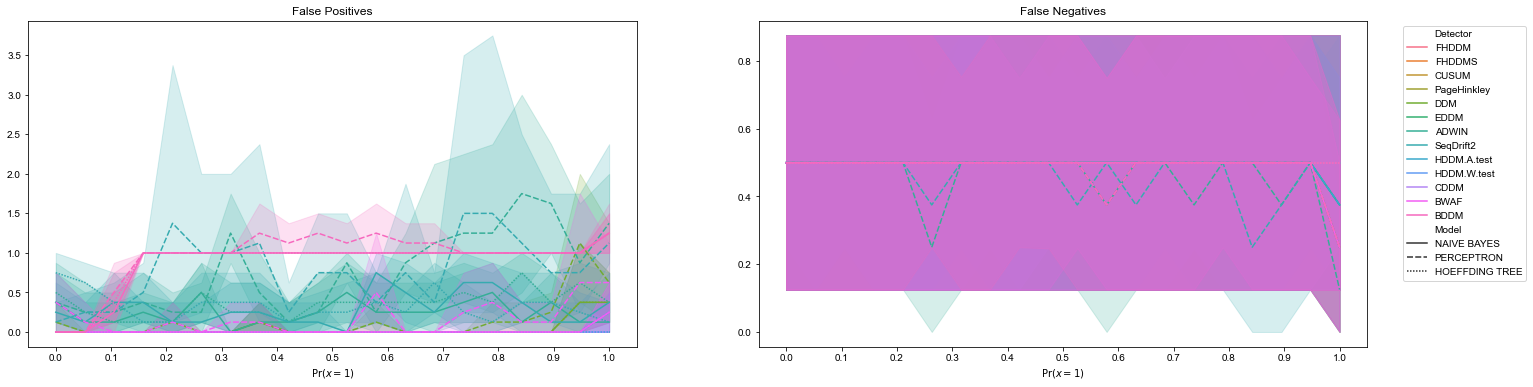

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

l1 = sns.lineplot('px1', 'FP', hue='Detector', style='Model', data=results_full, ax=ax1, legend=False)
l1.set(xticks=np.arange(11)/10, title='False Positives', xlabel='$\Pr(x=1)$', ylabel='');
# l1._legend.remove()

l2 = sns.lineplot('px1', 'FN', hue='Detector', style='Model', data=results_full, ax=ax2)
l2.set(xticks=np.arange(11)/10, title='False Negatives', xlabel='$\Pr(x=1)$', ylabel='');
plt.legend(bbox_to_anchor=(1.05, 1.0));

In [10]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

Writing LaTeX table to tables/bernoulli_no_cddm.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/bernoulli_no_cddm.pdf


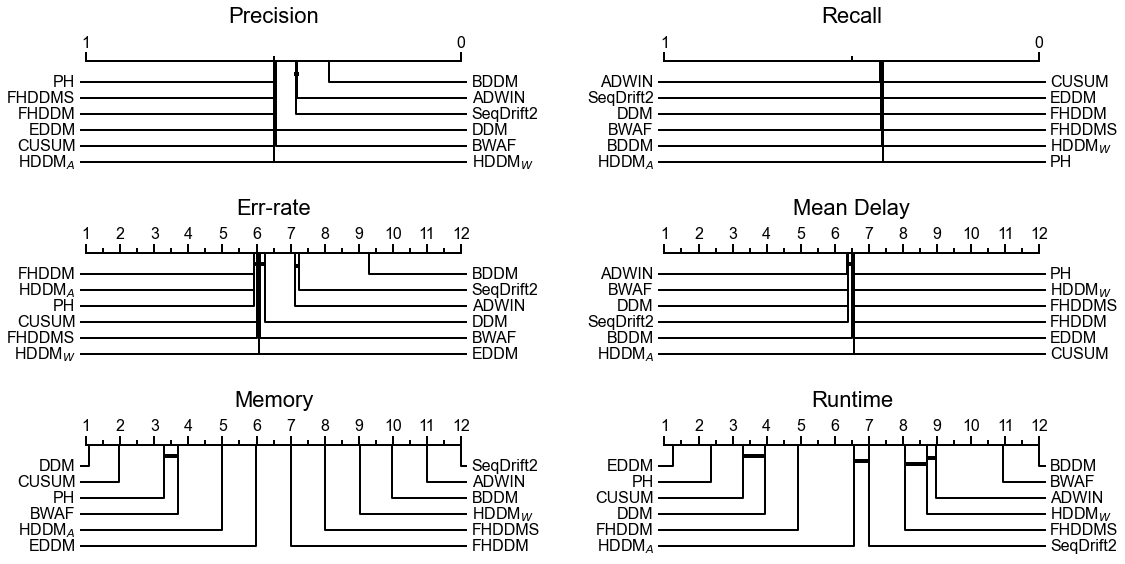

In [11]:
latex = process_results(
    results[ results['Detector']!='CDDM' ].drop( columns=['Model', 'Datastream', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}_no_cddm.tex',
    fig_path=f'figures/{category}_no_cddm.pdf',
    bold_best=True,
    alpha=0.05
)

## Model = Hoeffding Tree, include CDDM

Writing LaTeX table to tables/bernoulli_hoeffding.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/bernoulli_hoeffding.pdf
\begin{tabular}{lrrrrrr}
\toprule
{} &         Precision &            Recall &          Err-rate (\%) &           Mean Delay &             Memory (bytes) &              Runtime (ms) \\
Detector    &                   &                   &                   &                      &                    &                      \\
\midrule
ADWIN       &       0.44 (0.08) &       0.42 (0.09) &       0.40 (0.19) &       247.36 (23.44) &       25.07 (1.17) &        43.44 (18.15) \\
BDDM        &       0.35 (0.06) &       0.42 (0.08) &       0.47 (0.18) &        250.00 (0.00) &       19.98 (0.46) &  19504.25 (12165.11) \\
BWAF        &  {\fontseries{b}\selectfont 0.50 (0.03)} &  {\fontseries{b}\selectfont 0.42 (0.09)} &       0.36 (0.14) &  {\fontseries{b}\selectfont 243.80 (38.72)} &       18.26 (0.49) &        80.94 (27.94) \\
CDDM        &       0.50 (0.00) &       0.42 (0.08) &  {\fontseries{b}\selectfont 0.35 (0.14)} &        250.00 (0.

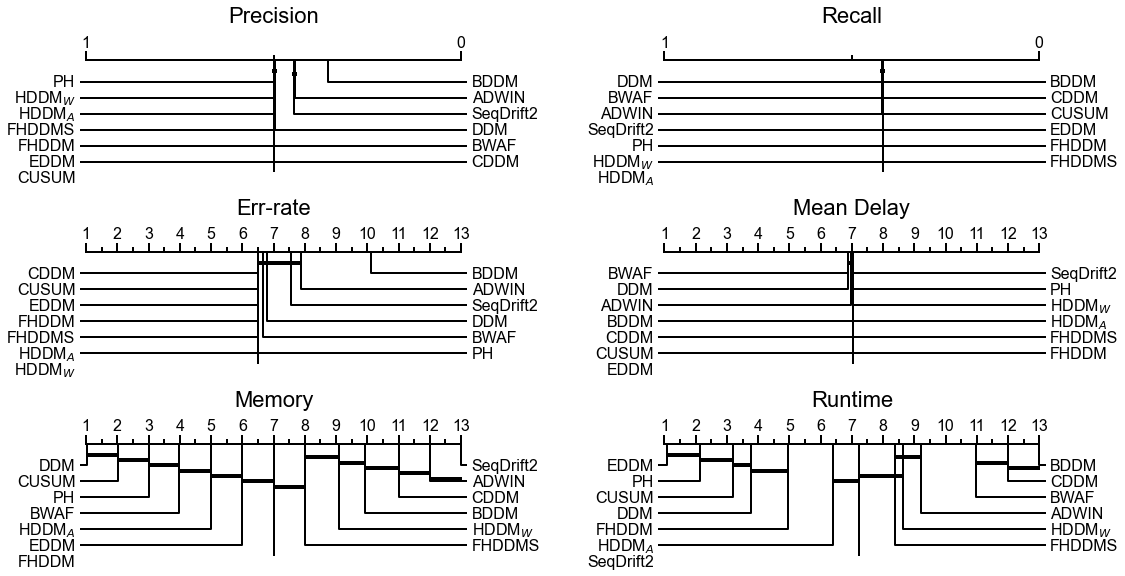

In [12]:
print(process_results(
    results[ results['Model']=='HOEFFDING TREE' ].drop( columns=['Model', 'Datastream', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}_hoeffding.tex',
    fig_path=f'figures/{category}_hoeffding.pdf',
    bold_best=True,
    alpha=0.05
))

## Novel Detectors vs Modes

In [13]:
print(process_results(
    results[ results['Detector'].isin(['BDDM', 'BWAF', 'CDDM']) ]
        .drop( columns=['Model', 'Datastream'] ), 
    groupby=['Detector', 'Mode'], 
    latex_path=f'tables/{category}_modes.tex',
#     fig_path='figures/benchmarks_modes.pdf',
    cd_diagram=False,
    bold_best=False
))

Writing LaTeX table to tables/bernoulli_modes.tex
\begin{tabular}{lrrrrrrr}
\toprule
     &         &    Precision &       Recall &     Err-rate (\%) &      Mean Delay &        Memory (bytes) &             Runtime (ms) \\
Detector & Mode &              &              &              &                 &               &                     \\
\midrule
BDDM & Real &  0.36 (0.06) &  0.34 (0.04) &  1.24 (0.98) &  247.03 (26.37) &  14.26 (4.09) &    7632.16 (912.84) \\
     & Virtual &  0.35 (0.06) &  0.50 (0.00) &  0.70 (0.56) &       nan (nan) &  14.38 (4.30) &  31392.62 (4183.04) \\
BWAF & Real &  0.50 (0.04) &  0.34 (0.06) &  0.98 (0.86) &  242.79 (41.61) &  12.30 (4.26) &        57.36 (7.14) \\
     & Virtual &  0.49 (0.04) &  0.50 (0.00) &  0.55 (0.49) &       nan (nan) &  12.48 (4.39) &      118.05 (16.75) \\
CDDM & Real &  0.50 (0.00) &  0.33 (0.00) &  0.44 (0.13) &   250.00 (0.00) &  20.88 (0.41) &       107.98 (5.99) \\
     & Virtual &  0.50 (0.00) &  0.50 (0.00) &  0.25 (0.07) &  